# **Finding Lane Lines on the Road** 
***
In this project, you will use the tools you learned about in the lesson to identify lane lines on the road.  You can develop your pipeline on a series of individual images, and later apply the result to a video stream (really just a series of images). Check out the video clip "raw-lines-example.mp4" (also contained in this repository) to see what the output should look like after using the helper functions below. 

Once you have a result that looks roughly like "raw-lines-example.mp4", you'll need to get creative and try to average and/or extrapolate the line segments you've detected to map out the full extent of the lane lines.  You can see an example of the result you're going for in the video "P1_example.mp4".  Ultimately, you would like to draw just one line for the left side of the lane, and one for the right.

---
Let's have a look at our first image called 'test_images/solidWhiteRight.jpg'.  Run the 2 cells below (hit Shift-Enter or the "play" button above) to display the image.

**Note** If, at any point, you encounter frozen display windows or other confounding issues, you can always start again with a clean slate by going to the "Kernel" menu above and selecting "Restart & Clear Output".

---

**The tools you have are color selection, region of interest selection, grayscaling, Gaussian smoothing, Canny Edge Detection and Hough Tranform line detection.  You  are also free to explore and try other techniques that were not presented in the lesson.  Your goal is piece together a pipeline to detect the line segments in the image, then average/extrapolate them and draw them onto the image for display (as below).  Once you have a working pipeline, try it out on the video stream below.**

---

<figure>
 <img src="line-segments-example.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above) after detecting line segments using the helper functions below </p> 
 </figcaption>
</figure>
 <p></p> 
<figure>
 <img src="laneLines_thirdPass.jpg" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your goal is to connect/average/extrapolate line segments to get output like this</p> 
 </figcaption>
</figure>

In [7]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimesions: (540, 960, 3)


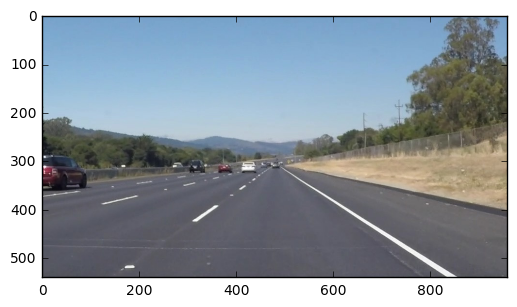

In [8]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')
#printing out some stats and plotting
print('This image is:', type(image), 'with dimesions:', image.shape)
plt.imshow(image)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image

**Some OpenCV functions (beyond those introduced in the lesson) that might be useful for this project are:**

`cv2.inRange()` for color selection  
`cv2.fillPoly()` for regions selection  
`cv2.line()` to draw lines on an image given endpoints  
`cv2.addWeighted()` to coadd / overlay two images
`cv2.cvtColor()` to grayscale or change color
`cv2.imwrite()` to output images to file  
`cv2.bitwise_and()` to apply a mask to an image

**Check out the OpenCV documentation to learn about these and discover even more awesome functionality!**

Below are some helper functions to help get you started. They should look familiar from the lesson!

In [464]:
import math

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    """
    Applies an image mask.
    
    Only keeps the region of the image defined by the polygon
    formed from `vertices`. The rest of the image is set to black.
    """
    #defining a blank mask to start with
    mask = np.zeros_like(img)   
    
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    #filling pixels inside the polygon defined by "vertices" with the fill color    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    #returning the image only where mask pixels are nonzero
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """
    NOTE: this is the function you might want to use as a starting point once you want to 
    average/extrapolate the line segments you detect to map out the full
    extent of the lane (going from the result shown in raw-lines-example.mp4
    to that shown in P1_example.mp4).  
    
    Think about things like separating line segments by their 
    slope ((y2-y1)/(x2-x1)) to decide which segments are part of the left
    line vs. the right line.  Then, you can average the position of each of 
    the lines and extrapolate to the top and bottom of the lane.
    
    This function draws `lines` with `color` and `thickness`.    
    Lines are drawn on the image inplace (mutates the image).
    If you want to make the lines semi-transparent, think about combining
    this function with the weighted_img() function below
    """
    right_slope = []
    left_slope = []
    left_lane = []
    right_lane = []
    y1_left = []
    y2_left = []
    x1_left = []
    x2_left = []
    y1_right = []
    y2_right = []
    x1_right = []
    x2_right = []

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
        slope = ((y2-y1)/(x2-x1))
 
        if slope < -0.4 and slope > - 0.8:
            left_slope.append(slope)
            left_lane.append(line) 
            y1_left.append(y1)
            y2_left.append(y2)
            x1_left.append(x1)
            x2_left.append(x2)
            y1_left
            y2_left
            x1_left
            x2_left
        elif slope > 0.4 and slope < 0.8 :
            right_slope.append(slope)
            right_lane.append(line)
            y1_right.append(y1)
            y2_right.append(y2)
            x1_right.append(x1)
            x2_right.append(x2)
            y1_right
            y2_right
            x1_right
            x2_right
    all_x_left = np.array([x1_left,x2_left]).flatten()
    all_x_right = np.array([x1_right,x2_right]).flatten()
    
    all_y_left = np.array([y1_left,y2_left]).flatten()
    all_y_right = np.array([y1_right,y2_right]).flatten()
    
#     x1_max_left = np.amax(x1_left)  
    y1_min_left = np.amin(y1_left)
#     x2_min_left = np.amin(x2_left)
    y2_max_left = np.amax(y2_left)
    
#     x1_min_right = np.amin(x1_right)
    y1_min_right = np.amin(y1_left) #which is the same as y1_min_left  
#     x2_max_right = np.amax(x2_right)
    y2_max_right = np.amax(y2_right)
    
    y_min_global = np.amin([y1_min_right, y1_min_left]) #I could have taken the further top border in the region_of_interest, but I prefer to detect the point
    y_max_global = np.amax([y2_max_right,y2_max_left])
    
    mean_right_slope = np.mean(right_slope)
    mean_left_slope = np.mean(left_slope)

    x_left_mean = np.mean(all_x_left) 
    x_right_mean = np.mean(all_x_right)
    
    y_left_mean = np.mean(all_y_left)
    y_right_mean = np.mean(all_y_right)
    
    left_intercept = y_left_mean-x_left_mean*mean_left_slope
    right_intercept = y_right_mean-x_right_mean*mean_right_slope
    
    x1_left = (y_min_global - left_intercept)/mean_left_slope
    x2_left = (y_max_global - left_intercept)/mean_left_slope
    
    x1_right = (y_min_global - right_intercept)/mean_right_slope
    x2_right = (y_max_global - right_intercept)/mean_right_slope

    cv2.line(img, (int(x1_left), y_min_global), (int(x2_left), y_max_global), [255,255,0], 5)
    cv2.line(img, (int(x1_right), y_min_global), (int(x2_right), y_max_global), [255,255,0], 5)
    
    
def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((*img.shape, 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

# Python 3 has support for cool math symbols.

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

## Test on Images

Now you should build your pipeline to work on the images in the directory "test_images"  
**You should make sure your pipeline works well on these images before you try the videos.**

In [388]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

run your solution on all test_images and make copies into the test_images directory).

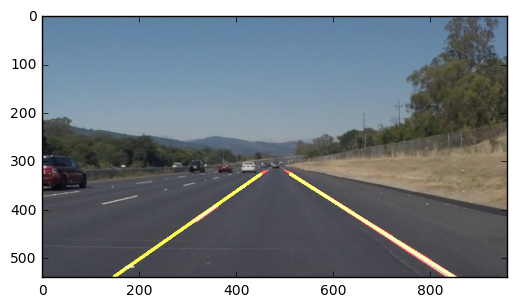

In [459]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

#reading in an image
initial_image = mpimg.imread('test_images/solidWhiteRight.jpg')
gray = grayscale(initial_image)

blur_gray = gaussian_blur(gray, 5)

edges = canny(blur_gray, 50, 150)

rho = 1
theta = np.pi/180
threshold = 30
min_line_len = 10
max_line_gap = 1

imshape = image.shape
vertices = np.array([[(120,imshape[0]),(450, 320), (520, 320), (900,imshape[0])]], dtype=np.int32)

# masked_image = region_of_interest(w_img, vertices)

masked_image = region_of_interest(edges, vertices)

line_img = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)

w_img = weighted_img(line_img, initial_image, α=0.8, β=1., λ=0.)




# plt.imshow(line_img, cmap='gray')
# plt.imshow(w_img)
plt.imshow(w_img)



## Test on Videos

You know what's cooler than drawing lanes over images? Drawing lanes over video!

We can test our solution on two provided videos:

`solidWhiteRight.mp4`

`solidYellowLeft.mp4`

In [404]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [405]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    import cv2
    import math

    #reading in an image
#     initial_image = mpimg.imread('test_images/solidWhiteRight.jpg')
#     image = ('solidWhiteRight.mp4')
#     gray = grayscale(image)

#     blur_gray = gaussian_blur(gray, 5)

    edges = canny(image, 50, 150)

    rho = 1
    theta = np.pi/180
    threshold = 30
    min_line_len = 10
    max_line_gap = 1

    imshape = image.shape
    vertices = np.array([[(120,imshape[0]),(450, 320), (520, 320), (900,imshape[0])]], dtype=np.int32)


    masked_image = region_of_interest(edges, vertices)

    line_img = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)

    w_img = weighted_img(line_img, image, α=0.8, β=1., λ=0.)
    result = w_img
    # you should return the final output (image with lines are drawn on lanes)

    return result

Let's try the one with the solid white lane on the right first ...

In [406]:
white_output = 'white.mp4'
clip1 = VideoFileClip("solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

0.601593625498
0.623595505618
-0.763636363636
0.601226993865
-0.714285714286
0.623188405797
0.62962962963
-0.777777777778
-0.705882352941
-0.714285714286
-0.733333333333
-0.703703703704
0.622222222222
-0.689655172414
-0.782608695652
-0.785714285714
0.596774193548
[MoviePy] >>>> Building video white.mp4
[MoviePy] Writing video white.mp4








  0%|          | 0/222 [00:00<?, ?it/s]





  1%|▏         | 3/222 [00:00<00:08, 26.21it/s]

0.601593625498
0.623595505618
-0.763636363636
0.601226993865
-0.714285714286
0.623188405797
0.62962962963
-0.777777777778
-0.705882352941
-0.714285714286
-0.733333333333
-0.703703703704
0.622222222222
-0.689655172414
-0.782608695652
-0.785714285714
0.596774193548
0.59842519685
-0.754545454545
0.625
0.615384615385
-0.7
0.62962962963
-0.7
0.616279069767
0.622222222222
0.623188405797
-0.705882352941
0.62
-0.757575757576
0.64
-0.8
0.596153846154
-0.708333333333
-0.7
0.622222222222
-0.714285714286
0.620689655172
-0.705882352941
0.598039215686
0.64367816092
0.602112676056
-0.752688172043
-0.666666666667
0.644295302013
-0.732558139535
0.641975308642
-0.777777777778
-0.684210526316
-0.764705882353
0.652173913043
-0.666666666667
0.615384615385
-0.818181818182
0.571428571429
0.653846153846
0.627659574468
0.602272727273
0.598039215686
0.625668449198
0.613636363636
0.627118644068
-0.754385964912
-0.703703703704
0.615384615385
-0.681818181818
-0.75
-0.714285714286
-0.692307692308
0.627118644068
-0.







  3%|▎         | 7/222 [00:00<00:07, 28.35it/s]

0.604651162791
0.611111111111
0.643939393939
0.59793814433
0.612903225806
0.589743589744
0.567567567568
0.636363636364
0.63829787234
0.636363636364
-0.740740740741
-0.714285714286
0.566666666667
0.583333333333
0.555555555556
0.63768115942
0.602150537634
-0.714285714286
0.542857142857
0.648648648649
0.657894736842
-0.769230769231
0.586206896552
0.6
0.626582278481
0.619047619048
0.6
0.597222222222
0.615384615385
0.589743589744
0.621951219512
0.592592592593
-0.75
-0.703703703704
0.62
0.607142857143
-0.75
0.589743589744
0.6








  5%|▍         | 10/222 [00:00<00:07, 28.58it/s]

0.624087591241
0.598837209302
0.596273291925
0.627450980392
-0.75
-0.7
-0.742857142857
0.616666666667
-0.708333333333
-0.666666666667
0.622950819672
-0.705882352941
0.617021276596
0.598173515982
0.626582278481
0.596153846154
0.625570776256
0.6
0.595238095238
0.616822429907
0.630434782609
-0.702127659574
-0.75
0.6
-0.8
-0.692307692308
0.590909090909
0.608695652174
-0.7
0.604395604396
0.623287671233
0.598130841121
0.627218934911
0.581081081081
-0.666666666667
-0.744680851064
0.630434782609
-0.685714285714
-0.740740740741
0.583333333333
-0.666666666667
0.583333333333
0.608695652174
-0.6875
0.583333333333
0.626666666667
0.631578947368
-0.68
0.586956521739
0.567567567568
-0.818181818182
0.605633802817
0.6015625
0.646464646465
-0.75
0.636363636364
0.642857142857
0.641975308642
-0.7
-0.701754385965
0.639344262295
0.588235294118
0.6
-0.727272727273
-0.692307692308
0.606557377049
-0.733333333333
-0.714285714286
-0.722222222222








  6%|▌         | 13/222 [00:00<00:07, 28.27it/s]

0.642105263158
0.604166666667
-0.692307692308
0.647887323944
-0.692307692308
0.595744680851
-0.756756756757
-0.701149425287
0.647887323944
0.581818181818
0.632352941176
0.605263157895
0.583333333333
0.588235294118
0.608695652174
0.625
0.603773584906
-0.833333333333
-0.684210526316
-0.75
0.621848739496
0.65306122449
-0.707317073171
0.649122807018
0.617021276596
-0.707692307692
-0.75
0.607142857143
0.613636363636
0.636363636364
0.647727272727
0.607142857143
-0.764705882353
-0.7
0.630434782609
-0.625
0.657894736842
0.657894736842
-0.785714285714
0.634146341463
-0.714285714286
0.633333333333
0.612903225806








  8%|▊         | 17/222 [00:00<00:07, 28.33it/s]

0.617021276596
0.625429553265
0.648514851485
-0.666666666667
-0.753246753247
-0.7
-0.704545454545
0.6484375
-0.678571428571
-0.714285714286
-0.785714285714
-0.68
-0.758620689655
-0.6875
-0.6875
0.615384615385
-0.666666666667
0.633333333333
0.624615384615
0.646551724138
0.651515151515
0.65306122449
-0.736842105263
-0.70652173913
-0.75
-0.756756756757
0.6
0.611111111111
-0.714285714286
0.621212121212
-0.7
-0.666666666667
0.631578947368
-0.684210526316
0.62380952381
0.672514619883
0.6
0.611111111111
0.626506024096
-0.738095238095
-0.692307692308
0.653465346535
-0.666666666667
0.620689655172
-0.684210526316
-0.723404255319
-0.777777777778
-0.727272727273
0.652173913043
-0.681818181818
0.652173913043
0.672514619883
0.625954198473
0.6
0.623036649215
-0.7
0.666666666667
-0.708333333333
0.666666666667
-0.75
0.620689655172
-0.647058823529
0.666666666667
-0.727272727273
-0.714285714286
0.677419354839


0.615384615385
0.626923076923
0.652694610778
0.611111111111
0.650406504065
0.622448979592
-0.645161290323
-0.75
0.634146341463
0.652631578947
0.666666666667
-0.714285714286
-0.666666666667
0.627118644068
0.646153846154
0.626666666667
0.672
0.666666666667
0.621951219512
0.607142857143
-0.733333333333
-0.727272727273
0.607843137255
-0.6875
0.666666666667
0.690476190476
0.63829787234
-0.689655172414
0.690476190476
0.818181818182
-0.7
0.583333333333
0.666666666667
0.818181818182








  9%|▉         | 20/222 [00:00<00:07, 25.94it/s]

0.625
0.623529411765
0.647435897436
0.652406417112
-0.675675675676
-0.740740740741
0.62
0.65
-0.684210526316
-0.764705882353
-0.714285714286
0.622448979592
-0.636363636364
0.619047619048
0.624633431085
0.651851851852
0.645161290323
0.649122807018
-0.68
-0.720930232558
0.666666666667
-0.818181818182
0.794871794872
-0.684210526316
-0.676470588235
0.636363636364
0.622641509434
0.777777777778
0.623188405797
0.647058823529
0.649425287356
0.657142857143
-0.678571428571
0.648648648649
-0.757575757576
0.652173913043
-0.714285714286
-0.666666666667
-0.636363636364
-0.666666666667
-0.769230769231
0.625
0.631578947368
-0.666666666667
-0.7
-0.818181818182
0.620689655172
0.615384615385
0.651428571429
0.609756097561
0.622807017544
0.622895622896
0.634146341463
-0.727272727273
-0.666666666667
0.648648648649
0.642857142857
0.634615384615
-0.681818181818
0.652173913043
-0.692307692308
-0.666666666667
0.642857142857
-0.740740740741
-0.666666666667
-0.75








 11%|█         | 24/222 [00:00<00:07, 27.90it/s]

0.624624624625
0.669642857143
0.611111111111
-0.722891566265
-0.675675675676
0.670212765957
0.617647058824
-0.66
0.671875
0.622047244094
0.657894736842
-0.720930232558
0.671875
-0.692307692308
-0.7
-0.833333333333
-0.6875
0.625954198473
0.649425287356
0.65
-0.724489795918
-0.682926829268
0.608695652174
-0.733333333333
-0.714285714286
-0.676470588235
0.607142857143
0.647058823529
0.638888888889
-0.727272727273
0.626911314985
-0.724409448819
0.653179190751
-0.688888888889
0.65306122449
-0.705882352941
0.642857142857
-0.7
0.631578947368
-0.681818181818
-0.666666666667
0.623529411765
0.642857142857
-0.666666666667
-0.684210526316
0.651162790698
-0.785714285714
0.642857142857
-0.666666666667
-0.666666666667








 12%|█▏        | 27/222 [00:00<00:06, 28.49it/s]

0.650943396226
0.628571428571
0.6
0.624113475177
-0.733333333333
-0.704545454545
0.657142857143
-0.75
-0.729166666667
0.666666666667
-0.68085106383
-0.727272727273
0.641975308642
-0.720930232558
0.647482014388
-0.666666666667
-0.709677419355
0.655172413793
-0.666666666667
-0.695652173913
0.651612903226
0.625
0.666666666667
-0.75
-0.714285714286
-0.823529411765
-0.740740740741
0.630434782609
-0.7
0.630434782609
-0.702702702703
-0.684210526316
0.666666666667
0.631578947368
0.655172413793
-0.785714285714
0.625
0.624
0.651376146789
0.647887323944
-0.708333333333
0.657142857143
0.65306122449
0.0
-0.761904761905
0.620689655172








 14%|█▎        | 30/222 [00:01<00:06, 28.74it/s]

0.622047244094
0.651685393258
0.655172413793
0.647058823529
0.632352941176
0.645161290323
0.6
0.622047244094
-0.666666666667
-0.692307692308
-0.8
0.628571428571
-0.7
0.633333333333
-0.692307692308
0.648648648649
0.624
0.647058823529
0.645161290323
0.615384615385
0.652631578947
0.619047619048
0.625
0.694915254237
-0.676470588235
-0.758620689655
-0.75
0.611111111111
-0.666666666667
0.636363636364
0.642857142857
0.0
0.651162790698
0.608695652174
0.651376146789
0.624338624339
0.636363636364
0.621495327103
0.657142857143
0.647058823529
-0.75
-0.702702702703
0.625
0.645161290323
-0.764705882353
0.620689655172
0.612903225806
0.642857142857








 15%|█▍        | 33/222 [00:01<00:06, 27.13it/s]

0.623481781377
0.650793650794
0.622222222222
0.649122807018
0.622448979592
-0.704545454545
0.652173913043
-0.756097560976
-0.692307692308
0.647058823529
-0.740740740741
0.620689655172
0.636363636364
-0.727272727273
-0.666666666667
0.615384615385
0.624031007752
0.648351648352
0.655172413793
0.617283950617
-0.690909090909
0.642857142857
-0.755102040816
0.647058823529
0.623853211009
0.666666666667
-0.727272727273
0.657894736842
0.64
-0.636363636364
0.615384615385
0.624
0.642857142857
0.62015503876
0.622950819672
0.651079136691
-0.691176470588
-0.75
0.654545454545
-0.727272727273
-0.777777777778
-0.7
-0.727272727273
0.636363636364
0.612903225806








 17%|█▋        | 37/222 [00:01<00:06, 27.89it/s]

0.623931623932
0.655172413793
0.64953271028
0.625
-0.698795180723
0.65
-0.732394366197
0.620689655172
0.621621621622
0.6
0.615384615385
-0.703703703704
0.615384615385
-0.75
-0.818181818182
0.636363636364
0.6
0.623655913978
0.649572649573
0.654320987654
0.621052631579
-0.696078431373
-0.75
-0.740740740741
0.654545454545
0.633333333333
-0.769230769231
0.634146341463
-0.777777777778
0.612903225806
-0.733333333333
0.615384615385
-0.75
0.642857142857
0.624031007752
0.65
-0.6875
-0.75
0.69696969697
0.612903225806
-0.697368421053
0.629032258065
0.696428571429
-0.75
-0.717948717949
-0.705882352941
0.631578947368
-0.714285714286
0.617021276596
-0.75
-0.75
-0.785714285714
0.625
0.66
-0.714285714286
0.615384615385
0.642857142857
-0.8








 18%|█▊        | 40/222 [00:01<00:06, 27.63it/s]

0.62457337884
0.669950738916
-0.733333333333
-0.694444444444
-0.772727272727
0.662337662338
-0.744186046512
0.627450980392
-0.785714285714
0.666666666667
-0.75
0.62
0.634615384615
-0.727272727273
0.622641509434
-0.8
-0.777777777778
0.666666666667
0.666666666667
0.623966942149
0.669230769231
0.615384615385
-0.7
0.666666666667
0.666666666667
-0.740740740741
0.697368421053
0.696428571429
-0.694915254237
0.670588235294
-0.75
-0.714285714286
0.619047619048
-0.785714285714
0.662337662338
-0.777777777778
0.619047619048
0.625454545455
0.678571428571
0.648484848485
0.650943396226
0.693333333333
-0.772727272727
0.651162790698
-0.681818181818
0.622950819672
-0.75
-0.727272727273
0.619047619048
-0.733333333333
-0.714285714286
0.625
0.615384615385
0.615384615385








 19%|█▉        | 43/222 [00:01<00:06, 28.13it/s]

0.626126126126
0.62962962963
0.671875
0.642857142857
0.666666666667
0.622641509434
0.676056338028
-0.714285714286
0.6
-0.727272727273
-0.76
0.617647058824
0.611111111111
0.608695652174
0.588235294118
-0.7
0.625
0.671814671815
0.626865671642
0.666666666667
0.628571428571
-0.6875
-0.741935483871
0.694444444444
-0.789473684211
0.612903225806
0.675438596491
-0.7
0.672199170124
0.622950819672
0.64606741573
0.641975308642
0.642857142857
0.670588235294
-0.764705882353
-0.684210526316
0.643835616438
-0.8
-0.818181818182
0.6
0.636363636364
0.633333333333
0.619047619048
0.652173913043
0.626213592233
0.675496688742
0.673469387755
0.651785714286
-0.704545454545
0.6
-0.738095238095
0.631578947368
0.625
0.625
-0.71875
0.615384615385
-0.8
0.666666666667
0.633333333333
-0.7
0.652173913043


0.673228346457
0.625498007968
0.67
0.628205128205
-0.636363636364
-0.725490196078
-0.74
0.619047619048
-0.785714285714
-0.666666666667
-0.7
0.645161290323
0.624
0.62962962963
0.625592417062
0.672199170124
-0.741935483871
0.623931623932
-0.7
0.625
0.694444444444
-0.8
0.666666666667
-0.708333333333
0.673469387755
0.608695652174








 21%|██        | 47/222 [00:01<00:07, 23.03it/s]

0.672897196262
0.626506024096
0.672340425532
0.627659574468
-0.753246753247
-0.707317073171
0.622222222222
-0.708333333333
-0.692307692308
0.607843137255
-0.642857142857
0.609756097561
-0.764705882353








 23%|██▎       | 50/222 [00:01<00:07, 21.56it/s]

0.671171171171
0.626373626374
0.636363636364
-0.698113207547
0.672727272727
-0.75
0.627450980392
-0.76
0.627272727273
-0.722222222222
-0.727272727273
-0.666666666667
-0.615384615385
0.625
0.661016949153
-0.8
0.675
0.670886075949
-0.705882352941
0.627118644068
0.622047244094
-0.75
0.625
-0.697183098592
-0.746478873239
0.621621621622
-0.705882352941
-0.727272727273
0.675
-0.705882352941
-0.777777777778
0.692307692308
0.673553719008
0.627118644068
-0.722222222222
-0.666666666667
0.626865671642
-0.694444444444
0.62676056338
-0.759036144578
0.675
0.654761904762
-0.75
-0.8
-0.8
0.611111111111
0.619047619048
0.622641509434
0.604166666667
0.672354948805
0.62676056338
-0.723684210526
0.626436781609
0.621052631579
-0.7
0.638888888889
-0.681818181818
-0.7
-0.727272727273
0.627906976744
-0.666666666667
-0.75
0.674157303371








 24%|██▍       | 53/222 [00:02<00:08, 19.15it/s]

0.672727272727
0.627450980392
0.67264573991
0.627659574468
0.615384615385
-0.727272727273
-0.68
-0.695652173913
-0.666666666667
-0.666666666667
-0.733333333333
0.666666666667
0.681818181818
0.631578947368
0.666666666667
0.675
0.583333333333
0.670103092784
0.674698795181
0.625
0.627737226277
0.650485436893
0.625
-0.678571428571
0.639344262295
-0.703703703704
0.657894736842
-0.7
0.657142857143
0.631578947368
-0.692307692308
0.636363636364
0.647058823529
0.692307692308
0.636363636364
0.0
0.6
0.615384615385
0.672619047619
0.6
0.626262626263
0.672619047619
0.626666666667
0.657142857143
0.622222222222
-0.7
-0.692307692308
-0.631578947368
-0.636363636364
-0.625
-0.727272727273








 25%|██▌       | 56/222 [00:02<00:08, 19.52it/s]

0.625954198473
0.626016260163
0.654135338346
0.652173913043
-0.685714285714
0.651685393258
-0.714285714286
0.652173913043
-0.705882352941
-0.692307692308
0.647058823529
-0.625








 27%|██▋       | 59/222 [00:02<00:08, 19.10it/s]

0.624031007752
0.666666666667
0.669117647059
0.615384615385
0.607142857143
-0.673913043478
-0.704545454545
0.621621621622
-0.684210526316
0.583333333333
0.666666666667
0.695652173913
-0.636363636364
0.674796747967
-0.7
-0.636363636364
0.589743589744
0.619047619048
0.625531914894
0.670588235294
0.626666666667
-0.692307692308
-0.65
0.670212765957
0.636363636364
-0.642857142857
0.666666666667
-0.65
0.615384615385
-0.615384615385
-0.6
0.657894736842
0.626794258373
0.671497584541
0.669642857143
-0.69696969697
0.631578947368
-0.689655172414
0.605263157895
-0.66
-0.666666666667
0.666666666667
0.6
0.608695652174
-0.636363636364
-0.6
-0.692307692308
-0.7
0.692307692308


0.675
0.615384615385
0.666666666667
0.645833333333
-0.682926829268
-0.692307692308
-0.728395061728
0.648148148148
0.655172413793
0.651162790698
0.642857142857
-0.733333333333
0.619047619048
-0.666666666667
0.65625
0.689655172414
0.657142857143
-0.727272727273
-0.75
0.645161290323








 27%|██▋       | 61/222 [00:02<00:08, 18.23it/s]

0.672661870504
0.627118644068
-0.705128205128
0.626666666667
-0.672897196262
0.666666666667
0.676470588235
0.627906976744
0.657894736842
-0.6875
0.631578947368
-0.642857142857
-0.702702702703
-0.666666666667
-0.6
-0.666666666667
0.673333333333
-0.666666666667
0.627586206897
-0.703125
-0.666666666667
0.645161290323
-0.678571428571
0.678571428571
0.675
-0.705882352941
0.641791044776
0.695652173913
-0.733333333333
-0.714285714286
0.666666666667
0.7
0.657894736842
-0.666666666667
0.671586715867
0.626436781609
-0.730769230769
0.674698795181
0.627906976744
-0.6875
0.631578947368
-0.674418604651
-0.714285714286
-0.704081632653
-0.631578947368
-0.736842105263
0.625
0.625
0.611111111111
0.678571428571
-0.675
0.62962962963
-0.68
-0.647058823529








 28%|██▊       | 63/222 [00:02<00:09, 17.16it/s]

0.672473867596
0.645569620253
0.648351648352
0.650793650794
-0.674418604651
-0.69696969697
-0.636363636364
-0.684210526316
0.641025641026
0.6875
-0.684210526316
-0.636363636364
-0.727272727273
0.736842105263








 29%|██▉       | 65/222 [00:02<00:09, 16.70it/s]

0.674074074074
0.62676056338
0.628205128205
-0.6875
0.607142857143
-0.653846153846
0.671641791045
-0.695652173913
-0.695652173913
-0.615384615385
0.621621621622
0.6
0.6
0.627118644068
0.666666666667
0.611111111111
0.673846153846
0.645962732919
0.642857142857
0.648148148148
0.672131147541
-0.730769230769
-0.642857142857
-0.68
-0.647058823529
0.677419354839
0.677419354839
0.673846153846
0.643939393939
0.645454545455
0.650602409639
0.647058823529
-0.7
-0.666666666667
-0.636363636364
0.642857142857
0.639344262295
-0.6
0.653846153846








 30%|███       | 67/222 [00:02<00:09, 16.67it/s]

0.671641791045
0.674242424242
0.626315789474
0.627272727273
0.654545454545
0.653846153846
-0.583333333333
-0.7
0.641025641026
-0.722222222222
-0.657142857143
0.607142857143
-0.642857142857
0.628205128205
0.0
-0.75








 31%|███       | 69/222 [00:03<00:09, 16.88it/s]





 32%|███▏      | 71/222 [00:03<00:09, 16.69it/s]

0.673981191223
0.650406504065
0.645569620253
-0.697674418605
0.64
0.68
0.673684210526
-0.659090909091
0.64
0.666666666667
0.648648648649
-0.636363636364
0.647058823529
0.675324675325
0.666666666667
0.622950819672
0.675675675676
0.651376146789
-0.705882352941
0.644230769231
-0.636363636364
-0.7
0.658536585366
0.65625
-0.636363636364
0.675324675325
0.646153846154
0.676136363636
0.650485436893
-0.690909090909
0.714285714286
-0.641791044776
0.694915254237
0.62962962963
-0.666666666667
0.702702702703
-0.6875
-0.736842105263
0.651515151515
-0.722222222222
0.71875
-0.615384615385
-0.666666666667
0.644444444444
-0.666666666667
0.675925925926








 33%|███▎      | 73/222 [00:03<00:09, 16.42it/s]

0.645833333333
0.674418604651
-0.647058823529
0.650406504065
0.701754385965
-0.7
0.698412698413
0.651515151515
-0.642857142857
-0.818181818182
0.675
-0.6
0.646341463415
0.675925925926
0.676470588235
-0.647058823529
-0.694736842105
0.627906976744
-0.666666666667
-0.692307692308
-0.666666666667
0.666666666667
0.636363636364
0.636363636364
-0.6
-0.655172413793
0.75
0.615384615385
0.675958188153
0.645390070922
-0.652173913043
-0.702702702703
0.647727272727
-0.6875
0.681818181818
-0.655737704918
0.678571428571
0.689655172414
-0.647058823529
-0.645161290323
0.666666666667
-0.722222222222
0.68
-0.631578947368
-0.705882352941
-0.647058823529
0.655172413793
-0.625
-0.666666666667
0.644628099174
0.673469387755
-0.692307692308
-0.65671641791
0.620689655172
-0.695652173913
0.666666666667
-0.666666666667
-0.627118644068
0.64
-0.636363636364
0.75
0.657894736842
-0.666666666667
-0.636363636364
-0.636363636364
0.666666666667
-0.619047619048
0.659574468085
0.648648648649
0.673913043478
0.68








 34%|███▍      | 75/222 [00:03<00:09, 15.82it/s]





 35%|███▍      | 77/222 [00:03<00:09, 14.63it/s]

0.674033149171
0.649769585253
0.681818181818
-0.703125
0.648351648352
-0.702127659574
-0.636363636364
-0.722222222222
-0.666666666667
0.675675675676
-0.653846153846
0.68
0.648148148148
-0.714285714286
0.694444444444
0.649484536082
0.674418604651
0.692307692308
0.680412371134
0.675675675676
-0.642857142857
0.692307692308
0.648148148148
-0.652173913043
0.648936170213
-0.6875
-0.692307692308
-0.636363636364
-0.692307692308
0.7
0.654205607477
0.698630136986
0.697916666667
0.666666666667
0.645161290323
0.627659574468
0.696428571429
0.629032258065
-0.678571428571
-0.633333333333
0.685714285714
0.684210526316
0.630434782609
0.615384615385
0.692307692308
0.642857142857








 36%|███▌      | 79/222 [00:03<00:09, 14.39it/s]





 37%|███▋      | 82/222 [00:03<00:08, 16.40it/s]

0.648829431438
0.698979591837
0.650485436893
0.647058823529
0.692307692308
-0.65625
0.706666666667
-0.6875
0.692307692308
0.636363636364
0.642857142857
0.722222222222
-0.636363636364
0.64
0.698924731183
0.652
0.704225352113
0.63829787234
-0.617647058824
-0.705882352941
0.704918032787
-0.677419354839
0.654320987654
0.636363636364
-0.666666666667
0.709677419355
0.622222222222
0.696
0.692307692308
0.651741293532
0.714285714286
0.704545454545
0.68115942029
0.666666666667
-0.638888888889
-0.659090909091
0.615384615385
0.688888888889
0.630434782609
0.647058823529
-0.692307692308
0.62962962963
0.649484536082
0.666666666667
-0.666666666667
0.692307692308
-0.7
0.666666666667
0.769230769231
0.666666666667
-0.545454545455
0.701388888889
0.651851851852
0.67619047619
-0.679245283019
0.705882352941
0.727272727273
0.702127659574
0.654761904762
0.62962962963
-0.666666666667
-0.636363636364
0.714285714286
0.627450980392
0.714285714286
0.701030927835
0.684210526316
0.653179190751
-0.676923076923
0.71428







 38%|███▊      | 85/222 [00:03<00:07, 18.02it/s]





 39%|███▉      | 87/222 [00:04<00:07, 18.15it/s]

0.701421800948
0.652173913043
0.647058823529
0.7
-0.697368421053
0.677083333333
0.714285714286
-0.625
-0.714285714286
0.630434782609
-0.642857142857
0.722222222222
0.714285714286
-0.636363636364
0.666666666667
0.7
0.736842105263
-0.6875
0.636363636364
-0.666666666667
0.7
0.701886792453
0.653179190751
-0.673611111111
0.681818181818
0.651376146789
0.655555555556
-0.6875
-0.647058823529
-0.666666666667
-0.666666666667
0.705882352941
0.619047619048
0.709677419355
0.65625
-0.692307692308
-0.647058823529
0.7
0.669642857143
-0.666666666667
0.727272727273
-0.702127659574
0.669642857143
-0.69696969697
0.700460829493
0.699029126214
0.714285714286
-0.692307692308
-0.636363636364
-0.666666666667
0.666666666667
-0.681818181818
-0.666666666667
0.694444444444
0.7
0.673469387755
0.684210526316
0.696078431373
0.651851851852
0.653543307087
0.701086956522
-0.674698795181
0.652173913043
0.642857142857
-0.678571428571
0.666666666667
-0.636363636364
-0.636363636364
0.647058823529
-0.636363636364
0.64
0.7187







 41%|████      | 90/222 [00:04<00:06, 19.48it/s]





 42%|████▏     | 93/222 [00:04<00:06, 19.53it/s]

0.671641791045
0.700819672131
0.699115044248
-0.6875
0.646153846154
0.714285714286
-0.642857142857
0.7
-0.666666666667
0.666666666667
-0.615384615385
-0.636363636364
0.692307692308
0.6875
0.69696969697
-0.636363636364
0.7
0.727272727273
0.714285714286
0.702702702703
0.669230769231
0.677419354839
0.75
0.747252747253
-0.625
0.666666666667
0.695652173913
-0.684210526316
-0.666666666667
-0.625
0.714285714286
0.666666666667
0.75
0.722222222222
-0.647058823529
0.708333333333
0.671532846715
0.724832214765
0.702127659574
0.722222222222
-0.641025641026
-0.675675675676
0.675675675676
0.677419354839
0.6875
0.725
-0.666666666667
0.673076923077
0.7
-0.6
0.642857142857
0.636363636364
0.670588235294
0.681818181818
0.714285714286
0.722580645161
0.724770642202
0.699115044248
-0.630434782609
-0.6875
-0.636363636364
0.7
-0.714285714286
0.7
0.75
0.75
0.75
-0.666666666667
-0.7
0.655172413793
0.728260869565
0.700636942675
0.703703703704
0.654761904762
-0.636363636364
-0.660377358491
0.702702702703
0.6857142







 43%|████▎     | 96/222 [00:04<00:06, 19.68it/s]





 45%|████▍     | 99/222 [00:04<00:05, 21.57it/s]

0.7
0.672566371681
0.703703703704
0.746478873239
0.697247706422
-0.636363636364
0.729166666667
-0.666666666667
0.723076923077
0.785714285714
0.685714285714
-0.642857142857
0.688888888889
0.6875
0.717391304348
0.695652173913
-0.727272727273
-0.65
0.692307692308
0.8
-0.7
0.728070175439
0.710144927536
0.675675675676
0.684210526316
-0.641975308642
-0.692307692308
0.7
0.72972972973
0.714285714286
-0.642857142857
0.695652173913
0.722222222222
0.673469387755
-0.694444444444
-0.684210526316
-0.625
-0.5625
0.692307692308
-0.692307692308
0.675
0.708333333333
-0.666666666667
0.75
0.724890829694
0.681318681319
0.673469387755
-0.679245283019
-0.625
-0.644230769231
-0.642857142857
-0.666666666667
0.7
0.723404255319
0.666666666667
-0.69696969697
0.682926829268
0.657894736842
-0.68
-0.7
-0.705882352941
0.725388601036
0.676767676768
0.678260869565
-0.676258992806
0.660714285714
-0.647058823529
0.728476821192
-0.641025641026
-0.673913043478
-0.583333333333
0.720930232558
-0.647058823529
0.625
0.67647058







 46%|████▌     | 102/222 [00:04<00:05, 21.94it/s]

0.725274725275
0.678362573099
0.673469387755
0.726495726496
0.688888888889
0.7
-0.666666666667
0.733333333333
-0.68
-0.666666666667
0.723404255319
-0.615384615385
-0.705882352941
0.676923076923
-0.666666666667
0.675471698113
0.724832214765
0.725190839695
0.678571428571
0.714285714286
0.686274509804
0.736842105263
-0.615384615385
-0.655172413793
0.720930232558
-0.68
0.66
0.731707317073
-0.666666666667
0.675675675676
0.703947368421
0.675555555556
0.714285714286
0.666666666667
0.697368421053
-0.6875
0.708333333333
0.705263157895
0.68
-0.692307692308
-0.677419354839
0.677419354839
-0.631578947368
0.692307692308
-0.666666666667
0.68
0.706422018349
0.68
0.655913978495
0.702127659574
0.65625
0.683333333333
-0.684210526316
-0.648648648649
0.636363636364
-0.709677419355
0.642857142857
0.633333333333
-0.7
0.631578947368
0.615384615385








 47%|████▋     | 105/222 [00:04<00:06, 19.28it/s]





 49%|████▉     | 109/222 [00:05<00:05, 21.65it/s]

0.672043010753
0.703125
0.689655172414
0.714285714286
-0.644444444444
0.698113207547
0.714285714286
0.705882352941
0.6875
-0.71875
0.75
0.717948717949
-0.714285714286
-0.636363636364
-0.7
0.704918032787
0.705882352941
0.676923076923
0.689655172414
0.673202614379
0.69696969697
0.724137931034
0.72972972973
0.698113207547
0.703703703704
0.7
-0.655172413793
-0.636363636364
-0.722222222222
0.722222222222
0.75
0.714285714286
0.695652173913
-0.727272727273
-0.652173913043
0.733333333333
-0.692307692308
0.68085106383
0.75
0.68
0.675977653631
0.703539823009
-0.647058823529
0.700854700855
0.65625
0.657142857143
-0.704918032787
0.704545454545
-0.727272727273
0.694444444444
-0.705882352941
0.694444444444
-0.615384615385
-0.636363636364
0.709677419355
-0.636363636364
-0.714285714286
0.672932330827
0.701834862385
-0.650602409639
-0.704225352113
0.671232876712
-0.692307692308
0.701492537313
0.675
-0.636363636364
0.684210526316
-0.642857142857
0.695652173913
-0.636363636364
-0.583333333333
0.674698795







 51%|█████     | 113/222 [00:05<00:04, 23.49it/s]





 53%|█████▎    | 117/222 [00:05<00:04, 25.55it/s]

0.65306122449
0.701657458564
0.7
0.648648648649
0.654320987654
-0.674698795181
-0.724137931034
0.659574468085
-0.608695652174
-0.666666666667
0.633333333333
0.652173913043
-0.7
-0.722222222222
-0.695652173913
-0.666666666667
0.7
0.7
-0.75
-0.636363636364
0.697508896797
0.676056338028
0.672985781991
0.705882352941
0.684210526316
0.671052631579
-0.658536585366
0.692307692308
0.704545454545
-0.705882352941
-0.684210526316
-0.666666666667
0.666666666667
-0.714285714286
0.7
-0.642857142857
-0.6875
0.699248120301
0.649006622517
0.649635036496
0.703703703704
0.650793650794
0.702127659574
-0.655172413793
-0.692307692308
0.633333333333
0.714285714286
-0.625
0.6875
0.764705882353
0.698630136986
0.653846153846
0.692307692308
0.655555555556
0.627450980392
-0.666666666667
0.683333333333
0.62962962963
0.683333333333
-0.7
0.6
-0.615384615385
0.631578947368
0.631578947368
0.698113207547
-0.7
0.620689655172
-0.705882352941
0.714285714286
0.688888888889
0.692307692308
0.666666666667
0.698113207547
0.653







 54%|█████▍    | 120/222 [00:05<00:04, 25.00it/s]

0.654545454545
0.684210526316
0.68085106383
0.647058823529
0.681415929204
0.659090909091
-0.729166666667
0.634615384615
-0.666666666667
-0.666666666667
0.620689655172
0.625
0.660714285714
0.681818181818
-0.636363636364
-0.714285714286
0.7
-0.692307692308
0.619047619048
0.692307692308
0.7
0.645161290323
0.694444444444
-0.666666666667
-0.666666666667
0.692307692308
0.678571428571
0.65625
0.647435897436
0.675
0.655555555556
-0.666666666667
0.639344262295
-0.727272727273
-0.645161290323
0.646017699115
-0.642857142857
-0.710526315789
-0.611111111111
0.645161290323
-0.666666666667
-0.636363636364
-0.583333333333
0.677215189873
0.646808510638
-0.724637681159
0.666666666667
0.641791044776
-0.615384615385
0.636363636364
0.672566371681
-0.631578947368
0.636363636364
0.666666666667
-0.692307692308
0.708333333333
-0.619047619048
0.628571428571
0.649122807018
-0.7
-0.6
-0.769230769231
-0.684210526316
0.692307692308
0.633333333333
0.678571428571
0.678571428571
0.636363636364
0.628571428571
0.6735395







 56%|█████▌    | 124/222 [00:05<00:03, 26.87it/s]





 57%|█████▋    | 127/222 [00:05<00:03, 26.94it/s]

0.674107142857
0.627118644068
0.626262626263
0.624277456647
0.666666666667
-0.649350649351
-0.7
-0.678571428571
-0.705882352941
-0.666666666667
-0.722222222222
-0.636363636364
-0.7
0.68
0.677419354839
0.636363636364
0.626086956522
0.673267326733
0.671875
0.619047619048
0.62962962963
-0.653846153846
0.666666666667
-0.636363636364
-0.692307692308
-0.714285714286
-0.702127659574
-0.666666666667
0.62
-0.615384615385
0.617647058824
-0.666666666667
0.620253164557
0.625
0.626556016598
0.647058823529
0.672514619883
0.6
0.636363636364
0.608695652174
-0.692307692308
-0.636363636364
0.625
-0.666666666667
0.672
-0.692307692308
0.586206896552
-0.722222222222
0.651515151515
0.625748502994
0.648936170213
0.652173913043
0.62
-0.636363636364
0.652777777778
-0.7
0.634615384615
0.6
0.608695652174
0.621621621622
-0.75
0.615384615385
0.64
0.621621621622
0.631578947368
0.615384615385
0.630434782609
0.622641509434
0.642857142857
0.604651162791
0.650943396226
-0.6
0.65
-0.694444444444
0.6
0.637931034483
0.643







 59%|█████▊    | 130/222 [00:05<00:03, 27.78it/s]





 60%|█████▉    | 133/222 [00:05<00:03, 26.18it/s]

0.625
0.650735294118
0.611111111111
0.623931623932
-0.666666666667
0.646153846154
-0.7
0.647058823529
-0.723404255319
0.65
-0.727272727273
-0.714285714286
-0.677419354839
0.590909090909
0.647435897436
0.623529411765
0.619402985075
-0.666666666667
-0.714285714286
0.652173913043
0.622950819672
-0.727272727273
0.630769230769
0.62962962963
-0.75
0.631578947368
-0.7
0.613636363636
-0.733333333333
-0.75
-0.681818181818
0.613636363636
0.631578947368
0.623853211009
0.645161290323
-0.75
0.670212765957
-0.68
0.6
0.620689655172
0.670588235294
-0.673076923077
-0.705882352941
0.666666666667
-0.666666666667
-0.692307692308
0.666666666667
0.631578947368
-0.785714285714
-0.705882352941
0.620689655172
0.651612903226
-0.720588235294
0.649122807018
0.642857142857
-0.679487179487
-0.75
-0.666666666667
-0.65625
0.59375
0.64
0.647058823529
-0.785714285714
-0.75
-0.7
0.636363636364
0.625
-0.642857142857
0.619047619048
0.590909090909








 61%|██████▏   | 136/222 [00:06<00:03, 21.67it/s]

0.625
0.62962962963
0.619047619048
0.652694610778
-0.723577235772
0.651612903226
-0.68085106383
-0.677777777778
0.608695652174
0.622950819672
-0.625
0.647058823529
0.622950819672
-0.785714285714
0.627906976744
0.6
-0.666666666667
-0.7
0.625386996904
0.650943396226
-0.725806451613
-0.678571428571
0.64
-0.673076923077
-0.75
0.627906976744
0.646464646465
-0.705882352941
0.647058823529
0.617647058824
-0.705882352941
-0.733333333333
0.6
-0.8
-0.769230769231
0.615384615385
0.652173913043
0.624183006536
0.624242424242
-0.722222222222
-0.677419354839
-0.720588235294
0.65
0.622641509434
0.65
-0.680555555556
-0.7
-0.75
-0.769230769231
0.631578947368
0.622222222222
-0.7
-0.75
0.588235294118
0.650980392157
0.615384615385
0.6
0.619718309859
-0.734693877551
0.651162790698
0.625
-0.677419354839
-0.695652173913
0.642105263158
-0.6875
0.611111111111
-0.733333333333
-0.785714285714
0.621951219512
0.648648648649
0.653846153846
0.625
0.619402985075
0.629213483146
0.62
0.631578947368
0.626865671642
-0.7083







 63%|██████▎   | 139/222 [00:06<00:03, 23.16it/s]





 64%|██████▍   | 142/222 [00:06<00:03, 23.76it/s]

0.603448275862
0.649214659686
0.65306122449
0.595238095238
0.640449438202
0.659090909091
-0.703703703704
0.657142857143
-0.7
0.666666666667
0.692307692308
0.602040816327
-0.714285714286
0.636363636364
0.608695652174
0.649122807018
0.615384615385
0.602836879433
0.645569620253
-0.685714285714
0.641975308642
-0.733333333333
0.666666666667
0.615384615385
0.607843137255
0.590909090909
0.641509433962
0.610169491525
-0.733333333333
-0.7
-0.727272727273
0.63829787234
0.649572649573
0.622641509434
0.619047619048
0.6
0.622222222222
-0.682926829268
-0.7
-0.756756756757
0.63768115942
0.606060606061
0.659574468085
-0.714285714286
0.681818181818
-0.727272727273
0.6875
0.612903225806
-0.583333333333
-0.727272727273
-0.7
0.586956521739
0.62380952381
0.617647058824
0.63768115942
0.669172932331
0.620689655172
-0.666666666667
-0.717391304348
0.670212765957
0.620689655172
0.661290322581
-0.666666666667
-0.736842105263
0.611111111111
-0.733333333333
0.605263157895
0.652694610778
0.62213740458
-0.6949152542







 66%|██████▌   | 146/222 [00:06<00:03, 24.15it/s]





 68%|██████▊   | 150/222 [00:06<00:02, 25.94it/s]

0.651162790698
0.619047619048
0.647058823529
0.611111111111
-0.705882352941
0.622881355932
-0.714285714286
-0.709677419355
-0.710144927536
-0.758620689655
-0.777777777778
0.607142857143
0.583333333333
-0.636363636364
-0.714285714286
-0.789473684211
0.65034965035
0.620253164557
-0.702702702703
-0.75
0.647058823529
0.641975308642
-0.72
-0.7
0.636363636364
0.620689655172
0.616438356164
-0.6875
0.620689655172
0.642857142857
-0.7
0.631578947368
-0.666666666667
-0.7
0.642857142857
0.632653061224
0.649484536082
0.620481927711
-0.75652173913
0.6
-0.703296703297
0.621428571429
-0.705882352941
0.64
0.636363636364
0.648148148148
0.637931034483
-0.777777777778
-0.631578947368
0.652173913043
0.623188405797
-0.722222222222
-0.722222222222
-0.714285714286
0.645714285714
0.602564102564
0.602739726027
0.642857142857
-0.714285714286
0.65
-0.761904761905
0.6
-0.818181818182
0.631578947368
0.592592592593
0.646464646465
-0.735294117647
-0.752941176471
0.603603603604
-0.689655172414
-0.785714285714
-0.8
-0.







 69%|██████▉   | 153/222 [00:06<00:02, 24.68it/s]

0.605633802817
0.647058823529
0.598214285714
0.640625
0.6
-0.75
-0.7
0.625
0.59595959596
-0.75
-0.727272727273
0.583333333333
0.6
-0.714285714286
0.586956521739
0.583333333333
0.642857142857
0.632653061224
0.627118644068
0.6
0.604938271605
0.646153846154
0.648
0.591836734694
0.655172413793
0.606060606061
-0.75
0.636363636364
-0.735294117647
0.59375
0.617021276596
-0.777777777778
0.653846153846
0.607843137255
0.6
0.615384615385
0.6484375
0.644230769231
0.603658536585
0.605263157895
0.648
0.621621621622
0.571428571429
-0.783783783784
-0.703703703704
0.598039215686
0.615384615385
0.571428571429
-0.727272727273
0.630434782609
-0.75
0.64
0.648648648649
0.621052631579
0.644444444444
-0.7
0.605263157895
-0.727272727273
-0.755555555556
-0.69387755102
-0.769230769231
0.64
0.620689655172
0.613636363636
-0.7
0.607843137255
0.617283950617
-0.7
0.636363636364
0.636363636364
0.653846153846
0.647260273973
0.593220338983
0.616822429907
0.620879120879
-0.783783783784
0.619718309859
-0.7
0.628571428571








 70%|███████   | 156/222 [00:06<00:02, 23.55it/s]





 72%|███████▏  | 159/222 [00:07<00:02, 24.17it/s]

0.645161290323
0.61935483871
0.620689655172
0.623076923077
-0.7
-0.785714285714
0.666666666667
0.618556701031
0.666666666667
-0.714285714286
-0.724137931034
0.666666666667
-0.818181818182
0.6
-0.756756756757
0.652173913043
0.622641509434
0.6
0.605263157895
-0.7
0.646616541353
0.603603603604
0.6
0.646551724138
0.584905660377
0.593220338983
-0.755555555556
-0.7
0.607142857143
0.636363636364
0.603053435115
-0.717948717949
0.631578947368
-0.7
-0.75
-0.727272727273
-0.714285714286
-0.7
0.5625
-0.7
0.6
0.59842519685
-0.756756756757
0.645833333333
-0.725806451613
0.647058823529
0.645161290323
0.595238095238
-0.75
0.6
0.545454545455
-0.761904761905
0.609756097561
0.545454545455
0.585365853659
0.6
-0.7
0.601809954751
0.6
0.64406779661
-0.758241758242
0.645161290323
-0.719101123596
0.619047619048
0.597701149425
-0.8
0.628571428571
0.644230769231
-0.756756756757
0.588235294118
-0.777777777778
0.60162601626
0.611111111111
-0.722222222222
0.6
-0.857142857143
0.636363636364
0.6
-0.727272727273
-0.75







 73%|███████▎  | 162/222 [00:07<00:02, 24.61it/s]





 74%|███████▍  | 165/222 [00:07<00:02, 25.39it/s]

0.622516556291
0.581818181818
0.576388888889
0.605263157895
0.621951219512
0.574074074074
0.609375
-0.75
-0.75
0.582089552239
-0.727272727273
-0.75
0.583333333333
0.628571428571
0.568181818182
0.621951219512
0.577946768061
0.571428571429
0.576
0.571428571429
0.584269662921
-0.733333333333
0.609756097561
-0.772727272727
0.577464788732
0.5625
-0.764705882353
0.5625
0.621621621622
0.582089552239
-0.785714285714
0.578947368421
-0.769230769231
0.565217391304
0.604166666667
0.571428571429
0.581967213115
0.555555555556
0.582417582418
0.5625
0.596774193548
0.574468085106
-0.7
0.555555555556
-0.8
0.581818181818
0.602272727273
0.55737704918
-0.769230769231
0.555555555556
0.589743589744
0.603174603175
0.580459770115
0.6
0.556818181818
-0.783783783784
0.590909090909
0.555555555556
-0.714285714286
0.555555555556
0.597402597403
-0.857142857143
0.558823529412
-0.833333333333
0.575657894737
0.603174603175
0.610169491525
0.6
-0.727272727273
-0.772727272727
0.614285714286
-0.705882352941
-0.727272727273







 76%|███████▌  | 168/222 [00:07<00:02, 25.01it/s]





 77%|███████▋  | 171/222 [00:07<00:01, 25.60it/s]

0.601208459215
0.577092511013
0.575645756458
-0.785714285714
0.583333333333
0.6
-0.808510638298
-0.727272727273
0.583333333333
0.611111111111
-0.735294117647
-0.75
0.597222222222
-0.8
-0.8
-0.8
-0.695652173913
0.551724137931
0.575
-0.75
-0.8
0.590909090909
0.577160493827
0.6
-0.761904761905
-0.8
-0.809523809524
-0.777777777778
0.571428571429
0.594594594595
-0.818181818182
-0.785714285714
-0.714285714286
-0.75
0.566666666667
-0.692307692308
-0.75
0.59375
-0.727272727273
0.583333333333
0.576811594203
0.605263157895
0.601286173633
-0.803571428571
-0.761904761905
-0.769230769231
-0.72972972973
-0.833333333333
-0.730769230769
0.578947368421
-0.769230769231
-0.857142857143
0.5625
-0.769230769231
0.583333333333
-0.666666666667
-0.785714285714
-0.833333333333
0.565217391304
0.571428571429
0.577259475219
0.583333333333
0.603092783505
0.6
-0.756756756757
-0.833333333333
-0.769230769231
-0.805555555556
-0.75
-0.805555555556
-0.8
-0.785714285714
-0.793103448276
0.578947368421
-0.705882352941
-0.78







 78%|███████▊  | 174/222 [00:07<00:01, 25.67it/s]





 80%|███████▉  | 177/222 [00:07<00:01, 26.46it/s]

0.576419213974
0.601398601399
0.576271186441
0.604651162791
0.588235294118
0.538461538462
-0.736842105263
-0.809523809524
0.591549295775
0.583333333333
0.595238095238
0.572972972973
0.597701149425
0.597402597403
0.618705035971
0.590909090909
0.590909090909
0.608695652174
0.589743589744
-0.782608695652
0.588235294118
-0.777777777778
0.634146341463
-0.833333333333
-0.785714285714
0.566666666667
0.6
0.611111111111
0.6
0.576687116564
0.597014925373
0.575949367089
0.583333333333
0.639344262295
0.636363636364
-0.774193548387
-0.851851851852
0.571428571429
0.6
0.666666666667
0.536585365854
0.576354679803
0.60101010101
0.584905660377
0.622448979592
0.576271186441
-0.818181818182
-0.8
0.583333333333
0.576271186441
-0.764705882353
0.6
0.602564102564
-0.789473684211
0.571428571429
0.577639751553
0.602150537634
0.575
0.59872611465
0.597701149425
0.578947368421
-0.821428571429
-0.8
0.565217391304
-0.818181818182
0.575
-0.722222222222
0.575
-0.8
-0.842105263158
0.607843137255
-0.842105263158
0.6
0.5







 82%|████████▏ | 181/222 [00:07<00:01, 26.01it/s]





 83%|████████▎ | 185/222 [00:08<00:01, 28.49it/s]

0.538461538462
0.545454545455
0.603448275862
0.582278481013
0.599156118143
0.574468085106
-0.784615384615
0.603448275862
-0.806451612903
0.5625
0.586206896552
0.588235294118
-0.825
0.568965517241
-0.818181818182
0.590909090909
-0.818181818182
0.568181818182
0.6
0.575129533679
0.601593625498
0.586206896552
-0.78313253012
0.596153846154
-0.842105263158
0.59793814433
-0.888888888889
0.588235294118
-0.764705882353
0.588235294118
0.592592592593
-0.818181818182
0.6
0.666666666667
-0.6875
0.59375
0.59793814433
0.576036866359
0.592105263158
-0.777777777778
0.617391304348
0.582089552239
-0.849056603774
0.600917431193
-0.781818181818
-0.852941176471
0.657894736842
-0.714285714286
0.560975609756
0.584905660377
-0.875
-0.769230769231
0.611111111111
0.7
0.565217391304
0.545454545455
0.684210526316
0.5625
0.573333333333
0.611111111111
0.571428571429
0.620320855615
-0.780701754386
-0.839285714286
0.573170731707
0.593495934959
0.593220338983
-0.833333333333
0.6
0.648148148148
0.583333333333
0.58695652







 85%|████████▍ | 188/222 [00:08<00:01, 27.73it/s]





 86%|████████▌ | 191/222 [00:08<00:01, 27.98it/s]

0.620689655172
0.578616352201
0.575418994413
0.576576576577
0.597701149425
0.611940298507
-0.785714285714
-0.772727272727
-0.857142857143
0.619565217391
-0.857142857143
-0.818181818182
0.573333333333
0.603351955307
0.602150537634
0.604938271605
0.577889447236
0.592233009709
0.565217391304
0.573170731707
-0.777777777778
-0.791666666667
0.586956521739
-0.789473684211
0.604651162791
0.6
0.577049180328
0.6
0.571428571429
-0.7
-0.727272727273
0.529411764706
-0.823529411765
0.576470588235
-0.9
0.571428571429
0.574394463668
0.59756097561
0.599277978339
0.574585635359
-0.848484848485
0.571428571429
-0.75
0.571428571429
0.59756097561
-0.866666666667
0.575757575758
0.578947368421
-0.8
0.565217391304
0.595744680851
0.573333333333
0.59375
0.574468085106
-0.777777777778
-0.842105263158
0.552941176471
-0.780487804878
0.5625
0.571428571429
0.545454545455
0.578947368421
0.579710144928
0.5625
0.564516129032
-0.754716981132
0.574712643678
0.579439252336
0.55303030303
0.550724637681
-0.88
0.58064516129
-







 87%|████████▋ | 194/222 [00:08<00:01, 26.79it/s]





 89%|████████▉ | 198/222 [00:08<00:00, 28.56it/s]

0.588235294118
0.572413793103
0.596685082873
-0.762711864407
0.589743589744
-0.846153846154
0.567164179104
-0.769230769231
0.532258064516
0.590909090909
0.551282051282
-0.785714285714
0.571428571429
-0.8
0.571428571429
-0.8125
0.551282051282
0.572916666667
0.571428571429
0.597087378641
-0.810126582278
-0.772727272727
-0.785714285714
0.578947368421
0.56338028169
0.567901234568
-0.785714285714
-0.787878787879
-0.666666666667
0.563636363636
-0.769230769231
0.583333333333
-0.769230769231
0.576923076923
-0.818181818182
0.598006644518
0.574380165289
0.564516129032
-0.756756756757
-0.818181818182
0.575757575758
-0.8
0.571428571429
-0.785714285714
-0.846153846154
-0.7
0.560975609756
-0.8
0.519230769231
0.575163398693
-0.75
-0.8125
0.6
0.598705501618
0.575971731449
-0.754716981132
-0.852941176471
-0.818181818182
0.529411764706
-0.823529411765
-0.766666666667
-0.833333333333
0.5
0.5625
-0.822222222222
0.565217391304
0.587301587302
-0.8
0.529411764706
-0.8
0.578947368421
-0.8
0.571428571429
0.6
0







 91%|█████████ | 201/222 [00:08<00:00, 27.98it/s]





 92%|█████████▏| 204/222 [00:08<00:00, 27.80it/s]

0.599078341014
0.573770491803
0.595238095238
0.56880733945
0.567567567568
-0.769230769231
-0.842105263158
0.584905660377
-0.75
0.586956521739
0.545454545455
0.583333333333
0.595238095238
0.599303135889
0.55652173913
0.564102564103
0.575418994413
0.554455445545
0.583333333333
0.596330275229
-0.741935483871
0.59793814433
0.56862745098
-0.833333333333
-0.769230769231
0.555555555556
0.578947368421
0.597156398104
0.571428571429
0.598765432099
-0.852941176471
0.602649006623
-0.75
-0.769230769231
0.592592592593
0.571428571429
0.5625
0.571428571429
-0.8
-0.818181818182
0.581395348837
0.581395348837
-0.789473684211
-0.75
0.597014925373
0.55487804878
0.549019607843
0.556291390728
-0.744186046512
-0.827586206897
0.594827586207
0.565217391304
0.557471264368
0.594202898551
-0.909090909091
-0.8
0.555555555556
0.561643835616
0.571428571429
0.583333333333
0.571428571429
0.576642335766
-0.842105263158
0.590909090909
0.581818181818
-0.7
0.582417582418
-0.782608695652
0.581395348837
0.578947368421
-0.7
-







 93%|█████████▎| 207/222 [00:08<00:00, 27.33it/s]





 95%|█████████▍| 210/222 [00:08<00:00, 26.38it/s]

0.556451612903
0.596590909091
0.575757575758
0.539682539683
-0.842105263158
-0.785714285714
0.596590909091
0.58904109589
-0.818181818182
0.556390977444
-0.9
0.549019607843
-0.789473684211
-0.764705882353
0.596153846154
-0.875
-0.875
-0.833333333333
-0.8
0.549295774648
0.55652173913
0.596858638743
0.555555555556
-0.761904761905
0.551724137931
-0.810810810811
-0.84
0.557894736842
0.555555555556
0.56
-0.840909090909
-0.769230769231
-0.742857142857
0.590909090909
-0.714285714286
-0.761904761905
-0.727272727273
0.591836734694
0.580952380952
0.552845528455
-0.785714285714
-0.783333333333
0.575471698113
-0.803571428571
0.55
0.578313253012
-0.783333333333
0.576271186441
0.559322033898
-0.8
0.552845528455
-0.785714285714
-0.705882352941
0.565217391304
0.579268292683
0.55364806867
-0.769230769231
0.578947368421
-0.838709677419
0.557692307692
0.551020408163
-0.769230769231
-0.777777777778
-0.714285714286
0.555555555556
0.545454545455
-0.85
-0.823529411765
0.533333333333
-0.8
0.533333333333
-0.7
-







 96%|█████████▌| 213/222 [00:09<00:00, 26.26it/s]





 97%|█████████▋| 216/222 [00:09<00:00, 25.99it/s]

0.576219512195
0.552631578947
0.571428571429
-0.692307692308
0.564516129032
-0.736842105263
-0.826086956522
0.575539568345
-0.8
0.542857142857
0.575418994413
0.552816901408
0.568181818182
0.571428571429
-0.793103448276
0.571428571429
-0.785714285714
0.576923076923
-0.733333333333
0.545454545455
0.571428571429
0.555555555556
0.575
0.551181102362
0.535353535354
-0.818181818182
0.52380952381
-0.75
0.538461538462
-0.785714285714
0.530303030303
0.533333333333
0.515151515152
0.54
0.578231292517
0.554644808743
0.575539568345
0.584905660377
-0.767441860465
0.550847457627
-0.846153846154
0.584905660377
0.56
0.56
0.5625
-0.7
0.553133514986
0.576271186441
-0.8
0.552941176471
-0.757575757576
0.55737704918
-0.764705882353
-0.8
0.55
-0.7
0.553191489362
-0.785714285714
0.554744525547
0.545454545455
0.5703125
0.550458715596
0.576512455516
-0.727272727273
-0.839285714286
-0.756756756757
0.567901234568
0.561403508772
0.555555555556
-0.8
-0.75
-0.75
0.566666666667
-0.8125
-0.727272727273
0.55737704918
0.







 99%|█████████▊| 219/222 [00:09<00:00, 25.34it/s]





100%|█████████▉| 221/222 [00:09<00:00, 23.64it/s]

0.551724137931
0.576530612245
0.575342465753
0.553475935829
-0.833333333333
-0.764705882353
0.552795031056
-0.764705882353
-0.777777777778
-0.764705882353
-0.642857142857
0.554089709763
0.578181818182
0.575221238938
-0.836538461538
0.55
-0.791666666667
-0.782608695652
-0.767857142857
-0.692307692308
-0.769230769231
0.553191489362
-0.714285714286
-0.833333333333
-0.727272727273
0.554404145078
0.577464788732
0.575892857143
-0.837837837838
-0.769230769231
-0.818181818182
-0.790697674419
-0.766666666667
-0.878787878788
0.541666666667
-0.789473684211
-0.615384615385
0.555555555556
-0.85
-0.705882352941
0.575
0.533333333333
-0.727272727273
0.541666666667
-0.8
0.555223880597
0.577319587629
0.578651685393
-0.843137254902
0.555147058824
-0.757142857143
0.560975609756
-0.777777777778
0.539682539683
-0.8
-0.8
-0.9
-0.75
-0.727272727273
-0.764705882353
-0.866666666667
-0.666666666667
-0.75
-0.818181818182
-0.75
0.578512396694
0.553797468354
0.555555555556
0.571428571429
-0.8
-0.821428571429
-0.755

Play the video inline, or if you prefer find the video in your filesystem (should be in the same directory) and play it in your video player of choice.

In [407]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

**At this point, if you were successful you probably have the Hough line segments drawn onto the road, but what about identifying the full extent of the lane and marking it clearly as in the example video (P1_example.mp4)?  Think about defining a line to run the full length of the visible lane based on the line segments you identified with the Hough Transform.  Modify your draw_lines function accordingly and try re-running your pipeline.**

Now for the one with the solid yellow lane on the left. This one's more tricky!

In [408]:
yellow_output = 'yellow.mp4'
clip2 = VideoFileClip('solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

-0.626984126984
-0.603305785124
0.666666666667
-0.625
0.7
-0.628571428571
-0.666666666667
-0.619047619048
0.653846153846
-0.605263157895
0.666666666667
0.652173913043
-0.592592592593
-0.586956521739
0.692307692308
0.714285714286
0.727272727273
-0.583333333333
-0.666666666667
[MoviePy] >>>> Building video yellow.mp4
[MoviePy] Writing video yellow.mp4








  0%|          | 0/682 [00:00<?, ?it/s]





  1%|          | 4/682 [00:00<00:17, 38.13it/s]

-0.626984126984
-0.603305785124
0.666666666667
-0.625
0.7
-0.628571428571
-0.666666666667
-0.619047619048
0.653846153846
-0.605263157895
0.666666666667
0.652173913043
-0.592592592593
-0.586956521739
0.692307692308
0.714285714286
0.727272727273
-0.583333333333
-0.666666666667
-0.627659574468
-0.625954198473
-0.602941176471
0.698412698413
0.647727272727
0.714285714286
-0.623655913978
-0.617647058824
0.709677419355
0.666666666667
0.6875
-0.684210526316
-0.611111111111
-0.692307692308
0.666666666667
0.6875
-0.592592592593
-0.7
-0.627906976744
0.699115044248
-0.603448275862
0.65625
-0.623931623932
-0.666666666667
-0.606060606061
0.684210526316
0.619047619048
0.684210526316
0.620689655172
-0.708333333333
-0.606557377049
0.62962962963
0.727272727273
0.666666666667
0.64
0.714285714286
-0.605263157895
-0.615384615385
-0.645962732919
-0.617647058824
-0.642857142857
-0.634146341463
-0.636363636364
0.69512195122
0.659090909091
-0.652173913043
-0.647619047619
-0.606557377049
-0.661290322581
0.63414







  1%|          | 8/682 [00:00<00:18, 36.50it/s]





  2%|▏         | 12/682 [00:00<00:18, 36.22it/s]

-0.628571428571
-0.626126126126
-0.649717514124
-0.625
0.648648648649
-0.75
-0.666666666667
0.705882352941
-0.645161290323
0.69696969697
-0.631578947368
-0.666666666667
-0.625
-0.888888888889
0.642857142857
-0.620689655172
-0.733333333333
-0.65
-0.626050420168
-0.653846153846
-0.658536585366
-0.69387755102
-0.685714285714
0.636363636364
0.714285714286
-0.642857142857
-0.75
0.727272727273
-0.8
-0.714285714286
-0.647058823529
-0.75
0.705882352941
-0.615384615385
-0.695652173913
-0.764705882353
-0.631578947368
-0.626506024096
-0.666666666667
-0.673684210526
-0.692307692308
-0.705882352941
0.6875
0.636363636364
-0.692307692308
-0.606060606061
0.641509433962
-0.671232876712
-0.71875
-0.6875
0.727272727273
-0.675675675676
-0.705882352941
-0.631578947368
-0.7
0.636363636364
0.666666666667
-0.705882352941
0.666666666667
-0.625
-0.727272727273
-0.676470588235
-0.648936170213
-0.657894736842
-0.666666666667
-0.652173913043
-0.655172413793
0.697674418605
0.615384615385
-0.65625
-0.6875
-0.64
0.63







  2%|▏         | 16/682 [00:00<00:18, 35.54it/s]





  3%|▎         | 20/682 [00:00<00:18, 35.31it/s]

-0.666666666667
-0.666666666667
-0.642105263158
-0.694915254237
-0.674242424242
0.615384615385
-0.693333333333
0.614035087719
-0.722222222222
-0.666666666667
0.666666666667
-0.714285714286
0.647058823529
0.659090909091
0.666666666667
-0.703703703704
-0.677419354839
-0.705882352941
-0.739130434783
-0.727272727273
-0.724137931034
0.647058823529
0.666666666667
0.636363636364
-0.769230769231
-0.692307692308
-0.727272727273
-0.653846153846
-0.670588235294
-0.702127659574
-0.673913043478
-0.68115942029
0.625
-0.659574468085
0.604651162791
-0.660377358491
0.645833333333
0.666666666667
0.625
0.714285714286
-0.736842105263
-0.677966101695
-0.892857142857
-0.631578947368
0.785714285714
-0.6875
-0.677419354839
-0.684210526316
-0.666666666667
-1.0
0.608695652174
-0.709677419355
-0.702479338843
-0.674285714286
-0.666666666667
-0.694444444444
0.0
-0.692307692308
0.7
-0.75
0.607142857143
-0.714285714286
0.68
-0.694444444444
-0.818181818182
-1.0
-0.7
-0.842105263158
0.583333333333
-0.666666666667
0.68







  4%|▎         | 25/682 [00:00<00:17, 36.82it/s]





  4%|▍         | 30/682 [00:00<00:16, 39.53it/s]

-0.699421965318
-0.72972972973
-0.671532846715
-0.675324675325
0.619047619048
-0.675324675325
0.659090909091
-0.714285714286
-0.8125
-0.761904761905
0.627906976744
0.684210526316
0.666666666667
-0.739130434783
0.642857142857
-0.666666666667
0.65
-0.705882352941
-0.84375
-0.736842105263
-0.676470588235
-0.764705882353
-0.769230769231
0.578947368421
0.583333333333
-0.674242424242
-0.701754385965
0.625
-0.671875
-0.708333333333
0.653846153846
-0.666666666667
-0.756756756757
0.617021276596
0.647058823529
-0.826086956522
0.647058823529
-0.692307692308
0.666666666667
-0.7
-0.705882352941
0.625
0.681818181818
-1.0
-0.777777777778
-0.7
-0.714285714286
-0.75
0.692307692308
-0.666666666667
-0.833333333333
0.611111111111
-0.7
-0.674876847291
-0.670731707317
0.666666666667
0.6
0.64
-0.788461538462
0.611111111111
-0.848484848485
0.588235294118
0.625
-0.777777777778
0.6
-0.818181818182
0.631578947368
-0.681818181818
0.64
-0.684210526316
0.583333333333
0.75
0.6
0.666666666667
-0.833333333333
0.7
-0.6







  5%|▌         | 35/682 [00:00<00:15, 41.32it/s]





  6%|▌         | 39/682 [00:01<00:15, 40.75it/s]

-0.727272727273
-0.696629213483
-0.729166666667
-0.734042553191
-0.723404255319
-0.842105263158
0.538461538462
0.615384615385
0.636363636364
0.609756097561
-0.727272727273
-0.714285714286
0.608695652174
-0.714285714286
-0.75
-0.8
-0.714285714286
0.608695652174
-0.764705882353
-0.736842105263
-0.7625
-0.701149425287
-0.730263157895
-0.711538461538
0.648148148148
0.605263157895
-0.878048780488
0.612903225806
-0.702127659574
-0.7
0.666666666667
-0.884615384615
0.692307692308
-0.714285714286
0.5625
-0.818181818182
0.619047619048
-0.72
0.611111111111
-0.8125
-0.701570680628
-0.75
-0.782051282051
-0.785714285714
-0.888888888889
0.602941176471
0.640625
-0.8
-0.722222222222
-0.78125
-0.818181818182
-0.739130434783
-0.851851851852
0.642857142857
-0.761904761905
0.636363636364
-0.708333333333
0.666666666667
0.631578947368
0.727272727273
0.578947368421
-0.755952380952
-0.699453551913
-0.791666666667
0.589743589744
-0.717391304348
0.684210526316
-0.769230769231
-0.708333333333
0.666666666667
-0.78







  6%|▋         | 43/682 [00:01<00:16, 39.78it/s]





  7%|▋         | 47/682 [00:01<00:19, 32.96it/s]

-0.710526315789
-0.754901960784
-0.78125
-0.725490196078
-0.704545454545
0.629032258065
0.589285714286
-0.690909090909
-0.705882352941
0.592592592593
-0.777777777778
-0.736842105263
-0.716981132075
-0.730769230769
0.695652173913
-0.714285714286
0.595744680851
0.636363636364
-0.7
-0.714285714286
-0.838709677419
0.6
-0.818181818182
-0.666666666667
-0.8125
-0.764705882353
-0.705882352941
-0.746666666667
-0.785714285714
-0.780487804878
-0.717391304348
-0.722222222222
0.58064516129
-0.771428571429
-0.717391304348
0.653846153846
-0.75
0.6
-0.71875
-0.785714285714
0.588235294118
-0.740740740741
0.7
-0.761904761905
-0.8
-0.722222222222
-0.8
-0.705882352941
-0.755813953488
-0.724137931034
-0.769230769231
-0.8
-0.78
-0.75
-0.71875
-0.727272727273
-0.68
0.583333333333
-0.727272727273
-0.736842105263
-0.683333333333
0.666666666667
-0.769230769231
0.6
-0.7
-0.774193548387
-0.769230769231
0.625
-0.8
0.0
-0.701923076923
-0.777777777778
-0.796296296296
-0.76
-0.777777777778
-0.76
-0.767857142857
-0.78







  7%|▋         | 51/682 [00:01<00:21, 28.81it/s]

-0.736842105263
-0.726744186047
-0.74358974359
-0.755813953488
0.64406779661
-0.724637681159
0.571428571429
-0.722222222222
0.6
-0.758620689655
-0.8
0.615384615385
-0.8
-0.755102040816
0.583333333333
0.0
0.7
-0.730769230769
0.6
0.594594594595
-0.727272727273
0.0
-0.818181818182
-0.75
-0.722222222222
-0.8
-0.753424657534
0.59375
-0.783333333333
-0.719298245614
-0.781609195402
0.571428571429
0.645161290323
0.641509433962
0.6
-0.8125
-0.72972972973
-0.8125
0.611111111111
0.636363636364
-0.8
-0.766666666667
-0.75
-0.8
-0.761904761905
-0.789473684211
-0.729411764706
-0.736842105263
-0.755102040816
-0.8
-0.723076923077
0.587301587302
0.619565217391
-0.833333333333
0.590909090909
-0.764705882353
-0.733333333333
-0.769230769231
-0.694444444444
-0.678571428571
-0.759493670886
0.615384615385
-0.75
0.6
0.612903225806
0.588235294118
-0.730769230769
-0.8
0.6
0.666666666667
-0.730769230769
-0.728813559322
-0.752136752137
0.593220338983
0.618644067797
-0.723684210526
-0.779220779221
0.586206896552
-0







  8%|▊         | 55/682 [00:01<00:20, 30.09it/s]





  9%|▊         | 59/682 [00:01<00:22, 28.12it/s]

-0.704918032787
-0.75
-0.75
-0.756097560976
-0.701612903226
-0.745098039216
-0.777777777778
-0.724137931034
-0.71875
0.0
0.666666666667
0.620689655172
-0.742857142857
-0.787878787879
-0.722222222222
-0.689655172414
-0.763157894737
-0.700980392157
-0.747826086957
-0.777777777778
-0.705882352941
-0.75
0.625
0.0
-0.736842105263
-0.738095238095
0.6
0.666666666667
0.666666666667
0.592592592593
-0.793103448276
0.647058823529
0.0
-0.777777777778
0.6
-0.714285714286
-0.722222222222
-0.777777777778
-0.7
-0.751937984496
-0.764705882353
-0.70297029703
-0.826086956522
0.631578947368
-0.774193548387
0.545454545455
-0.78125
-0.846153846154
0.636363636364
0.585365853659
-0.75
-0.714285714286
0.0
-0.8125
-0.704545454545
0.636363636364
0.636363636364
0.0
0.0
0.0
-0.8125
0.666666666667
0.636363636364
0.666666666667
0.636363636364
-0.823529411765
-0.7
-0.701923076923
-0.75
-0.753086419753
-0.73
-0.7
0.666666666667
0.585365853659
0.642857142857
-0.774193548387
-0.7
-0.703125
0.615384615385
-0.75
-0.705882







  9%|▉         | 63/682 [00:01<00:21, 28.60it/s]





 10%|▉         | 66/682 [00:02<00:22, 27.27it/s]

-0.728624535316
-0.698529411765
0.588235294118
-0.714285714286
-0.72972972973
0.626506024096
0.6
-0.696428571429
-0.697674418605
-0.704545454545
0.5625
-0.761904761905
0.6
0.666666666667
0.615384615385
0.55
0.0
0.590909090909
0.692307692308
0.611111111111
-0.7
0.571428571429
-0.709677419355
-0.727272727273
-0.698529411765
-0.72
-0.731707317073
0.622047244094
0.636363636364
0.590909090909
-0.696428571429
-0.75
-0.757575757576
-0.69696969697
0.590909090909
0.6
0.595238095238
-0.75
0.6
-0.75
-0.701754385965
0.636363636364
0.625
-0.7
0.631578947368
0.6
0.6
0.611111111111
-0.71875
-0.769230769231
0.555555555556
-0.818181818182
0.65
-0.72850678733
0.59649122807
-0.674157303371
0.621621621622
-0.716981132075
-0.742857142857
-0.679611650485
0.6
0.578947368421
0.647058823529
0.578947368421
-0.692307692308
-0.809523809524
0.636363636364
0.621621621622
-0.727272727273
-0.736842105263
-0.677419354839
0.6
0.6
-0.726530612245
0.589743589744
-0.675496688742
0.63829787234
-0.68
0.578947368421
-0.68253







 10%|█         | 69/682 [00:02<00:24, 24.94it/s]





 11%|█         | 72/682 [00:02<00:23, 25.95it/s]

-0.727272727273
-0.697368421053
-0.724489795918
-0.698275862069
-0.702127659574
0.666666666667
-0.75
0.666666666667
0.65
0.68
-0.804347826087
-0.8
-0.771428571429
0.615384615385
0.571428571429
0.0
0.636363636364
0.65
-0.733333333333
-0.692307692308
-0.818181818182
0.0
-0.8
-0.727272727273
-0.675675675676
-0.724489795918
-0.679389312977
-0.75
-0.75
-0.783783783784
-0.75
0.625
-0.8
0.0
0.655172413793
-0.666666666667
-0.80487804878
-0.8
0.6
0.6
0.7
-0.761904761905
0.0
-0.677083333333
-0.728323699422
-0.726618705036
0.636363636364
0.657142857143
-0.677419354839
0.666666666667
0.594594594595
0.583333333333
-0.740740740741
0.636363636364
0.666666666667
0.65
-0.676470588235
-0.657142857143
0.692307692308
-0.775
-0.671641791045
0.636363636364
0.608695652174
-0.723163841808
-0.673758865248
-0.696428571429
-0.766666666667
-0.729166666667
0.631578947368
0.666666666667
0.583333333333
0.588235294118
0.642857142857
-0.766666666667
0.727272727273
-0.68
-0.75
-0.7
-0.666666666667
0.642857142857
-0.676







 11%|█         | 75/682 [00:02<00:28, 21.55it/s]

-0.675438596491
-0.726744186047
-0.72380952381
0.641509433962
0.58064516129
-0.728813559322
0.611111111111
-0.789473684211
-0.733333333333
0.636363636364
0.615384615385
0.571428571429
-0.684210526316
-0.739130434783
-0.67
-0.722891566265
-0.714285714286
-0.72619047619
-0.675392670157
0.641791044776
0.6
-0.729166666667
-0.666666666667
-0.772727272727
-0.692307692308
-0.75
0.583333333333
-0.772727272727
0.666666666667
0.619047619048
-0.666666666667
0.666666666667
0.75
-0.75
-0.791666666667
-0.722222222222
-0.733333333333
-0.777777777778
-0.6796875
-0.731707317073
-0.752380952381
-0.75
0.641975308642
0.613636363636
-0.760869565217
-0.65
-0.706896551724
-0.75
-0.777777777778
0.727272727273
0.625
-0.666666666667
-0.7
0.578947368421
0.615384615385
-0.636363636364
-0.782608695652
0.583333333333
-0.75
-0.75
0.64
0.615384615385
-0.666666666667
-0.6
0.666666666667








 11%|█▏        | 78/682 [00:02<00:32, 18.70it/s]

-0.679104477612
-0.727777777778
-0.677419354839
-0.716981132075
0.647058823529
0.65
0.588235294118
0.647058823529
0.657142857143
0.603174603175
-0.685714285714
-0.736842105263
0.645161290323
-0.695652173913
-0.734693877551
-0.7
0.611111111111
-0.789473684211
0.615384615385
0.5625
0.636363636364
-0.611111111111
-0.708333333333
0.647058823529
0.7
-0.8125
0.666666666667
-0.809523809524
-0.736842105263
-0.723529411765
-0.693333333333
0.637931034483
0.611111111111
0.0
-0.699248120301
0.6
-0.696428571429
0.621212121212
-0.809523809524
0.652173913043
0.666666666667
0.6
0.64
-0.761904761905
0.6
0.631578947368
-0.666666666667
0.0
-0.72
0.6875
0.652173913043
0.611111111111
-0.717948717949
-0.761904761905
-0.75
0.625
-0.703703703704
0.677419354839
0.607142857143
0.64
-0.766666666667
0.0
-0.8
-0.7
-0.722222222222
-0.693333333333
0.637931034483
0.586956521739
-0.727272727273
-0.722222222222
0.0
-0.693548387097
-0.731343283582
0.638888888889
0.578947368421
-0.728813559322
0.666666666667
0.0
0.636363







 12%|█▏        | 81/682 [00:02<00:29, 20.50it/s]





 12%|█▏        | 84/682 [00:02<00:26, 22.41it/s]

-0.724550898204
-0.675213675214
-0.723076923077
-0.696428571429
-0.729411764706
0.625
-0.754098360656
0.666666666667
-0.727272727273
-0.727272727273
-0.679245283019
0.0
0.666666666667
-0.75
0.6
0.0
0.636363636364
-0.71875
-0.677966101695
-0.680412371134
-0.726495726496
-0.74358974359
-0.714285714286
0.6875
-0.694444444444
-0.701492537313
-0.692307692308
0.628571428571
-0.692307692308
-0.717948717949
-0.675675675676
-0.714285714286
-0.684210526316
0.642857142857
-0.777777777778
-0.671052631579
-0.725609756098
-0.702127659574
-0.676691729323
-0.733333333333
0.675675675676
0.6
0.625
-0.716981132075
-0.69696969697
-0.72972972973
-0.725
0.6
-0.769230769231
-0.69696969697
0.6875
-0.727272727273
-0.8
-0.72619047619
-0.68
-0.68
-0.681818181818
-0.68
0.608695652174
-0.675496688742
0.689655172414
-0.690476190476
-0.736842105263
0.65625
-0.71875
-0.716981132075
0.6
0.6
-0.722222222222
0.636363636364
-0.739130434783
0.0
0.7
-0.675
-0.734375
-0.707317073171
-0.707317073171
-0.707317073171
0.6956521







 13%|█▎        | 87/682 [00:02<00:24, 24.18it/s]





 13%|█▎        | 90/682 [00:03<00:26, 22.48it/s]

-0.674846625767
-0.731707317073
-0.69696969697
0.620253164557
-0.725274725275
0.666666666667
-0.72972972973
-0.666666666667
-0.672
-0.739130434783
-0.744186046512
-0.818181818182
0.666666666667
-0.694444444444
0.666666666667
-0.777777777778
-0.785714285714
-0.636363636364
-0.666666666667
0.0
-0.666666666667
-0.7
0.7
0.666666666667
0.666666666667
-0.666666666667
-0.675675675676
-0.699300699301
0.62
0.666666666667
-0.722772277228
-0.714285714286
-0.723076923077
0.590909090909
-0.701754385965
0.666666666667
-0.692307692308
0.642857142857
0.652173913043
0.6
0.642857142857
0.642857142857
0.7
-0.677083333333
-0.727272727273
-0.714285714286
-0.6875
0.0
-0.701754385965
-0.675276752768
0.625
-0.705882352941
-0.698795180723
0.647058823529
-0.703703703704
0.65
0.6
-0.678571428571
0.666666666667
0.692307692308
0.615384615385
-0.7
0.666666666667
0.6
0.631578947368
-0.675
-0.684210526316
0.666666666667
0.607142857143
-0.675126903553
-0.703225806452
0.642857142857
-0.705263157895
0.636363636364
0.611







 14%|█▎        | 93/682 [00:03<00:28, 20.81it/s]

-0.666666666667
-0.706896551724
-0.672566371681
-0.674528301887
0.652777777778
-0.717391304348
0.617283950617
0.6
-0.697674418605
-0.727272727273
0.666666666667
0.631578947368
-0.72972972973
-0.833333333333
0.6
-0.8
0.636363636364
0.6
-0.7
-0.818181818182
0.566666666667
0.65625
-0.75
0.611111111111
0.7
0.666666666667
-0.675496688742
-0.695652173913
-0.705357142857
-0.714285714286
-0.672727272727
-0.670454545455
0.620689655172
0.655172413793
0.676470588235
0.619047619048
-0.714285714286
-0.688888888889
-0.692307692308
0.611111111111
-0.685185185185
-0.68085106383
-0.722222222222
-0.7
0.65
-0.692307692308
0.6
-0.733333333333
-0.666666666667
0.7
-0.677419354839
0.631578947368
-0.666666666667
-0.666666666667
-0.703125
-0.678571428571
-0.777777777778
-0.701421800948
-0.666666666667
-0.652631578947
0.608695652174
0.642857142857
-0.689655172414
-0.653465346535
0.611111111111
0.625
-0.666666666667
-0.666666666667
0.7
-0.8
-0.809523809524
0.65625
-0.611111111111
-0.636363636364
-0.772727272727








 14%|█▍        | 96/682 [00:03<00:26, 21.80it/s]





 15%|█▍        | 99/682 [00:03<00:26, 21.72it/s]

-0.673913043478
-0.689655172414
-0.7
-0.704918032787
-0.674796747967
-0.758064516129
0.705882352941
-0.785714285714
0.6
-0.645833333333
0.645161290323
-0.75
-0.654545454545
-0.7
0.666666666667
-0.75
0.6875
-0.761904761905
-0.772727272727
-0.714285714286
-0.727272727273
-0.666666666667
-0.675182481752
-0.70253164557
-0.759259259259
-0.75
-0.727272727273
0.7
0.7
-0.710144927536
-0.688888888889
0.6
-0.7
0.685714285714
-0.666666666667
-0.727272727273
0.7
0.636363636364
0.727272727273
-0.666666666667
-0.75
-0.681818181818
-0.666666666667
-0.674603174603
-0.678571428571
-0.761904761905
-0.708860759494
-0.695652173913
-0.75
-0.698113207547
0.666666666667
-0.704545454545
-0.688888888889
-0.75
-0.736842105263
-0.704545454545
0.6
-0.7
0.630434782609
0.0
-0.6875
-0.727272727273
-0.72
-0.69696969697
0.6
0.7
0.0
-0.705882352941
-0.727272727273
-0.666666666667
0.666666666667
-0.625
-0.666666666667
-0.674418604651
-0.706896551724
-0.708737864078
-0.689655172414
-0.69387755102
-0.688524590164
0.727272







 15%|█▍        | 102/682 [00:03<00:25, 23.10it/s]





 15%|█▌        | 105/682 [00:03<00:23, 24.06it/s]

-0.707865168539
-0.677777777778
-0.685714285714
-0.75
0.590909090909
-0.681818181818
-0.65625
-0.657894736842
-0.684210526316
0.6
0.642857142857
0.652173913043
-0.757575757576
0.0
-0.65306122449
0.62962962963
-0.645161290323
-0.677419354839
-0.654545454545
0.0
-0.714285714286
0.655172413793
-0.666666666667
0.64
-0.8
0.571428571429
0.583333333333
0.636363636364
-0.666666666667
-0.8
-0.681818181818
-0.705882352941
0.636363636364
-0.676923076923
0.653465346535
-0.675159235669
-0.705882352941
-0.705882352941
0.621621621622
0.6
-0.736842105263
-0.676691729323
0.625
0.588235294118
0.0
0.0
0.628571428571
0.571428571429
-0.769230769231
-0.714285714286
-0.666666666667
0.692307692308
-0.774193548387
-0.681818181818
0.6
-0.769230769231
0.666666666667
-0.636363636364
0.692307692308
-0.769230769231
0.666666666667
-0.671875
-0.703296703297
-0.681818181818
0.647058823529
-0.727272727273
-0.675438596491
0.611111111111
-0.654545454545
-0.701754385965
0.594594594595
-0.714285714286
0.0
0.647058823529
0.







 16%|█▌        | 108/682 [00:03<00:23, 24.47it/s]





 16%|█▋        | 111/682 [00:04<00:22, 25.74it/s]

-0.705882352941
-0.67032967033
-0.727272727273
-0.724137931034
-0.7
-0.75
-0.692307692308
-0.69387755102
-0.7
-0.707317073171
-0.714285714286
-0.727272727273
-0.704225352113
-0.642857142857
0.636363636364
0.642857142857
-0.695652173913
-0.6
0.607142857143
0.0
-0.638888888889
-0.690476190476
-0.75
0.0
0.0
0.7
-0.733333333333
0.0
-0.6875
-0.692307692308
-0.714285714286
-0.755102040816
-0.648648648649
-0.724137931034
-0.655913978495
-0.75
-0.716981132075
-0.720588235294
0.6
0.625
-0.642857142857
0.588235294118
-0.741935483871
0.666666666667
-0.708333333333
-0.666666666667
-0.766666666667
-0.714285714286
-0.619047619048
-0.8
-0.615384615385
-0.727272727273
-0.6875
-0.7
-0.671532846715
-0.671875
-0.722222222222
0.0
-0.6875
-0.681818181818
0.608695652174
-0.724137931034
0.638888888889
-0.766666666667
0.666666666667
-0.727272727273
-0.69696969697
0.636363636364
0.655172413793
-0.677419354839
-0.692307692308
-0.6875
-0.777777777778
-0.6
0.6
-0.699530516432
-0.650943396226
-0.68
-0.75
-0.657534







 17%|█▋        | 114/682 [00:04<00:22, 25.52it/s]





 17%|█▋        | 117/682 [00:04<00:22, 25.54it/s]

-0.675257731959
-0.7
-0.673076923077
0.636363636364
0.611111111111
0.673469387755
-0.672413793103
-0.692307692308
0.617647058824
0.7
-0.730769230769
0.666666666667
-0.694444444444
-0.673913043478
-0.710526315789
-0.7
0.59375
0.692307692308
0.666666666667
0.636363636364
0.692307692308
-0.68
-0.674641148325
-0.7
-0.666666666667
-0.678571428571
0.644444444444
-0.761904761905
0.612903225806
-0.717948717949
-0.673469387755
0.647058823529
-0.666666666667
0.6875
-0.75
-0.769230769231
0.620689655172
-0.761904761905
0.666666666667
0.608695652174
-0.681818181818
-0.772727272727
-0.7
-0.6875
0.727272727273
0.769230769231
-0.675159235669
-0.670886075949
-0.700534759358
0.661764705882
-0.763157894737
0.666666666667
0.595238095238
0.661290322581
0.62962962963
0.59375
-0.676056338028
-0.724637681159
-0.772727272727
-0.742857142857
0.608695652174
0.666666666667
0.75
0.611111111111
-0.723404255319
0.625
-0.717391304348
0.6
0.666666666667
-0.674074074074
-0.701030927835
-0.675
0.645833333333
0.595238095







 18%|█▊        | 120/682 [00:04<00:23, 23.96it/s]

-0.701219512195
-0.674528301887
-0.708333333333
0.653846153846
0.6
0.64
-0.666666666667
0.588235294118
0.636363636364
-0.75
-0.724137931034
0.7
0.605263157895
-0.75
0.705882352941
0.636363636364
-0.684210526316
-0.677083333333
0.65625
0.733333333333
0.666666666667
-0.8
-0.674528301887
-0.732673267327
-0.708333333333
-0.75
-0.75
-0.686274509804
-0.671875
-0.720930232558
0.642857142857
0.7
0.666666666667
-0.714285714286
0.708333333333
0.575757575758
-0.733333333333
-0.75
0.583333333333
-0.75
-0.6875
-0.75
0.666666666667
-0.785714285714
-0.692307692308
-0.674757281553
-0.720930232558
-0.677419354839
-0.727272727273
-0.75
-0.666666666667
-0.75
-0.722891566265
-0.769230769231
0.59375
-0.761904761905
-0.685714285714
-0.727272727273
-0.766666666667
0.655172413793
-0.761904761905
0.631578947368
0.666666666667
-0.8
-0.727272727273
-0.692307692308
-0.674698795181
-0.697530864198
-0.719298245614
-0.730769230769
-0.722222222222
-0.75
-0.716981132075
0.621621621622
0.642857142857
-0.72972972973
0.6







 18%|█▊        | 123/682 [00:04<00:22, 24.77it/s]





 18%|█▊        | 126/682 [00:04<00:25, 22.08it/s]





 19%|█▉        | 129/682 [00:04<00:23, 23.95it/s]

-0.723404255319
-0.68253968254
-0.654320987654
-0.732142857143
-0.75
-0.698113207547
0.607843137255
-0.636363636364
0.636363636364
-0.666666666667
0.655172413793
-0.657142857143
-0.733333333333
-0.744680851064
-0.75
-0.666666666667
0.666666666667
-0.733333333333
-0.633333333333
-0.75
0.642857142857
0.625
0.636363636364
-0.685185185185
0.0
0.636363636364
-0.733333333333
-0.727810650888
-0.699029126214
-0.698529411765
-0.72972972973
0.642857142857
-0.698113207547
-0.75
-0.75
0.625
0.611111111111
-0.692307692308
-0.75
0.666666666667
0.615384615385
-0.727272727273
0.642857142857
0.636363636364
-0.65
0.615384615385
-0.75
-0.736842105263
-0.730769230769
0.655172413793
-0.692307692308
-0.69696969697
-0.69696969697
-0.726235741445
0.588235294118
-0.701030927835
0.6
0.64
-0.719298245614
0.625
0.578947368421
0.692307692308
-0.714285714286
0.65
-0.7
0.647058823529
0.7
0.615384615385
-0.727272727273
-0.724867724868
-0.678571428571
0.642201834862
-0.683544303797
-0.681818181818
-0.740740740741
-0.6







 19%|█▉        | 132/682 [00:04<00:23, 23.55it/s]

-0.676616915423
-0.723958333333
-0.729166666667
0.649122807018
-0.695652173913
0.595744680851
0.0
0.628571428571
0.583333333333
0.65
0.615384615385
-0.733333333333
0.0
-0.647058823529
0.642857142857
-0.657894736842
0.0
0.612903225806
-0.75
-0.705882352941
0.636363636364
-0.733333333333
-0.705882352941
-0.677083333333
-0.725274725275
-0.683333333333
0.631578947368
0.0
0.6
0.666666666667
0.6
0.608695652174
0.617647058824
-0.642857142857
0.642857142857
-0.666666666667
0.666666666667
-0.647058823529
0.6
-0.761904761905
-0.666666666667
-0.666666666667
0.0
-0.666666666667
-0.723529411765
-0.666666666667
-0.728070175439
-0.666666666667
-0.68
-0.698113207547
-0.666666666667
0.6
0.692307692308
-0.75
-0.684210526316
0.565217391304
-0.694444444444
0.625
-0.733333333333
0.6
-0.71875
-0.681818181818
-0.705882352941
-0.705882352941
-0.708333333333
-0.725190839695
-0.674418604651
-0.723684210526
-0.68115942029
0.0
0.0
0.606060606061
0.647058823529
0.0344827586207
-0.724137931034
0.652173913043
0.6
-0







 20%|█▉        | 136/682 [00:05<00:21, 24.96it/s]





 20%|██        | 139/682 [00:05<00:22, 24.02it/s]

-0.684210526316
-0.75
-0.674796747967
-0.739130434783
-0.678571428571
-0.733333333333
-0.724137931034
0.571428571429
0.634615384615
-0.68
-0.705882352941
-0.736842105263
0.565217391304
-0.741935483871
0.608695652174
-0.703703703704
-0.674418604651
-0.692307692308
-0.678571428571
-0.689655172414
0.6
-0.722222222222
0.615384615385
0.636363636364
0.615384615385
-0.75
-0.730769230769
-0.678082191781
-0.675213675214
-0.71875
-0.727272727273
-0.761904761905
0.6
-0.69696969697
0.636363636364
0.7
0.0
0.633333333333
-0.722222222222
0.647058823529
0.0
-0.75
-0.772727272727
-0.682926829268
0.538461538462
-0.764705882353
0.615384615385
-0.666666666667
0.52380952381
-0.722222222222
-0.714285714286
-0.71875
-0.818181818182
0.0
0.666666666667
-0.677083333333
-0.728260869565
-0.721518987342
0.648648648649
-0.666666666667
0.605263157895
-0.692307692308
-0.666666666667
-0.75
0.6
-0.6875
0.0
-0.692307692308
-0.673913043478
-0.648648648649
0.611111111111
0.666666666667
0.666666666667
0.692307692308
0.6923







 21%|██        | 142/682 [00:05<00:22, 23.67it/s]





 21%|██▏       | 146/682 [00:05<00:20, 25.90it/s]

-0.723618090452
-0.679487179487
-0.677419354839
0.648648648649
0.6
-0.675675675676
-0.68253968254
-0.740740740741
0.6
0.645161290323
0.636363636364
-0.736842105263
0.634146341463
0.6
0.592592592593
-0.72
-0.714285714286
0.585365853659
-0.714285714286
0.555555555556
-0.705882352941
0.647058823529
-0.666666666667
0.6
-0.733333333333
0.612903225806
-0.785714285714
0.677419354839
0.6
0.625
-0.72972972973
-0.677083333333
-0.724832214765
0.598290598291
0.652173913043
-0.675675675676
-0.68
0.645161290323
-0.666666666667
-0.761904761905
0.619047619048
-0.68
-0.707317073171
0.65
-0.673913043478
0.6
0.55
0.636363636364
-0.75
-0.705882352941
0.636363636364
-0.7
0.588235294118
-0.666666666667
-0.724550898204
-0.680412371134
-0.674641148325
0.578947368421
0.6
0.653846153846
-0.675675675676
0.644444444444
0.6
-0.685185185185
0.0
0.652173913043
-0.739130434783
-0.709677419355
0.608695652174
-0.65625
0.0
0.0
-0.727272727273
0.666666666667
-0.666666666667
0.538461538462
0.636363636364
-0.726368159204
-







 22%|██▏       | 149/682 [00:05<00:22, 23.79it/s]





 22%|██▏       | 152/682 [00:05<00:20, 25.31it/s]

-0.726804123711
-0.679611650485
-0.68
-0.75
-0.714285714286
-0.727272727273
-0.670588235294
-0.736842105263
0.590909090909
0.652173913043
-0.684210526316
-0.657142857143
-0.733333333333
0.583333333333
0.631578947368
-0.736842105263
0.6
0.6
0.642857142857
0.5
-0.733333333333
-0.6875
-0.723958333333
-0.678321678322
-0.704545454545
-0.676470588235
0.654545454545
0.615384615385
0.565217391304
-0.714285714286
-0.734693877551
0.565217391304
-0.69696969697
-0.657894736842
0.636363636364
0.571428571429
-0.75
0.583333333333
-0.727272727273
-0.666666666667
-0.723076923077
-0.674418604651
-0.677595628415
-0.72602739726
-0.761904761905
0.65671641791
0.6
-0.714285714286
0.6
-0.666666666667
-0.705882352941
0.586206896552
-0.764705882353
0.583333333333
-0.64
0.636363636364
0.533333333333
0.615384615385
0.6
0.52380952381
-0.692307692308
-0.678571428571
-0.71875
-0.702702702703
-0.717948717949
0.647058823529
0.615384615385
0.605263157895
-0.75
-0.764705882353
0.613636363636
0.641509433962
0.6
-0.75
-0.







 23%|██▎       | 155/682 [00:05<00:20, 25.23it/s]





 23%|██▎       | 158/682 [00:05<00:19, 26.25it/s]

-0.678082191781
0.6
-0.728155339806
0.615384615385
0.604166666667
-0.705882352941
0.571428571429
0.647058823529
-0.75
0.578947368421
-0.660377358491
-0.645833333333
-0.733333333333
-0.75
-0.6875
0.647727272727
0.578947368421
0.555555555556
0.634146341463
-0.75
0.0
-0.705882352941
0.619047619048
-0.666666666667
-0.692307692308
-0.75
0.555555555556
-0.692307692308
-0.705882352941
0.0
0.588235294118
-0.666666666667
0.647058823529
-0.75
0.615384615385
-0.636363636364
0.583333333333
-0.692307692308
-0.655172413793
-0.723684210526
-0.677725118483
0.611111111111
0.595744680851
0.641975308642
-0.722222222222
-0.677419354839
-0.736842105263
-0.75
0.52
0.0
0.666666666667
0.545454545455
-0.714285714286
-0.7
0.625
-0.769230769231
0.0
0.631578947368
-0.675675675676
0.6
0.0
-0.708333333333
-0.631578947368
0.64
-0.75
0.583333333333
0.592592592593
0.0
-0.692307692308
0.6
-0.733333333333
-0.6875
-0.764705882353
-0.677852348993
-0.728813559322
-0.710144927536
0.619565217391
-0.7
-0.672566371681
0.6
-0.6







 24%|██▎       | 161/682 [00:06<00:21, 24.54it/s]





 24%|██▍       | 164/682 [00:06<00:20, 25.16it/s]

-0.730769230769
-0.678260869565
-0.673758865248
-0.705882352941
-0.721153846154
-0.724358974359
-0.735294117647
0.611111111111
0.5625
-0.6875
0.615384615385
-0.704545454545
0.5
-0.72
0.526315789474
0.545454545455
0.0
0.5
0.642857142857
0.0
-0.75
-0.733333333333
-0.728571428571
-0.673684210526
-0.673758865248
-0.728571428571
-0.74358974359
0.613636363636
0.576923076923
-0.698412698413
-0.7
0.0
0.55
-0.714285714286
0.0
0.571428571429
0.545454545455
0.555555555556
-0.6875
-0.739130434783
-0.714285714286
-0.666666666667
0.0
-0.740740740741
0.5
0.0
-0.69696969697
-0.689655172414
-0.75
-0.681318681319
-0.67701863354
-0.728395061728
-0.727272727273
-0.714285714286
-0.666666666667
0.615384615385
0.603773584906
0.59375
-0.7
0.583333333333
0.583333333333
-0.677966101695
0.555555555556
-0.8
-0.705882352941
0.5625
0.516129032258
-0.75
0.6
-0.71875
-0.642857142857
0.592592592593
-0.75
-0.7
-0.724444444444
-0.677595628415
-0.676056338028
-0.759259259259
-0.666666666667
0.625
0.592592592593
0.0
0.0
-







 24%|██▍       | 167/682 [00:06<00:20, 24.82it/s]





 25%|██▍       | 170/682 [00:06<00:19, 25.76it/s]

-0.714285714286
-0.678571428571
-0.742857142857
-0.753623188406
0.571428571429
-0.746031746032
0.617283950617
0.5625
0.619718309859
-0.75
-0.657894736842
-0.782608695652
0.555555555556
-0.657142857143
0.566666666667
-0.676470588235
-0.75
0.571428571429
0.5625
-0.769230769231
-0.733333333333
0.571428571429
0.5625
0.6
-0.724137931034
-0.766666666667
0.583333333333
0.5625
-0.727272727273
-0.730769230769
-0.740740740741
-0.730158730159
-0.717948717949
0.59375
-0.736842105263
0.595238095238
-0.705882352941
0.601503759398
-0.697247706422
0.578947368421
-0.697674418605
-0.75
-0.720930232558
-0.75
0.5625
0.6
0.0
-0.777777777778
-0.698113207547
0.571428571429
0.55
-0.769230769231
0.642857142857
-0.785714285714
0.5
-0.714285714286
-0.7
-0.739130434783
0.5
-0.7
-0.727272727273
-0.75
0.560975609756
0.555555555556
-0.72
-0.75
0.545454545455
-0.733333333333
0.5
-0.728346456693
-0.698275862069
0.558139534884
0.601769911504
-0.703296703297
-0.7
0.583333333333
-0.733333333333
0.0
0.51724137931
0.590909







 25%|██▌       | 173/682 [00:06<00:19, 26.26it/s]





 26%|██▌       | 176/682 [00:06<00:19, 26.06it/s]

-0.70202020202
-0.75
-0.705128205128
-0.725714285714
-0.8
0.594594594595
-0.744186046512
0.0
0.571428571429
0.538461538462
-0.710526315789
-0.727272727273
0.545454545455
0.516129032258
0.578947368421
0.0
0.5
-0.84
0.0
-0.730769230769
0.538461538462
-0.702040816327
-0.766666666667
-0.729323308271
-0.75
0.595238095238
-0.71875
-0.714285714286
0.571428571429
0.52380952381
0.521739130435
-0.714285714286
-0.714285714286
-0.8
0.545454545455
-0.71875
-0.705882352941
0.0
0.6
-0.739130434783
0.545454545455
-0.727272727273
0.588235294118
-0.703056768559
-0.726666666667
-0.779661016949
-0.807692307692
0.608695652174
-0.818181818182
0.533333333333
0.6
-0.775
0.6
0.545454545455
0.0
0.6
0.55
0.529411764706
-0.833333333333
-0.866666666667
0.5
-0.9
0.583333333333
0.545454545455
-0.857142857143
-0.75
0.0
-0.70243902439
-0.785714285714
-0.784090909091
-0.731092436975
-0.777777777778
0.590163934426
0.538461538462
-0.717948717949
0.5
0.555555555556
-0.714285714286
0.606060606061
0.571428571429
-0.71428571







 26%|██▌       | 179/682 [00:06<00:19, 26.10it/s]

-0.726829268293
-0.783505154639
0.598290598291
-0.780487804878
-0.805555555556
0.567567567568
0.529411764706
0.0
0.55
0.0
-0.806451612903
0.5625
0.5625
-0.726315789474
-0.78
0.588235294118
0.5
0.545454545455
-0.825
0.5
0.6
0.583333333333
0.55
0.6
-0.823529411765
0.56
-0.726907630522
-0.763888888889
0.594059405941
0.590909090909
0.566037735849
-0.810344827586
0.598290598291
-0.772727272727
0.555555555556
0.571428571429
0.538461538462
0.5
0.547619047619
-0.838709677419
0.0
-0.735294117647
0.578947368421
-0.785714285714
-0.75
0.0
-0.827586206897
0.555555555556
-0.782608695652
0.595744680851
-0.777777777778
0.533333333333
0.555555555556
0.578947368421
-0.722222222222
-0.9
-0.8
0.545454545455
-0.728070175439
-0.78431372549
-0.732673267327
0.596899224806
0.54347826087
0.56
0.571428571429
-0.77358490566
0.56
-0.793103448276
-0.7
0.583333333333
-0.869565217391
0.576923076923
0.583333333333
0.545454545455
-0.75
0.5
0.5
-0.785714285714
-0.75
0.4
-0.692307692308
-0.736842105263
-0.857142857143
-0







 27%|██▋       | 182/682 [00:06<00:19, 25.47it/s]





 27%|██▋       | 185/682 [00:06<00:19, 26.06it/s]

-0.789473684211
-0.73275862069
-0.7265625
-0.783625730994
0.529411764706
0.529411764706
-0.8125
-0.730769230769
0.529411764706
0.566666666667
-0.789473684211
-0.75
-0.8125
0.52
-0.8
-0.8
-0.714285714286
-0.769230769231
-0.793103448276
-0.730769230769
-0.78125
-0.75
-0.807692307692
-0.728070175439
0.5
0.575757575758
0.526315789474
-0.727272727273
-0.8125
-0.75
0.533333333333
0.571428571429
-0.766666666667
0.5
0.5
-0.75
-0.75
-0.666666666667
0.55
-0.8
-0.820512820513
-0.774193548387
-0.730769230769
-0.783950617284
-0.733333333333
-0.808219178082
0.571428571429
0.555555555556
0.529411764706
0.5
-0.75
-0.735294117647
-0.818181818182
0.5
0.538461538462
-0.791666666667
-0.752212389381
-0.783783783784
-0.752808988764
-0.774193548387
0.549019607843
0.571428571429
-0.777777777778
0.583333333333
-0.785714285714
-0.807692307692
0.5
-0.772727272727
0.454545454545
0.615384615385
0.6
-0.8
-0.785714285714
0.5
-0.8
-0.821428571429
-0.75
-0.782352941176
-0.752136752137
0.53488372093
-0.75
0.59090909090







 28%|██▊       | 189/682 [00:07<00:19, 25.47it/s]





 28%|██▊       | 193/682 [00:07<00:18, 27.12it/s]

-0.755395683453
-0.787037037037
-0.785714285714
0.529411764706
-0.752688172043
0.545454545455
-0.785714285714
0.533333333333
0.550724637681
0.555555555556
-0.761904761905
0.5
0.52380952381
0.5625
-0.735294117647
0.532258064516
-0.75
-0.8
-0.763157894737
-0.75
0.55
0.6
0.545454545455
-0.727272727273
-0.8
0.571428571429
-0.751879699248
-0.791044776119
-0.754716981132
-0.81
0.565217391304
0.566037735849
0.588235294118
-0.794117647059
0.5
0.558139534884
0.590909090909
-0.863636363636
-0.785714285714
0.0
-0.866666666667
0.5
0.51724137931
0.533333333333
0.538461538462
0.5625
0.0
0.0
-0.818181818182
-0.85
-0.8
0.576923076923
-0.777777777778
0.533333333333
0.5
-0.814814814815
-0.875
0.529411764706
0.5
-0.752136752137
-0.784482758621
0.576271186441
0.521739130435
-0.755555555556
-0.811320754717
0.515151515152
0.5625
-0.823529411765
-0.744186046512
0.529411764706
0.578947368421
-0.814814814815
0.0
0.5
0.52380952381
0.529411764706
-0.833333333333
0.5
0.514285714286
-0.833333333333
0.6
-0.8
0.5454







 29%|██▊       | 196/682 [00:07<00:19, 25.09it/s]

-0.7625
-0.735294117647
-0.787671232877
-0.738461538462
-0.722222222222
-0.793650793651
0.555555555556
-0.793103448276
0.551724137931
0.565217391304
0.538461538462
-0.736842105263
0.571428571429
0.0
-0.76
0.545454545455
0.6
-0.753521126761
-0.811023622047
-0.807692307692
-0.759689922481
0.555555555556
0.558823529412
0.5
0.5
0.583333333333
-0.833333333333
-0.810810810811
-0.772727272727
0.5
-0.833333333333
-0.8125
0.583333333333
-0.76
-0.78231292517
-0.762711864407
-0.761904761905
-0.764705882353
-0.736842105263
-0.785714285714
0.545454545455
-0.736111111111
-0.724137931034
0.55
0.571428571429
0.571428571429
0.567567567568
-0.71875
0.5
-0.828571428571
0.5
0.521739130435
-0.736842105263
-0.785714285714
-0.785714285714
-0.714285714286
0.58064516129
-0.751968503937
-0.78431372549
-0.8
-0.8
0.5625
0.565217391304
-0.741935483871
0.571428571429
0.5
-0.75
-0.769230769231
0.5
-0.8
-0.759259259259
-0.8125
-0.782608695652
0.5
-0.818181818182
0.58064516129
-0.759398496241
-0.733333333333
-0.789473







 29%|██▉       | 200/682 [00:07<00:17, 27.23it/s]





 30%|██▉       | 203/682 [00:07<00:19, 24.68it/s]

0.571428571429
0.571428571429
-0.777777777778
-0.770833333333
-0.771428571429
-0.793103448276
0.538461538462
-0.783783783784
0.576923076923
-0.857142857143
0.0
0.55
-0.84
0.5
0.0
0.55
-0.772727272727
0.533333333333
0.0
-0.818181818182
0.583333333333
0.0
-0.809523809524
-0.666666666667
-0.833333333333
-0.795454545455
-0.753164556962
-0.780303030303
0.555555555556
0.572916666667
-0.759259259259
-0.8
-0.759259259259
0.545454545455
-0.75
0.529411764706
0.571428571429
0.545454545455
-0.8
-0.774193548387
-0.0540540540541
0.571428571429
-0.766666666667
0.0
-0.763157894737
0.538461538462
0.578947368421
0.5
0.571428571429
-0.782608695652
0.0
-0.8
-0.75
-0.833333333333
-0.752688172043
0.551724137931
-0.791666666667
-0.787878787879
0.590361445783
0.555555555556
0.555555555556
-0.785714285714
0.591836734694
0.5
-0.758064516129
0.5625
0.545454545455
-0.8125
0.538461538462
0.6
-0.8
-0.782608695652
0.583333333333
0.541666666667
-0.75
0.5
-0.791666666667
-0.9
-0.793103448276
-0.752688172043
-0.7826086







 30%|███       | 207/682 [00:07<00:17, 26.50it/s]





 31%|███       | 211/682 [00:07<00:16, 28.14it/s]

-0.780701754386
-0.734375
-0.764705882353
0.547169811321
-0.78431372549
-0.728682170543
0.578947368421
0.5
-0.777777777778
-0.730769230769
0.555555555556
0.55
-0.75
0.578947368421
-0.75
0.541666666667
-0.727272727273
0.590909090909
-0.736842105263
0.571428571429
0.555555555556
-0.769230769231
0.575757575758
-0.8
-0.736842105263
-0.736842105263
-0.769230769231
-0.833333333333
-0.785714285714
-0.789473684211
-0.729591836735
-0.783783783784
-0.724137931034
-0.727272727273
-0.785714285714
0.5
-0.789473684211
-0.786885245902
0.538461538462
0.592592592593
0.535714285714
0.612903225806
-0.725
-0.736842105263
0.571428571429
0.538461538462
-0.821428571429
0.6
-0.833333333333
0.5
-0.727722772277
-0.779411764706
-0.785714285714
0.545454545455
0.5625
-0.722222222222
-0.770833333333
-0.777777777778
0.6
-0.766666666667
-0.739130434783
-0.833333333333
-0.8
0.5
-0.730158730159
-0.8125
0.538461538462
0.5
0.5
-0.725409836066
-0.8
-0.736842105263
-0.78021978022
-0.789473684211
-0.730769230769
-0.8
-0.793







 31%|███▏      | 214/682 [00:08<00:17, 26.46it/s]





 32%|███▏      | 217/682 [00:08<00:16, 27.37it/s]

-0.725352112676
-0.781818181818
-0.730337078652
0.588235294118
-0.777777777778
-0.78125
0.533333333333
-0.741935483871
0.538461538462
0.527777777778
-0.8
0.538461538462
0.529411764706
-0.8
-0.777777777778
-0.75
0.571428571429
-0.785714285714
-0.727272727273
0.5
0.583333333333
0.545454545455
0.583333333333
-0.785714285714
-0.75
-0.846153846154
-0.75
-0.724489795918
-0.8
-0.760416666667
0.571428571429
0.578947368421
-0.8
0.6
-0.707692307692
-0.779661016949
-0.708333333333
0.619047619048
-0.728260869565
0.52
0.555555555556
-0.8
0.52
0.594594594595
-0.736842105263
-0.733333333333
-0.785714285714
0.571428571429
-0.916666666667
0.533333333333
0.585365853659
-0.785714285714
-0.75
-0.771929824561
-0.724770642202
-0.728395061728
-0.724137931034
0.583333333333
0.566666666667
0.605769230769
0.555555555556
0.595744680851
-0.739130434783
0.5625
0.583333333333
-0.75
-0.851851851852
0.576923076923
-0.793103448276
0.571428571429
-0.785714285714
0.5625
-0.772727272727
0.533333333333
-0.75
-0.7619047619







 32%|███▏      | 220/682 [00:08<00:17, 26.30it/s]

-0.703703703704
-0.743902439024
-0.759259259259
0.583333333333
-0.735632183908
0.575
0.0
0.6
-0.705357142857
0.0
0.608695652174
0.555555555556
-0.818181818182
-0.74
0.0
-0.717948717949
-0.727272727273
0.55
0.0
0.545454545455
0.6
-0.75
0.586956521739
-0.8
-0.702830188679
-0.752
-0.694915254237
-0.775
0.571428571429
-0.7
0.0
0.571428571429
-0.717391304348
0.571428571429
-0.774193548387
-0.736842105263
-0.701492537313
-0.772727272727
0.0
-0.782608695652
0.6
-0.701680672269
-0.765625
-0.731092436975
-0.75
-0.705882352941
-0.742857142857
0.59375
0.545454545455
-0.701754385965
0.52380952381
-0.72
0.545454545455
-0.736842105263
0.55
0.5625
-0.727272727273
0.545454545455
0.538461538462
-0.8
-0.705882352941
-0.698630136986
-0.736842105263
-0.731884057971
-0.728682170543
0.564102564103
0.594594594595
-0.741935483871
-0.703703703704
-0.71875
-0.75
0.545454545455
0.538461538462
0.590909090909
-0.72
0.545454545455
-0.75
-0.789473684211
-0.697478991597
-0.762376237624
-0.725609756098
-0.728682170543







 33%|███▎      | 224/682 [00:08<00:16, 27.38it/s]





 33%|███▎      | 227/682 [00:08<00:16, 27.54it/s]

-0.707865168539
-0.762376237624
-0.732673267327
0.627118644068
-0.697478991597
-0.704918032787
-0.756756756757
0.538461538462
0.574074074074
-0.733333333333
0.615384615385
-0.766666666667
0.571428571429
0.583333333333
0.647058823529
-0.818181818182
0.636363636364
0.0
0.636363636364
-0.818181818182
-0.701030927835
-0.757575757576
-0.755102040816
0.641509433962
-0.785714285714
-0.75
0.582278481013
-0.782608695652
0.611111111111
0.631578947368
-0.708333333333
0.583333333333
-0.851851851852
0.5625
0.625
0.6
-0.775
0.615384615385
0.545454545455
0.0
-0.8
0.571428571429
-0.75
0.5
0.6
-0.8
-0.75
-0.706422018349
-0.752336448598
0.0
-0.702898550725
0.6
0.571428571429
0.619718309859
0.58064516129
0.625
-0.714285714286
0.555555555556
-0.744680851064
0.571428571429
0.0
0.555555555556
-0.717948717949
0.555555555556
-0.8
0.0
0.5625
0.571428571429
-0.777777777778
-0.752577319588
-0.7
0.582278481013
0.615384615385
-0.732558139535
-0.71875
0.619834710744
-0.727272727273
0.0
-0.6875
-0.689655172414
-0.78







 34%|███▎      | 230/682 [00:08<00:17, 25.63it/s]





 34%|███▍      | 234/682 [00:08<00:16, 27.49it/s]

-0.751592356688
-0.702290076336
-0.752475247525
-0.703125
0.573770491803
0.611940298507
0.0
-0.75
0.6
0.636363636364
0.578947368421
-0.677419354839
-0.685714285714
0.538461538462
-0.8
-0.8
-0.745098039216
-0.809523809524
-0.65
0.0
-0.697368421053
-0.730061349693
-0.75
-0.705128205128
-0.74358974359
-0.708333333333
0.608695652174
0.533333333333
-0.722222222222
-0.9
0.545454545455
0.583333333333
0.578947368421
-0.737704918033
0.5
0.5
0.625
0.6
-0.730769230769
-0.7
-0.730569948187
-0.702702702703
-0.703125
-0.692307692308
-0.769230769231
-0.723404255319
-0.7
-0.727272727273
0.615384615385
0.0
-0.769230769231
-0.6875
0.625
0.0
0.5
0.5
-0.722222222222
-0.727272727273
0.6
0.588235294118
-0.722222222222
0.615384615385
0.55
-0.75
0.0
-0.785714285714
-0.727272727273
-0.703296703297
-0.75
-0.695652173913
-0.690909090909
-0.731092436975
-0.789473684211
0.628571428571
0.0
0.571428571429
0.0
0.6
0.583333333333
-0.772727272727
-0.714285714286
0.0
-0.769230769231
-0.722222222222
-0.9
0.5
-0.717948717







 35%|███▍      | 238/682 [00:08<00:16, 26.97it/s]





 35%|███▌      | 242/682 [00:09<00:15, 28.65it/s]

-0.727272727273
-0.702380952381
-0.733333333333
-0.696428571429
0.642857142857
0.612903225806
0.578947368421
0.625
0.6
0.538461538462
0.5625
0.5
0.583333333333
0.0
-0.71875
0.571428571429
0.0
-0.714285714286
0.6
-0.75
0.0
0.5625
-0.75
0.0
-0.705882352941
0.545454545455
-0.75
-0.714285714286
0.545454545455
-0.733333333333
-0.677215189873
-0.681818181818
-0.727272727273
0.637931034483
0.571428571429
0.588235294118
-0.683333333333
0.5625
0.0
-0.75
0.583333333333
-0.761904761905
0.631578947368
0.583333333333
-0.666666666667
-0.733333333333
-0.666666666667
0.545454545455
-0.789473684211
0.5
0.6
0.571428571429
0.588235294118
-0.666666666667
-0.75
-0.818181818182
0.6
-0.676470588235
-0.726141078838
0.621621621622
-0.681318681319
0.0
0.6
-0.761904761905
-0.682926829268
0.588235294118
-0.75
0.636363636364
0.583333333333
-0.736842105263
0.0
0.583333333333
0.6
0.583333333333
0.571428571429
-0.769230769231
-0.791666666667
-0.692307692308
0.6
0.612903225806
0.4375
-0.789473684211
-0.8
0.0
-0.681318







 36%|███▌      | 245/682 [00:09<00:16, 26.55it/s]





 36%|███▋      | 248/682 [00:09<00:15, 27.34it/s]

-0.675675675676
-0.676056338028
-0.728110599078
0.571428571429
0.535714285714
0.555555555556
-0.728813559322
0.625
0.583333333333
0.0
-0.75
0.0
0.555555555556
-0.740740740741
-0.75
0.6
-0.666666666667
0.6
-0.75
-0.742857142857
0.421052631579
-0.727272727273
-0.675496688742
-0.72131147541
-0.679245283019
0.0
-0.75
0.0
0.6
0.548387096774
-0.782608695652
-0.769230769231
-0.6875
0.448275862069
-0.675324675325
0.0
0.0
-0.8
-0.740740740741
0.538461538462
0.625
-0.785714285714
-0.75
-0.785714285714
-0.739130434783
-0.678571428571
-0.677419354839
-0.725
-0.707865168539
-0.676136363636
-0.75
-0.735294117647
0.558823529412
0.0
-0.739130434783
0.59375
0.608695652174
-0.692307692308
-0.75
-0.758620689655
0.428571428571
-0.806451612903
0.0
-0.7
-0.722627737226
-0.676056338028
-0.714285714286
-0.677215189873
-0.727272727273
0.542857142857
-0.659090909091
-0.758064516129
0.6
0.65625
0.0
0.0
-0.75
-0.730769230769
0.461538461538
-0.727272727273
0.0
0.666666666667
-0.7
-0.75
-0.673306772908
-0.724137931







 37%|███▋      | 251/682 [00:09<00:15, 27.80it/s]





 37%|███▋      | 254/682 [00:09<00:15, 26.78it/s]

-0.677165354331
-0.727272727273
-0.757575757576
0.566037735849
-0.728070175439
-0.666666666667
0.636363636364
0.0
0.596153846154
-0.6875
-0.730158730159
0.0
-0.681818181818
0.6
0.0
0.5
-0.75
0.0
-0.75
0.545454545455
0.611111111111
-0.678571428571
-0.733333333333
0.5
-0.725806451613
-0.677419354839
-0.676470588235
-0.75
-0.761904761905
0.615384615385
0.0
0.551724137931
-0.714285714286
0.571428571429
-0.677419354839
-0.760869565217
0.590909090909
-0.777777777778
0.6
0.5
0.608695652174
-0.689655172414
0.56
0.545454545455
0.0
0.0
-0.785714285714
0.636363636364
-0.730158730159
-0.833333333333
0.545454545455
-0.777777777778
0.545454545455
-0.723684210526
-0.679012345679
-0.729166666667
-0.754237288136
-0.688888888889
0.571428571429
0.538461538462
0.625
0.5625
0.0
0.5
-0.777777777778
-0.661764705882
0.583333333333
0.613333333333
-0.71186440678
0.0
-0.766666666667
0.594594594595
0.0
-0.678571428571
-0.758620689655
0.416666666667
0.538461538462
0.0
-0.75
-0.75
-0.647058823529
0.0
-0.83333333333







 38%|███▊      | 257/682 [00:09<00:18, 23.51it/s]





 38%|███▊      | 260/682 [00:09<00:16, 25.09it/s]

-0.753333333333
-0.697674418605
-0.702127659574
0.6
0.619047619048
0.611111111111
0.62037037037
-0.736842105263
-0.698795180723
0.578125
0.568181818182
0.0
-0.777777777778
-0.7
0.586206896552
0.545454545455
-0.730769230769
-0.705882352941
0.578947368421
-0.695652173913
-0.714285714286
0.451612903226
-0.826086956522
0.0
-0.76
0.583333333333
0.6
0.5
-0.708333333333
0.583333333333
0.636363636364
-0.711111111111
-0.697368421053
-0.701657458564
-0.764705882353
-0.724637681159
-0.761904761905
0.618421052632
0.5
-0.775
0.565217391304
0.545454545455
-0.717948717949
0.0
-0.761904761905
0.583333333333
0.575
0.608695652174
-0.75
-0.7
-0.72972972973
0.6
0.6
0.571428571429
0.0
-0.666666666667
0.58064516129
-0.75
0.611111111111
-0.7
-0.727272727273
0.583333333333
-0.714285714286
0.611111111111
-0.8125
0.0
-0.705426356589
-0.75
-0.75
-0.680555555556
0.0
-0.740740740741
-0.680555555556
0.615384615385
-0.75
0.6
-0.7
-0.692307692308
0.619047619048
-0.690476190476
0.5
0.636363636364
0.565217391304
-0.769







 39%|███▊      | 263/682 [00:09<00:16, 25.04it/s]





 39%|███▉      | 266/682 [00:09<00:16, 25.62it/s]

-0.752873563218
-0.705357142857
-0.708333333333
-0.752688172043
-0.7
-0.6875
0.577777777778
0.634146341463
-0.686274509804
0.0
0.571428571429
0.518518518519
-0.782608695652
0.470588235294
0.470588235294
0.0
0.0
0.545454545455
0.636363636364
-1.0
-0.666666666667
-0.7
-0.752380952381
-0.702205882353
-0.752136752137
-0.722222222222
-0.709677419355
0.6
0.636363636364
0.606060606061
-0.787878787879
0.5
-0.75
0.583333333333
-0.755102040816
0.5
0.5
0.615384615385
-0.705882352941
0.545454545455
-0.714285714286
-0.777777777778
0.0
0.421052631579
-0.818181818182
0.6
-0.70036101083
-0.752
-0.759259259259
-0.753623188406
0.571428571429
0.6
0.466666666667
0.6
0.0
0.588235294118
-0.785714285714
-0.758620689655
0.5
0.583333333333
0.615384615385
-0.724137931034
0.538461538462
-0.7
-0.764705882353
-0.699669966997
-0.732142857143
-0.740740740741
0.0
0.619047619048
0.571428571429
0.58
-0.714285714286
0.634146341463
0.0
-0.703125
0.555555555556
-0.692307692308
-0.703703703704
-0.6875
0.51724137931
0.53846







 39%|███▉      | 269/682 [00:10<00:17, 24.13it/s]

-0.730061349693
-0.697674418605
0.582278481013
0.617647058824
-0.735849056604
-0.70297029703
-0.75
0.620689655172
0.578947368421
0.545454545455
0.578947368421
0.5
0.6
-0.739130434783
0.6
-0.916666666667
0.5
0.636363636364
-0.6875
0.606060606061
-0.7
0.529411764706
0.642857142857
-0.708333333333
-0.733333333333
-0.733333333333
0.578947368421
-0.733333333333
-0.7
-0.7
-0.730158730159
-0.698113207547
-0.75
-0.733333333333
0.576271186441
0.636363636364
-0.75
0.576923076923
0.0
-0.720930232558
0.631578947368
0.52380952381
-0.724137931034
-0.767857142857
-0.75
0.577777777778
0.529411764706
-0.71875
0.611111111111
-0.717948717949
0.62962962963
0.0
0.615384615385
-0.727272727273
0.526315789474
-0.8
0.578947368421
-0.8125
-0.744186046512
-0.727272727273
0.615384615385
-0.75
-0.75
0.5
-0.734042553191
-0.702702702703
-0.69696969697
0.583333333333
0.615384615385
-0.75
0.576923076923
0.629032258065
-0.722222222222
0.52
-0.717391304348
-0.655172413793
0.611111111111
-0.8
-0.756097560976
-0.689655172







 40%|████      | 273/682 [00:10<00:16, 25.43it/s]





 40%|████      | 276/682 [00:10<00:15, 25.46it/s]

-0.697986577181
-0.724137931034
-0.736111111111
-0.764705882353
-0.769230769231
-0.75
-0.75
-0.8
0.555555555556
-0.777777777778
0.6
0.615384615385
-0.72
-0.74358974359
0.588235294118
-0.789473684211
0.6
-0.717948717949
0.5
-0.7
-0.742857142857
-0.8
-0.722222222222
-0.739130434783
-0.733333333333
0.5
-0.705882352941
-0.75
0.538461538462
-0.75
-0.70110701107
-0.732558139535
-0.692307692308
-0.72972972973
-0.702127659574
-0.727272727273
-0.704225352113
0.6
0.615384615385
0.56
0.666666666667
0.515151515152
0.547619047619
-0.714285714286
0.612903225806
0.52380952381
-0.714285714286
0.0
0.0
-0.727272727273
0.538461538462
0.545454545455
0.583333333333
-0.75
-0.705882352941
-0.697530864198
-0.733944954128
-0.729411764706
-0.703703703704
-0.769230769231
0.555555555556
0.583333333333
-0.75
0.526315789474
0.571428571429
-0.717391304348
0.545454545455
0.6
-0.666666666667
0.564102564103
-0.673913043478
-0.685714285714
0.588235294118
-0.692307692308
0.533333333333
0.521739130435
-0.7
-0.625
-0.73684







 41%|████      | 279/682 [00:10<00:16, 24.91it/s]





 41%|████▏     | 282/682 [00:10<00:17, 22.54it/s]

-0.730769230769
-0.700980392157
-0.785714285714
0.0
0.545454545455
0.636363636364
-0.752577319588
0.567567567568
-0.769230769231
0.567567567568
-0.777777777778
0.590163934426
0.611111111111
0.615384615385
-0.735294117647
0.613636363636
0.0
0.526315789474
-0.75
0.5
0.58064516129
-0.736842105263
0.583333333333
0.0
0.521739130435
-0.724137931034
0.0
-0.807692307692
0.545454545455
-0.777777777778
-0.730769230769
-0.689655172414
0.6
0.541666666667
0.619047619048
0.545454545455
0.5
-0.698113207547
-0.730158730159
-0.728813559322
0.558823529412
0.595238095238
-0.760563380282
-0.68253968254
0.576923076923
0.578947368421
-0.705882352941
-0.716981132075
0.533333333333
0.558441558442
-0.711538461538
0.595238095238
0.0
-0.739130434783
-0.705882352941
0.5
0.533333333333
-0.7
-0.714285714286
0.588235294118
0.6
0.6
0.545454545455
0.52380952381
-0.692307692308
-0.702127659574
0.0
-0.714285714286
0.6
0.0
0.52380952381
-0.761904761905
-0.7
0.0454545454545
-0.769230769231
-0.727272727273
0.0
-0.701342281







 42%|████▏     | 285/682 [00:10<00:19, 20.37it/s]

-0.7
-0.75
-0.727272727273
-0.742857142857
-0.703703703704
-0.793103448276
-0.75
-0.733333333333
0.526315789474
-0.683333333333
-0.705882352941
0.586206896552
0.526315789474
-0.675675675676
0.545454545455
-0.683333333333
-0.8
0.5
0.0
0.0
-0.75
0.5
-0.846153846154
-0.707317073171
-0.752066115702
0.0
-0.7
-0.711111111111
0.588235294118
-0.698113207547
-0.708333333333
0.545454545455
-0.703703703704
-0.689655172414
0.55
0.52
0.541666666667
0.0
-0.703703703704
-0.714285714286
-0.882352941176
0.545454545455
0.0
-0.730769230769
0.0
0.636363636364
-0.769230769231
0.6
0.5
0.0
-0.05
-0.736842105263
-0.75
-0.695652173913
0.0
-0.753246753247
-0.77358490566
-0.725490196078
-0.764705882353
0.571428571429
-0.688888888889
0.536585365854
-0.714285714286
-0.684210526316
0.545454545455
0.0
0.538461538462
-0.763157894737
0.0
-0.75
-0.782608695652
0.6
0.0
0.555555555556
0.0
-0.75
-0.75
-0.75
0.0
-0.705882352941
-0.75
-0.727272727273
-0.708333333333
-0.764705882353
-0.676767676768
-0.740740740741
-0.7368421







 42%|████▏     | 288/682 [00:11<00:20, 19.51it/s]





 43%|████▎     | 291/682 [00:11<00:18, 20.94it/s]

-0.75
-0.789473684211
-0.701149425287
-0.693548387097
-0.744186046512
0.6
-0.744186046512
0.545454545455
-0.733333333333
0.564102564103
-0.733333333333
-0.761904761905
-0.692307692308
-0.766666666667
0.5625
-0.736842105263
-0.705882352941
0.0
0.583333333333
-0.666666666667
-0.775510204082
-0.785714285714
-0.708333333333
0.5
0.529411764706
0.0
-0.6875
-0.789473684211
-0.8
0.0
0.0
0.0
0.576923076923
0.6
-0.75
0.571428571429
-0.714285714286
-0.833333333333
-0.705263157895
-0.714285714286
0.597402597403
-0.745762711864
-0.675925925926
-0.682352941176
-0.75
0.583333333333
-0.75
-0.682926829268
0.574468085106
-0.735849056604
0.0
0.533333333333
0.5625
-0.85
-0.769230769231
0.55
-0.8
-1.0
0.0
0.615384615385
-0.703703703704
0.0
-0.642857142857
0.6
0.583333333333
-0.727272727273
-0.8125
-0.733333333333
-0.717391304348
-0.727272727273
0.607142857143
-0.678260869565
0.533333333333
-0.733333333333
0.0
0.565217391304
-0.764705882353
-0.744186046512
0.5625
0.558823529412
-0.673913043478
-0.7272727272







 43%|████▎     | 294/682 [00:11<00:18, 20.98it/s]





 44%|████▎     | 297/682 [00:11<00:16, 22.82it/s]

-0.701030927835
-0.702702702703
-0.739130434783
0.5625
-0.743902439024
0.622641509434
0.594594594595
-0.8125
-0.734939759036
0.538461538462
-0.703703703704
-0.75
-0.818181818182
0.6
0.571428571429
-0.870967741935
0.590909090909
-0.701754385965
0.538461538462
0.611111111111
0.6
-0.75
0.571428571429
-0.733333333333
0.583333333333
-0.7
-0.714285714286
-0.833333333333
-0.75
-0.700854700855
-0.75
-0.795918367347
-0.7
0.608695652174
-0.785714285714
0.555555555556
-0.775510204082
-0.789473684211
0.571428571429
-0.866666666667
0.5625
0.6
-0.8
0.538461538462
-0.7
-0.764705882353
-0.833333333333
-0.818181818182
-0.727272727273
-0.753424657534
-0.704225352113
-0.756756756757
-0.717948717949
-0.758064516129
0.608695652174
-0.769230769231
0.571428571429
0.608695652174
-0.714285714286
-0.764705882353
0.6
-0.686274509804
0.583333333333
0.588235294118
0.5625
-0.695652173913
-0.727272727273
0.545454545455
0.0
-0.705882352941
-0.753731343284
-0.752066115702
-0.69696969697
-0.769230769231
-0.681818181818







 44%|████▍     | 301/682 [00:11<00:16, 22.88it/s]





 45%|████▍     | 304/682 [00:11<00:15, 24.21it/s]

-0.699115044248
-0.75
-0.72
-0.744680851064
-0.769230769231
-0.789473684211
-0.728070175439
0.597402597403
-0.78431372549
0.538461538462
0.588235294118
-0.758620689655
0.545454545455
0.571428571429
0.578947368421
0.583333333333
-0.8
0.583333333333
0.571428571429
-0.75
0.611111111111
-0.7
0.6
-0.742857142857
-0.722222222222
0.590909090909
-0.833333333333
-0.701030927835
-0.761904761905
-0.734375
-0.791666666667
0.607142857143
-0.681818181818
0.619047619048
-0.707692307692
0.5625
0.606060606061
-0.769230769231
0.529411764706
0.533333333333
-0.72
0.5625
-0.846153846154
0.6
0.6
0.578947368421
0.588235294118
-0.761904761905
0.592592592593
-0.692307692308
0.59375
-0.764705882353
-0.75
-0.700507614213
-0.777777777778
0.611111111111
-0.764705882353
-0.709677419355
0.571428571429
-0.761904761905
0.613333333333
0.58064516129
-0.783783783784
0.631578947368
0.565217391304
-0.833333333333
0.625
0.5
-0.75
0.5625
-0.71875
-0.777777777778
0.615384615385
0.52380952381
0.657142857143
-0.75
-0.88
-0.8235







 45%|████▌     | 307/682 [00:11<00:15, 24.82it/s]





 45%|████▌     | 310/682 [00:11<00:15, 24.31it/s]

-0.754545454545
-0.701923076923
-0.75
-0.704697986577
0.0
0.0
0.592592592593
0.592592592593
-0.761904761905
0.5625
-0.785714285714
0.583333333333
0.555555555556
-0.722222222222
-0.745098039216
0.6
-0.0526315789474
0.6
-0.8
0.6
-0.8
0.0
0.6
-0.777777777778
-0.702830188679
-0.751724137931
0.0
-0.761904761905
-0.757575757576
-0.702702702703
-0.777777777778
-0.730769230769
0.0
0.636363636364
0.633333333333
0.529411764706
0.590909090909
0.578947368421
-0.694444444444
-0.769230769231
-0.740740740741
-0.818181818182
-0.744186046512
-0.818181818182
0.6
-0.846153846154
-1.0
0.0
-0.7
-0.751879699248
-0.8
0.0
0.62962962963
-0.756097560976
0.0
0.545454545455
-0.838709677419
0.6
-0.755555555556
0.545454545455
-0.791666666667
-0.8
0.620689655172
0.0
0.6
0.588235294118
-0.769230769231
0.583333333333
-0.0666666666667
-0.818181818182
0.6
-0.701960784314
0.0
-0.755319148936
-0.777777777778
-0.73417721519
-0.702127659574
0.6
0.657142857143
-0.769230769231
0.6
0.631578947368
0.545454545455
0.578947368421








 46%|████▌     | 313/682 [00:12<00:16, 22.67it/s]

-0.736111111111
-0.698924731183
-0.701492537313
-0.728070175439
0.622222222222
0.6
0.578947368421
-0.704545454545
0.576923076923
-0.814814814815
0.571428571429
-0.714285714286
-0.722222222222
-0.75
0.571428571429
-0.714285714286
0.642857142857
0.64
-0.789473684211
-0.725
-0.677631578947
0.625
-0.775
-0.736842105263
-0.744186046512
-0.711538461538
0.583333333333
0.578947368421
-0.684210526316
0.0
-0.692307692308
-0.69696969697
0.571428571429
0.5625
0.538461538462
-0.678571428571
-0.68
-0.6875
-0.692307692308
-0.704545454545
0.615384615385
-0.730769230769
0.5625
0.571428571429
0.615384615385
-0.733333333333
-0.696428571429
-0.723958333333
0.626506024096
-0.702702702703
-0.7
-0.727272727273
-0.785714285714
0.578947368421
0.0
0.5625
0.571428571429
0.529411764706
0.555555555556
0.565217391304
0.586206896552
0.625
0.47619047619
-0.8
-0.72
0.555555555556
-0.741935483871
-0.701754385965
-0.725806451613
-0.71875
0.65
-0.745454545455
0.588235294118
0.590909090909
0.0
-0.692307692308
-0.744186046







 46%|████▋     | 317/682 [00:12<00:14, 24.64it/s]





 47%|████▋     | 320/682 [00:12<00:14, 24.60it/s]

-0.728395061728
-0.75
-0.697478991597
-0.723076923077
0.588235294118
-0.758620689655
0.620689655172
-0.777777777778
0.0
0.590909090909
0.0
-0.777777777778
0.58
-0.8125
-0.733333333333
0.0
0.583333333333
0.617647058824
-0.710526315789
0.0
0.571428571429
-0.8
0.565217391304
-0.818181818182
-0.75
0.538461538462
0.5
0.6
-0.8
0.0
-0.739130434783
-0.679738562092
-0.738461538462
0.0
-0.674418604651
-0.707070707071
-0.741935483871
0.615384615385
0.615384615385
-0.686274509804
0.571428571429
0.583333333333
-0.71875
0.625
-0.736111111111
0.586206896552
0.576923076923
-0.75
-0.722222222222
0.545454545455
0.0
0.620689655172
-0.71875
-0.75
0.0
-0.700564971751
-0.718309859155
-0.753246753247
-0.696428571429
-0.7
-0.782608695652
0.571428571429
-0.818181818182
-0.84375
0.615384615385
0.0
-0.785714285714
0.5625
-0.709677419355
-0.694444444444
0.555555555556
0.576923076923
0.583333333333
-0.785714285714
-0.761904761905
0.625
0.6
0.619047619048
-0.714285714286
0.545454545455
0.0
-0.9
-0.681818181818
-0.6







 47%|████▋     | 323/682 [00:12<00:14, 24.54it/s]





 48%|████▊     | 326/682 [00:12<00:14, 25.37it/s]

-0.7
-0.725806451613
-0.688888888889
0.566037735849
-0.736842105263
-0.75
0.6
0.571428571429
-0.720930232558
-0.730769230769
-0.727272727273
0.636363636364
-0.686274509804
0.58064516129
0.633333333333
0.583333333333
-0.701754385965
0.4
0.6
-0.7
-0.701298701299
-0.727941176471
-0.701149425287
-0.761904761905
-0.727272727273
0.571428571429
-0.779411764706
0.615384615385
0.583333333333
-0.6875
0.6
-0.739130434783
0.6
0.0
0.6
-0.772727272727
-0.7
0.545454545455
-0.789473684211
0.576923076923
0.5
0.583333333333
-0.75
0.6
0.416666666667
-0.727272727273
-0.7
-0.7
-0.728395061728
-0.741935483871
-0.694736842105
0.590909090909
0.571428571429
0.6
0.642857142857
-0.75
-0.730158730159
-0.722891566265
0.58064516129
0.6
0.583333333333
0.5
0.6
-0.707317073171
-0.703703703704
-0.727272727273
-0.705882352941
0.545454545455
-0.7
-0.73417721519
-0.736842105263
-0.71186440678
0.573033707865
0.619047619048
0.592592592593
0.588235294118
-0.692307692308
0.6
-0.717391304348
0.573770491803
0.6
0.647058823529
-







 48%|████▊     | 330/682 [00:12<00:13, 25.70it/s]





 49%|████▉     | 333/682 [00:12<00:13, 26.73it/s]

-0.701754385965
-0.730769230769
0.576271186441
-0.708333333333
-0.7265625
0.625
-0.701149425287
0.571428571429
0.619047619048
0.595238095238
-0.683333333333
0.578947368421
0.571428571429
-0.660714285714
0.636363636364
0.6
0.578947368421
0.0
0.590909090909
0.428571428571
0.615384615385
0.545454545455
0.0
-0.698863636364
-0.730769230769
-0.72641509434
0.578947368421
-0.702702702703
0.618181818182
0.577777777778
-0.701492537313
0.583333333333
0.583333333333
0.6
0.5
0.576923076923
-0.714285714286
-0.714285714286
0.615384615385
-0.75
0.615384615385
0.611111111111
-0.698979591837
-0.731707317073
-0.727272727273
-0.75
-0.75
-0.739130434783
0.592592592593
-0.75
0.58064516129
0.592592592593
0.611111111111
-0.722222222222
-0.783783783784
0.565217391304
-0.791666666667
-0.697674418605
-0.696428571429
0.5
0.583333333333
-0.75
-0.731707317073
-0.833333333333
0.545454545455
-0.769230769231
-0.793103448276
-0.727272727273
-0.677631578947
-0.681318681319
-0.731343283582
0.0
0.612903225806
0.5588235294







 49%|████▉     | 336/682 [00:12<00:14, 24.64it/s]

-0.676258992806
-0.724832214765
-0.72131147541
0.615384615385
-0.674698795181
0.568181818182
-0.75
-0.723076923077
-0.740740740741
0.6
0.6
-0.785714285714
0.0
0.375
0.5
0.6
0.636363636364
-0.727272727273
0.0
-0.674509803922
-0.707547169811
-0.684210526316
-0.703703703704
0.583333333333
-0.727272727273
-0.68
0.588235294118
0.6
-0.733333333333
-0.8125
0.583333333333
-0.709677419355
-0.676470588235
0.631578947368
-0.75
-0.705882352941
0.636363636364
0.538461538462
-0.75
0.576923076923
-0.727272727273
-0.6875
-0.666666666667
-0.727272727273
-0.733333333333
-0.674418604651
-0.704225352113
-0.673228346457
-0.703703703704
0.567567567568
-0.717391304348
0.625
-0.75
0.6
-0.764705882353
0.567567567568
-0.6875
0.636363636364
0.6
0.533333333333
-0.75
-0.714285714286
0.620689655172
-0.733333333333
-0.769230769231
0.444444444444
0.583333333333
-0.714285714286
0.545454545455
-0.733333333333
0.538461538462
-0.714285714286
-0.704142011834
-0.674418604651
-0.674556213018
0.631578947368
0.59375
-0.725806







 50%|████▉     | 340/682 [00:13<00:13, 26.02it/s]





 50%|█████     | 343/682 [00:13<00:12, 26.74it/s]

-0.701754385965
-0.670731707317
0.6
-0.673913043478
0.604166666667
0.581632653061
0.625
0.642857142857
0.583333333333
0.588235294118
-0.675
0.5
0.555555555556
-0.68
0.625
0.611111111111
0.0
0.4
0.6
-0.6875
0.583333333333
0.7
-0.703125
-0.67032967033
-0.673267326733
-0.704081632653
0.612903225806
0.583333333333
0.621621621622
-0.675
0.565217391304
0.619047619048
0.571428571429
-0.666666666667
0.59375
-0.692307692308
0.65
-0.694444444444
-0.733333333333
0.55
0.4
0.416666666667
-0.660377358491
0.548387096774
0.0
0.428571428571
0.533333333333
0.647058823529
-0.701244813278
-0.666666666667
-0.653846153846
0.621621621622
-0.654867256637
0.587301587302
-0.653846153846
0.55
0.545454545455
-0.666666666667
0.619047619048
-0.755555555556
0.578947368421
-0.611111111111
0.0
0.617647058824
-1.0
-0.655172413793
-0.701438848921
-0.675159235669
-0.675675675676
-0.695652173913
-0.666666666667
0.586206896552
0.6
0.619047619048
0.5625
0.625
0.545454545455
0.571428571429
-0.666666666667
0.0
0.666666666667








 51%|█████     | 346/682 [00:13<00:12, 27.27it/s]





 51%|█████     | 349/682 [00:13<00:12, 27.15it/s]

-0.701834862385
-0.670103092784
-0.666666666667
-0.66
-0.7
-0.717391304348
0.588235294118
-0.659574468085
0.605263157895
-0.694444444444
-0.694444444444
0.409090909091
0.571428571429
-0.833333333333
-0.714285714286
0.5
0.538461538462
-0.69696969697
-0.636363636364
-0.733333333333
0.615384615385
-0.698412698413
-0.67619047619
-0.704545454545
-0.670103092784
-0.733333333333
0.604166666667
-0.694444444444
-0.659574468085
-0.702702702703
-0.740740740741
0.613636363636
-0.655172413793
-0.728571428571
0.625
-0.722222222222
-0.75
0.583333333333
0.428571428571
0.0
-0.777777777778
-0.642857142857
-0.692307692308
0.545454545455
-0.6875
-0.714285714286
-0.699029126214
-0.674641148325
-0.67
-0.723404255319
0.576923076923
0.641509433962
-0.723076923077
0.606060606061
-0.782608695652
0.545454545455
-0.692307692308
-0.777777777778
0.545454545455
0.384615384615
0.0
-0.666666666667
-0.702479338843
-0.671140939597
-0.719298245614
0.661290322581
-0.692307692308
0.571428571429
0.59649122807
-0.75
-0.76923







 52%|█████▏    | 352/682 [00:13<00:12, 26.99it/s]





 52%|█████▏    | 355/682 [00:13<00:12, 26.64it/s]

-0.675276752768
-0.728971962617
0.6484375
0.603773584906
0.606060606061
-0.736842105263
-0.702702702703
0.615384615385
0.676470588235
-0.688888888889
0.421052631579
-0.8
0.0
0.0
-0.75
0.588235294118
0.529411764706
0.526315789474
-0.769230769231
-0.7
-0.666666666667
-0.6875
-0.75
0.0
0.0
-1.0
-0.6875
-0.727272727273
-0.672
0.583333333333
-0.705357142857
-0.68
0.645669291339
0.588235294118
0.604166666667
-0.740740740741
-0.777777777778
-0.642857142857
-0.673076923077
-0.708333333333
-0.75
-0.75
0.617647058824
-0.8
-0.694444444444
0.578947368421
0.461538461538
0.392857142857
0.6
-0.8125
-0.857142857143
0.615384615385
0.0
-0.722222222222
0.652173913043
0.625
-0.714285714286
0.0
0.6
-0.666666666667
-0.666666666667
-0.704142011834
-0.675
-0.655555555556
0.608695652174
-0.74358974359
0.6
0.634615384615
-0.85
-0.809523809524
0.5
0.611111111111
-0.704545454545
0.578947368421
0.609756097561
-0.677419354839
0.595744680851
-0.674418604651
-0.75
0.0555555555556
0.615384615385
0.428571428571
-0.7407







 52%|█████▏    | 358/682 [00:13<00:12, 25.25it/s]





 53%|█████▎    | 362/682 [00:13<00:11, 27.06it/s]

-0.666666666667
-0.676056338028
-0.704
-0.705882352941
-0.714285714286
-0.659090909091
-0.772727272727
0.0
-0.674418604651
0.606060606061
-0.625
-0.714285714286
-0.772727272727
-0.642857142857
-0.8125
0.5625
0.6
0.44
0.5
0.590909090909
-0.833333333333
0.0
0.0
-0.6875
-0.7
-0.671755725191
-0.675213675214
-0.727272727273
-0.696428571429
-0.717391304348
0.642857142857
0.545454545455
0.564102564103
-0.818181818182
0.666666666667
0.0
-0.702127659574
-0.7
0.625
-0.884615384615
0.638888888889
0.428571428571
0.0
-0.631578947368
-0.703703703704
-0.733333333333
-0.700934579439
-0.642857142857
-0.654135338346
0.613636363636
0.588235294118
0.588235294118
-0.658536585366
-0.660377358491
0.428571428571
0.5
-0.842105263158
-0.636363636364
0.5
0.625
-0.636363636364
-0.777777777778
0.545454545455
0.0
0.6
0.0
-0.7
-0.696296296296
-0.669117647059
-0.701298701299
-0.724137931034
0.630434782609
-0.7
-0.666666666667
-0.72972972973
-0.909090909091
-0.766666666667
0.6
0.607142857143
0.55
0.5625
0.458333333333







 54%|█████▎    | 365/682 [00:14<00:12, 25.45it/s]

-0.674509803922
-0.703947368421
-0.7
0.6
0.634615384615
-0.705882352941
-0.6875
0.545454545455
0.590909090909
0.0
-0.676056338028
0.0
-0.666666666667
-0.717391304348
0.673469387755
0.0
0.6
-0.875
0.483870967742
0.571428571429
0.529411764706
0.615384615385
-0.846153846154
-1.0
0.606060606061
0.0
0.454545454545
-0.769230769231
-0.769230769231
-0.904761904762
-0.714285714286
-0.666666666667
-0.714285714286
-0.705882352941
0.6484375
-0.75
0.615384615385
-0.68085106383
-0.666666666667
0.6
0.611111111111
-0.8125
-0.657894736842
-0.823529411765
0.45
-0.736842105263
0.578947368421
-0.730769230769
0.588235294118
0.578947368421
-0.805555555556
-0.714285714286
-0.818181818182
0.651162790698
0.611111111111
-0.833333333333
0.5
-0.846153846154
-0.789473684211
-0.823529411765
0.5
-0.692307692308
0.588235294118
-0.711111111111
-0.666666666667
-0.636363636364
0.545454545455
-0.676348547718
-0.727272727273
0.59375
0.648936170213
0.613636363636
0.643939393939
-0.760869565217
-0.720588235294
-0.7142857142







 54%|█████▍    | 369/682 [00:14<00:11, 27.24it/s]





 55%|█████▍    | 372/682 [00:14<00:11, 26.89it/s]

0.545454545455
-0.733333333333
-0.673684210526
-0.733333333333
-0.763157894737
-0.70652173913
-0.809523809524
-0.742857142857
-0.75
0.594594594595
-0.75
0.52380952381
-0.728070175439
0.588235294118
0.5
0.555555555556
0.545454545455
-0.818181818182
-0.8
-0.6875
-0.714285714286
-0.8
-0.8125
-0.6875
-0.740740740741
-0.677595628415
-0.757575757576
-0.727272727273
-0.75
-0.80487804878
-0.724137931034
-0.707317073171
0.604651162791
0.529411764706
0.56
0.0
0.545454545455
-0.766666666667
0.5
-0.820512820513
-0.9
0.6
0.0
0.538461538462
0.0
0.5
-0.666666666667
-0.7
-0.8
-0.674846625767
0.0
-0.727272727273
0.0
-0.733333333333
0.615384615385
-0.759259259259
-0.779411764706
-0.688888888889
0.538461538462
-0.838709677419
0.51724137931
0.5
0.0
0.0
-0.8
0.538461538462
0.545454545455
-0.709677419355
-0.733333333333
0.545454545455
-0.6875
-0.789473684211
0.0
0.0
-0.793103448276
0.538461538462
0.625
-0.705882352941
0.0
-0.72
-0.696428571429
-0.754716981132
-0.718309859155
-0.730769230769
0.583333333333
0







 55%|█████▍    | 375/682 [00:14<00:11, 27.50it/s]





 55%|█████▌    | 378/682 [00:14<00:10, 28.06it/s]

-0.7
-0.8
-0.75
-0.736842105263
-0.733333333333
0.620253164557
-0.714285714286
0.6
-0.727272727273
0.615384615385
0.545454545455
-0.736842105263
-0.775
-0.717948717949
0.647058823529
0.5625
-0.75
-0.69696969697
-0.714285714286
0.5
0.611111111111
0.545454545455
0.633333333333
0.5625
-0.7
0.545454545455
0.642857142857
-0.7
-0.7
-0.714285714286
0.529411764706
-0.7
-0.727891156463
0.625
-0.697674418605
-0.735294117647
0.555555555556
0.592592592593
0.545454545455
0.594594594595
-0.75
0.6
0.53125
-0.708333333333
0.590909090909
-0.739130434783
0.578947368421
0.583333333333
0.538461538462
-0.75
-0.7
-0.705882352941
0.615384615385
-0.727810650888
-0.703125
-0.698275862069
0.624113475177
-0.736842105263
0.586206896552
-0.731707317073
-0.72
0.545454545455
0.575
0.575
-0.833333333333
-0.736842105263
-0.7
0.52380952381
0.636363636364
0.631578947368
0.586206896552
-0.722222222222
0.55
-0.785714285714
-0.75
0.578947368421
-0.769230769231
-0.7
0.0
0.545454545455
-0.6875
-0.714285714286
-0.72641509434








 56%|█████▌    | 381/682 [00:14<00:10, 28.56it/s]





 56%|█████▋    | 384/682 [00:14<00:10, 27.99it/s]





 57%|█████▋    | 387/682 [00:14<00:10, 28.50it/s]

-0.728205128205
-0.677248677249
-0.678571428571
-0.708333333333
0.636363636364
-0.674418604651
-0.69696969697
0.538461538462
0.571428571429
0.5625
0.6
0.645161290323
0.545454545455
-0.695652173913
-0.695652173913
-0.676470588235
-0.690476190476
-0.68085106383
-0.725
-0.653846153846
0.0
-0.75
-0.645161290323
-0.75641025641
0.6
0.0
0.604651162791
0.6
-0.696428571429
0.535714285714
0.545454545455
-0.8
0.0
-0.75
-0.71875
0.555555555556
-0.65
0.5625
-0.714285714286
-0.75
0.6
-0.674698795181
-0.722222222222
-0.737704918033
-0.701492537313
-0.714285714286
-0.685714285714
0.5625
0.62
0.6
0.6
0.555555555556
0.615384615385
0.545454545455
0.564102564103
0.0
-0.681818181818
0.0
-0.681818181818
-0.689655172414
-0.692307692308
-0.7
0.6
-0.6875
-0.708333333333
-0.674208144796
-0.72380952381
-0.690476190476
0.0
-0.75
0.583333333333
0.578125
-0.75
0.616666666667
-0.673076923077
0.555555555556
-0.7
-0.75
0.545454545455
-0.720930232558
0.0
-0.774193548387
0.571428571429
-0.692307692308
-0.8
0.57894736842







 57%|█████▋    | 390/682 [00:14<00:10, 28.50it/s]





 58%|█████▊    | 393/682 [00:14<00:10, 27.54it/s]

-0.675257731959
-0.739130434783
-0.701030927835
0.59375
-0.70297029703
0.6
0.0
-0.727272727273
0.63
-0.736842105263
0.590909090909
0.59649122807
0.571428571429
-0.666666666667
0.6
0.6
0.0
-0.666666666667
-0.714285714286
-0.708333333333
0.565217391304
-0.677419354839
-0.676470588235
0.588235294118
-0.714285714286
0.0
0.615384615385
0.555555555556
-0.675324675325
-0.729166666667
0.555555555556
-0.666666666667
0.6
0.624060150376
0.590163934426
-0.704
0.6
-0.68253968254
0.611111111111
0.545454545455
0.636363636364
0.613636363636
-0.69387755102
-0.717948717949
0.55
0.611111111111
0.611111111111
0.6
0.611111111111
-0.72
-0.75
-0.777777777778
-0.7
-0.675675675676
0.0
-0.68085106383
-0.703488372093
-0.652542372881
-0.654761904762
0.642857142857
0.590909090909
-0.652777777778
0.59649122807
-0.712121212121
0.586956521739
0.65
-0.68085106383
0.5625
0.631578947368
0.590909090909
-0.659090909091
-0.727272727273
-0.666666666667
0.636363636364
0.578947368421
0.6
-0.63829787234
0.647058823529
-0.68354







 58%|█████▊    | 396/682 [00:15<00:11, 25.79it/s]

-0.669811320755
-0.705426356589
-0.674107142857
-0.704918032787
0.0
0.0
0.615384615385
-0.686274509804
0.0
0.636363636364
0.571428571429
0.545454545455
0.0
-0.714285714286
-0.727272727273
0.583333333333
-0.666666666667
0.555555555556
-0.727272727273
-0.720930232558
0.636363636364
0.545454545455
-0.684210526316
-0.666666666667
-0.675324675325
-0.701492537313
-0.706896551724
-0.709677419355
0.56
-0.666666666667
0.636363636364
0.6
0.675675675676
0.0
0.6
-0.714285714286
0.6
-0.695652173913
0.6
0.666666666667
0.615384615385
0.6
0.0
-0.666666666667
-0.6875
-0.704142011834
-0.655737704918
-0.65625
-0.722222222222
-0.636363636364
-0.642857142857
0.651162790698
0.631578947368
0.6
-0.647058823529
0.571428571429
0.657142857143
-0.633333333333
-0.633333333333
0.636363636364
0.583333333333
-0.673469387755
0.0
0.545454545455
-0.653846153846
-0.666666666667
-0.678571428571
0.6
0.571428571429
-0.666666666667
-0.6
0.0
-0.70202020202
-0.670454545455
-0.677777777778
-0.672566371681
-0.701754385965
-0.698







 59%|█████▊    | 400/682 [00:15<00:10, 26.28it/s]





 59%|█████▉    | 404/682 [00:15<00:10, 27.41it/s]

-0.7
-0.702479338843
0.617647058824
-0.673202614379
-0.673913043478
0.653846153846
-0.7
-0.660714285714
-0.710526315789
0.625
0.6
-0.742857142857
0.642857142857
-0.666666666667
0.6
-0.692307692308
0.555555555556
0.666666666667
0.6
-0.6875
0.666666666667
0.583333333333
-0.8
0.666666666667
0.533333333333
-0.733333333333
-0.701388888889
-0.698630136986
-0.647058823529
0.607843137255
0.669724770642
0.622222222222
-0.669811320755
-0.722222222222
0.607142857143
-0.702702702703
0.55
-0.769230769231
-0.684210526316
0.642857142857
0.538461538462
-0.684210526316
0.588235294118
0.0
0.727272727273
0.666666666667
-0.72
0.6
0.666666666667
0.5625
-0.658227848101
0.5625
0.625
-0.695652173913
0.681818181818
0.0
-0.651515151515
-0.697916666667
0.627450980392
0.648148148148
-0.733333333333
0.621621621622
-0.692307692308
-0.702702702703
0.647058823529
-0.653846153846
-0.71875
-0.701492537313
0.611111111111
0.6
-0.666666666667
0.571428571429
0.0
-0.694444444444
0.6
-0.652173913043
0.545454545455
0.0
0.6
0.







 60%|█████▉    | 407/682 [00:15<00:10, 26.75it/s]





 60%|██████    | 410/682 [00:15<00:10, 26.50it/s]

-0.670588235294
-0.701492537313
-0.724137931034
-0.681818181818
0.606060606061
-0.671232876712
-0.684210526316
0.666666666667
-0.682352941176
-0.666666666667
-0.666666666667
-0.666666666667
0.636363636364
-0.681818181818
0.0
0.642857142857
0.7
-0.666666666667
0.571428571429
0.5
0.0
0.545454545455
-0.692307692308
0.625
-0.675675675676
-0.636363636364
0.0
-0.642857142857
-0.7
0.615384615385
-0.698275862069
-0.642857142857
-0.645161290323
-0.666666666667
-0.692307692308
-0.633333333333
0.6
-0.736842105263
-0.670454545455
-0.705128205128
0.594594594595
0.625
0.0
0.619047619048
-0.666666666667
-0.62
0.0
0.674418604651
-0.684210526316
0.0
-0.769230769231
0.583333333333
-0.631578947368
-0.736842105263
0.583333333333
-0.714285714286
0.6
-0.75
-0.71875
-0.684210526316
0.0
-0.692307692308
-0.764705882353
-0.698275862069
-0.653594771242
-0.730769230769
0.6
0.615384615385
0.673076923077
-0.739130434783
-0.720588235294
0.612903225806
-0.652777777778
-0.644736842105
-0.739130434783
0.0
-0.725
-0.8
0







 61%|██████    | 413/682 [00:15<00:10, 24.88it/s]





 61%|██████    | 416/682 [00:15<00:11, 24.16it/s]

-0.702702702703
-0.651315789474
0.676470588235
-0.714285714286
-0.723404255319
-0.654320987654
-0.692307692308
0.628571428571
0.615384615385
0.0
-0.734693877551
0.630434782609
-0.6875
-0.714285714286
-0.648648648649
0.576923076923
0.666666666667
-0.647058823529
0.565217391304
0.666666666667
0.0
-0.677419354839
-0.7
-0.709677419355
-0.75
-0.636363636364
0.526315789474
-0.692307692308
0.6875
0.642857142857
0.7
-0.684210526316
-0.642857142857
-0.700534759358
-0.692307692308
-0.675
0.669421487603
0.608695652174
-0.671428571429
0.630434782609
-0.683333333333
0.631578947368
0.6
-0.653333333333
0.674418604651
0.6
-0.657142857143
0.64
0.583333333333
-0.705882352941
0.631578947368
0.62962962963
-0.681818181818
0.6
-0.666666666667
-0.7
-0.65625
0.0
-0.6875
-0.789473684211
-0.653543307087
-0.70036101083
0.619047619048
0.611111111111
0.672727272727
0.590909090909
0.606557377049
0.677419354839
-0.706896551724
0.0
0.666666666667
-0.638888888889
-0.671641791045
0.611111111111
0.0
0.583333333333
-0.66







 61%|██████▏   | 419/682 [00:16<00:11, 23.67it/s]

-0.69696969697
-0.674698795181
-0.70652173913
-0.669724770642
-0.670212765957
0.59375
0.655172413793
0.588235294118
0.588235294118
0.588235294118
-0.705882352941
-0.714285714286
0.583333333333
-0.705882352941
0.583333333333
0.6
0.666666666667
-0.674418604651
-0.702380952381
-0.7
-0.65306122449
-0.647540983607
-0.75
-0.717948717949
-0.630434782609
0.583333333333
-0.727272727273
-0.611111111111
-0.708333333333
0.65625
0.0
0.6
-0.727272727273
-0.672131147541
-0.647058823529
-0.590909090909
0.0
-0.666666666667
0.0
0.636363636364
-0.700704225352
-0.653846153846
-0.696428571429
0.631578947368
0.0
0.648648648649
-0.702702702703
0.581395348837
-0.694444444444
0.0
-0.662162162162
0.615384615385
0.0
0.0
0.0
-0.666666666667
0.583333333333
0.636363636364
0.0
0.545454545455
-0.666666666667
-0.769230769231
-0.701195219124
-0.652542372881
0.612244897959
-0.651162790698
0.636363636364
0.590909090909
0.6
0.65
-0.709677419355
0.65
-0.714285714286
0.6
-0.692307692308
0.615384615385
0.625
0.617021276596
0







 62%|██████▏   | 422/682 [00:16<00:10, 25.05it/s]





 62%|██████▏   | 425/682 [00:16<00:09, 26.06it/s]

-0.69696969697
-0.690476190476
-0.654545454545
-0.653846153846
0.0
0.647058823529
0.604651162791
-0.630434782609
-0.730158730159
-0.660377358491
0.625
0.0
0.59756097561
-0.728571428571
0.606060606061
0.0
0.636363636364
0.615384615385
0.613636363636
0.0
0.7
0.6
0.6
0.5625
-0.666666666667
0.0
0.0
-0.64
-0.761904761905
-0.647058823529
-0.697802197802
-0.675126903553
0.598214285714
0.619047619048
-0.705882352941
-0.733333333333
-0.666666666667
0.659574468085
0.0
-0.727272727273
0.578947368421
-0.676470588235
0.0
0.0
-0.685714285714
-0.728260869565
0.615384615385
0.6
0.0
0.6
0.642857142857
0.611111111111
0.615384615385
0.666666666667
0.583333333333
-0.666666666667
0.588235294118
0.636363636364
0.642857142857
0.0
0.636363636364
-0.678571428571
-0.701244813278
-0.651898734177
0.595744680851
-0.730769230769
0.595238095238
0.6
0.625
0.655737704918
0.0
-0.703296703297
-0.633333333333
0.0
-0.692307692308
-0.666666666667
0.636363636364
0.625
0.606060606061
-0.714285714286
-0.65
0.571428571429
-0.6







 63%|██████▎   | 429/682 [00:16<00:09, 27.08it/s]





 63%|██████▎   | 432/682 [00:16<00:09, 26.71it/s]





 64%|██████▍   | 435/682 [00:16<00:08, 27.54it/s]

-0.670212765957
-0.700440528634
-0.676470588235
-0.676470588235
-0.702127659574
-0.708333333333
0.619047619048
0.653846153846
-0.760869565217
0.636363636364
0.571428571429
-0.809523809524
0.611111111111
0.642857142857
-0.714285714286
0.0
-0.677419354839
-0.8
0.7
-0.694444444444
-0.704918032787
-0.676470588235
-0.672619047619
-0.72
-0.72602739726
0.0
0.633333333333
-0.697247706422
0.666666666667
-0.727272727273
0.6
-0.75
-0.666666666667
-0.714285714286
0.615384615385
0.611111111111
0.0344827586207
-0.694444444444
0.545454545455
-0.727272727273
0.6
0.636363636364
-0.714285714286
0.0
-0.772727272727
-0.666666666667
0.0
-0.736842105263
-0.666666666667
-0.7
-0.673758865248
-0.708860759494
-0.674698795181
0.666666666667
0.636363636364
-0.681818181818
0.5625
-0.666666666667
0.0
0.0
-0.676470588235
0.6
0.666666666667
-0.714285714286
-0.666666666667
0.583333333333
0.0
-0.695652173913
0.6
0.571428571429
-0.714285714286
-0.666666666667
0.65
-0.681818181818
-0.700980392157
-0.66935483871
0.6666666







 64%|██████▍   | 438/682 [00:16<00:09, 26.94it/s]





 65%|██████▍   | 441/682 [00:16<00:09, 26.50it/s]

-0.702380952381
-0.670731707317
0.0
0.666666666667
0.666666666667
0.650793650794
0.321428571429
-0.666666666667
-0.727272727273
-0.725
-0.703703703704
0.0
0.294117647059
0.636363636364
0.307692307692
0.615384615385
0.363636363636
0.642857142857
-0.75
0.65
0.307692307692
0.62962962963
0.615384615385
0.333333333333
0.235294117647
0.3
0.615384615385
0.5625
0.0
0.333333333333
-0.6875
0.272727272727
-0.8
0.272727272727
-0.727272727273
-0.727272727273
-0.75
-0.7
-0.671428571429
-0.69387755102
-0.710526315789
0.675324675325
-0.692307692308
-0.68253968254
0.636363636364
-0.705882352941
0.625
0.625
-0.629032258065
0.625
0.6875
0.625
-0.688888888889
0.666666666667
0.333333333333
-0.684210526316
0.583333333333
0.583333333333
-0.666666666667
0.379310344828
0.533333333333
0.0
-0.607142857143
-0.631578947368
0.684210526316
0.666666666667
0.6
0.590909090909
-0.666666666667
0.384615384615
0.642857142857
-0.705882352941
0.0
-0.695652173913
0.7
-0.705882352941
-0.692307692308
-0.701612903226
-0.67539267







 65%|██████▌   | 444/682 [00:16<00:09, 25.50it/s]





 66%|██████▌   | 447/682 [00:17<00:08, 26.68it/s]

-0.698412698413
-0.692307692308
-0.653846153846
-0.651162790698
0.0
0.607142857143
-0.72
-0.75
0.636363636364
-0.75
-0.702702702703
-0.65
-0.777777777778
0.590909090909
-0.772727272727
0.0
-0.666666666667
0.0
0.5625
0.611111111111
-0.818181818182
-0.684210526316
-0.669642857143
-0.705882352941
-0.727272727273
-0.674603174603
-0.696428571429
-0.702380952381
0.545454545455
-0.666666666667
0.0
0.555555555556
0.655172413793
0.59375
0.0
-0.676470588235
0.6
0.62962962963
-0.666666666667
-0.0833333333333
0.571428571429
0.0
-0.692307692308
-0.655172413793
-0.733333333333
-0.705882352941
-0.65625
-0.666666666667
0.0
-0.722222222222
-0.75
-0.666666666667
-0.673913043478
-0.714285714286
-0.75
0.0
0.606060606061
-0.777777777778
-0.7
-0.727272727273
-0.694444444444
0.636363636364
0.0
-0.769230769231
0.647058823529
-0.727272727273
0.625
0.6
-0.75
-0.636363636364
-0.724137931034
0.55
0.0
-0.692307692308
-0.631578947368
-0.769230769231
-0.739130434783
-0.692307692308
0.6
-0.75
-0.75
-0.692307692308
-0







 66%|██████▌   | 450/682 [00:17<00:08, 26.70it/s]





 66%|██████▋   | 453/682 [00:17<00:08, 26.77it/s]

-0.650943396226
-0.709677419355
-0.692307692308
-0.697368421053
-0.717391304348
0.615384615385
0.6
0.647058823529
-0.75
-0.725806451613
0.596774193548
0.666666666667
-0.666666666667
0.0
0.6
-0.75
0.583333333333
0.625
-0.647058823529
-0.75
-0.769230769231
0.636363636364
0.0
-0.633333333333
0.0
-0.740740740741
-0.727272727273
-0.69512195122
-0.666666666667
-0.675799086758
-0.722222222222
0.608695652174
-0.7
0.59649122807
0.631578947368
-0.722222222222
-0.666666666667
0.59375
-0.666666666667
0.6
0.666666666667
0.5625
0.636363636364
-0.666666666667
-0.71875
-0.727272727273
0.625
-0.68
0.625
0.611111111111
-0.714285714286
-0.6875
0.666666666667
-0.666666666667
-0.677419354839
-0.736842105263
0.647058823529
-0.7
-0.642857142857
-0.705882352941
-0.727272727273
-0.672316384181
-0.706896551724
-0.736842105263
0.598360655738
-0.709677419355
0.6
0.652173913043
-0.705882352941
0.583333333333
-0.66
-0.696428571429
-0.69512195122
0.633333333333
0.6
0.583333333333
-0.75
0.625
-0.692307692308
0.684210







 67%|██████▋   | 456/682 [00:17<00:08, 25.40it/s]

-0.72
-0.68
-0.701492537313
-0.670731707317
-0.685185185185
-0.72131147541
-0.6875
-0.673469387755
0.65
0.592592592593
-0.666666666667
0.666666666667
0.652173913043
0.59375
0.0
-0.68
-0.7
-0.62962962963
0.64
-0.7
-0.666666666667
-0.0344827586207
0.545454545455
-0.666666666667
-0.699507389163
-0.671875
-0.708333333333
-0.652173913043
0.0
-0.676470588235
-0.701298701299
0.58064516129
-0.666666666667
0.0
-0.714285714286
0.636363636364
0.666666666667
-0.714285714286
-0.681818181818
-0.703703703704
0.6
0.6
-0.666666666667
-0.692307692308
0.6
-0.692307692308
0.0
-0.651376146789
-0.698795180723
-0.651428571429
-0.695652173913
-0.714285714286
-0.733333333333
0.0
-0.71875
0.65625
-0.75
-0.666666666667
0.6
-0.75
-0.7
-0.692307692308
0.666666666667
-0.739130434783
0.652173913043
-0.722222222222
-0.739130434783
0.6
0.625
-0.75
0.6
-0.705882352941
0.0
0.0
0.0
0.636363636364
-0.75
-0.727272727273
-0.65
-0.739130434783
-0.651162790698
-0.683333333333
-0.675
-0.677419354839
0.615384615385
0.6578947368







 67%|██████▋   | 460/682 [00:17<00:08, 27.28it/s]





 68%|██████▊   | 463/682 [00:17<00:08, 25.11it/s]





 68%|██████▊   | 467/682 [00:17<00:07, 27.12it/s]

-0.652542372881
-0.698324022346
0.642857142857
-0.649484536082
-0.695652173913
0.625
0.603448275862
-0.647887323944
-0.690909090909
-0.692307692308
0.666666666667
0.6
-0.714285714286
0.529411764706
0.6
-0.733333333333
-0.658536585366
0.666666666667
-0.636363636364
0.0
-0.6875
-0.705882352941
0.65
-0.733333333333
-0.644444444444
-0.698717948718
-0.670588235294
0.648148148148
0.0
0.571428571429
-0.702127659574
0.615384615385
-0.672897196262
0.647058823529
-0.71875
0.0
0.6
0.66
0.589743589744
-0.666666666667
0.565217391304
-0.647058823529
0.6
-0.75
0.0
-0.714285714286
-0.659090909091
-0.68
0.625
0.0
-0.714285714286
-0.733333333333
-0.7
0.583333333333
-0.705882352941
-0.714285714286
-0.692307692308
-0.699152542373
-0.653846153846
0.65
-0.653179190751
0.603174603175
0.608695652174
-0.7
0.642857142857
-0.652542372881
0.636363636364
-0.703703703704
0.64
0.529411764706
-0.705882352941
0.647058823529
0.545454545455
-0.714285714286
-0.709677419355
0.59375
-0.633333333333
0.611111111111
0.6086956







 69%|██████▉   | 470/682 [00:17<00:08, 24.88it/s]

-0.647058823529
-0.652380952381
-0.697841726619
-0.695652173913
-0.633333333333
-0.642857142857
0.625
0.6
-0.692307692308
0.578947368421
-0.723404255319
0.588235294118
-0.652173913043
-0.72972972973
0.6
0.0
0.545454545455
-0.631578947368
0.6
-0.705882352941
-0.6875
-0.698275862069
-0.652173913043
-0.666666666667
-0.699115044248
-0.666666666667
0.64
0.608695652174
-0.728813559322
0.555555555556
-0.769230769231
-0.619047619048
0.6
-0.731707317073
0.64
-0.684210526316
0.0
-0.692307692308
0.583333333333
-0.692307692308
-0.666666666667
0.545454545455
-0.65
-0.75
0.592592592593
-0.650735294118
-0.697674418605
0.578947368421
-0.707317073171
0.666666666667
-0.697916666667
0.65625
-0.645161290323
-0.658536585366
0.545454545455
-0.615384615385
0.636363636364
0.571428571429
-0.652173913043
0.5625
-0.777777777778
0.615384615385
-0.714285714286
-0.648148148148
-0.700598802395
-0.666666666667
-0.703703703704
-0.655737704918
0.653846153846
0.608695652174
0.636363636364
-0.717948717949
0.583333333333








 70%|██████▉   | 474/682 [00:18<00:07, 27.27it/s]





 70%|██████▉   | 477/682 [00:18<00:07, 26.42it/s]

-0.652
-0.694444444444
-0.698529411765
0.583333333333
0.65625
0.597014925373
0.625
-0.636363636364
-0.716981132075
0.65
0.592592592593
0.625
0.529411764706
-0.714285714286
-0.636363636364
-0.653846153846
0.6
-0.636363636364
-0.666666666667
0.608695652174
-0.714285714286
0.538461538462
-0.608695652174
-0.645833333333
-0.6953125
0.642857142857
-0.65250965251
-0.700854700855
0.666666666667
0.607142857143
-0.719298245614
0.607142857143
0.583333333333
-0.739130434783
0.673469387755
0.578947368421
0.615384615385
0.615384615385
0.591836734694
-0.702127659574
0.586956521739
-0.692307692308
0.571428571429
0.583333333333
-0.645161290323
0.642857142857
-0.615384615385
0.555555555556
0.657142857143
0.6
-0.651282051282
-0.697247706422
0.611111111111
-0.652631578947
0.642857142857
-0.702702702703
0.646341463415
0.642857142857
-0.75
-0.685714285714
0.571428571429
0.647058823529
-0.722222222222
0.595744680851
0.589743589744
0.6
-0.692307692308
0.583333333333
0.666666666667
-0.7
-0.733333333333
-0.6428







 70%|███████   | 480/682 [00:18<00:08, 25.20it/s]





 71%|███████   | 484/682 [00:18<00:07, 26.60it/s]

-0.703703703704
-0.670807453416
-0.72
-0.676923076923
-0.657142857143
-0.723076923077
0.565217391304
-0.7
0.633333333333
-0.719298245614
0.0
0.6
0.538461538462
-0.75
-0.676470588235
0.64
-0.723404255319
0.619047619048
0.56
-0.75
-0.733333333333
0.0
-0.70351758794
-0.671532846715
-0.675438596491
0.6
-0.720930232558
0.611111111111
0.571428571429
0.6
0.6
0.642857142857
-0.666666666667
0.6
0.619047619048
-0.68085106383
0.571428571429
-0.666666666667
-0.666666666667
-0.703703703704
0.619047619048
-0.705882352941
0.620689655172
0.6
-0.7
-0.708333333333
0.583333333333
-0.666666666667
-0.701492537313
-0.671641791045
-0.694444444444
0.613636363636
0.588235294118
0.651162790698
-0.75
0.583333333333
-0.666666666667
-0.692307692308
-0.722891566265
0.588235294118
0.583333333333
-0.777777777778
0.545454545455
0.647058823529
-0.692307692308
-0.75
0.545454545455
-0.714285714286
-0.670967741935
-0.701149425287
-0.705882352941
-0.698630136986
-0.690476190476
0.66
0.583333333333
0.615384615385
0.0
-0.7
-







 71%|███████▏  | 487/682 [00:18<00:08, 24.36it/s]

-0.698412698413
-0.681818181818
-0.666666666667
-0.654205607477
-0.722891566265
0.648648648649
0.6
-0.651162790698
-0.727272727273
-0.6875
-0.722222222222
0.597402597403
-0.777777777778
-0.714285714286
0.65
-0.655172413793
-0.75
-0.733333333333
0.642857142857
0.606060606061
-0.75
0.6
0.0
-0.736842105263
0.56
0.583333333333
-0.666666666667
-0.671875
-0.7
0.621621621622
-0.678571428571
-0.7
0.655172413793
-0.698630136986
-0.708333333333
-0.695652173913
-0.706896551724
0.611111111111
-0.695652173913
-0.703703703704
-0.71875
0.636363636364
0.666666666667
-0.692307692308
0.636363636364
0.529411764706
-0.703703703704
-0.7
-0.692307692308
0.625
-0.666666666667
-0.680412371134
-0.702702702703
0.649635036496
-0.67
0.6
-0.728813559322
-0.75
0.604651162791
-0.723404255319
0.666666666667
-0.75
-0.666666666667
-0.671875
-0.758620689655
0.0
-0.695652173913
-0.71875
0.611111111111
0.642857142857
0.653846153846
-0.75
-0.761904761905
0.647058823529
-0.75
0.578947368421
-0.714285714286
-0.611111111111
0







 72%|███████▏  | 491/682 [00:18<00:07, 26.56it/s]





 72%|███████▏  | 494/682 [00:18<00:07, 26.55it/s]





 73%|███████▎  | 498/682 [00:18<00:06, 27.77it/s]

-0.703883495146
-0.625
-0.672985781991
-0.71186440678
-0.694444444444
-0.692307692308
-0.678571428571
-0.697247706422
-0.727272727273
0.612903225806
0.0
0.0
0.666666666667
-0.692307692308
-0.684210526316
-0.681818181818
0.6
0.571428571429
-0.722222222222
-0.666666666667
0.6
0.636363636364
-0.666666666667
-0.695652173913
0.6
0.0
-0.647058823529
-0.674157303371
-0.725190839695
-0.642857142857
-0.722891566265
-0.692307692308
0.611111111111
0.0
0.625
-0.697674418605
-0.65671641791
0.628571428571
0.615384615385
-0.710526315789
-0.736842105263
-0.761904761905
0.0
0.7
-0.666666666667
0.0
-0.72972972973
-0.666666666667
-0.676470588235
-0.699386503067
-0.631578947368
-0.703703703704
-0.675977653631
-0.714285714286
-0.692307692308
0.645161290323
-0.775
-0.714285714286
0.62962962963
0.0
0.6
-0.755555555556
-0.8
0.578947368421
0.0
0.6
-0.619047619048
-0.690476190476
-0.714285714286
0.636363636364
-0.684210526316
-0.6875
0.0
0.655172413793
0.636363636364
-0.7
-0.670731707317
-0.675675675676
-0.7020







 73%|███████▎  | 501/682 [00:19<00:07, 25.08it/s]

-0.68
-0.677966101695
0.0
0.615384615385
-0.723684210526
0.611111111111
0.647887323944
-0.7
0.588235294118
-0.698924731183
0.604938271605
-0.710144927536
-0.727272727273
-0.75
0.6
-0.7
-0.647058823529
0.590909090909
0.636363636364
-0.727272727273
-0.636363636364
0.594594594595
0.6
-0.711111111111
-0.692307692308
-0.6875
0.64
-0.692307692308
0.6
0.68
0.590909090909
0.0
-0.676056338028
-0.727272727273
0.555555555556
-0.625
-0.675977653631
-0.723529411765
0.620253164557
0.647058823529
-0.666666666667
0.636363636364
0.604166666667
-0.672131147541
0.646551724138
0.0
-0.72
-0.659574468085
0.652173913043
-0.75
0.607142857143
-0.692307692308
-0.777777777778
-0.694444444444
0.0
0.0
-0.714285714286
0.565217391304
-0.7
0.6
-0.642857142857
0.578947368421
-0.666666666667
0.578947368421
-0.758620689655
0.642857142857
-0.714285714286
0.6
0.0
0.631578947368
-0.673796791444
-0.723076923077
-0.724637681159
-0.674418604651
0.65306122449
0.596153846154
0.631578947368
0.6
0.59649122807
-0.666666666667
-0.7







 74%|███████▍  | 505/682 [00:19<00:06, 26.88it/s]





 74%|███████▍  | 508/682 [00:19<00:06, 25.47it/s]





 75%|███████▌  | 512/682 [00:19<00:06, 27.41it/s]

-0.672131147541
-0.706896551724
-0.704545454545
-0.699029126214
0.0
0.558139534884
-0.657142857143
0.625
-0.68
0.615384615385
-0.727272727273
0.636363636364
-0.677419354839
-0.6875
-0.696428571429
0.0
-0.705882352941
0.5625
0.608695652174
-0.7
-0.676470588235
-0.666666666667
-0.7
-0.672811059908
-0.704545454545
-0.701388888889
0.608695652174
-0.660714285714
-0.710526315789
0.571428571429
-0.64
-0.714285714286
-0.617647058824
-0.714285714286
0.545454545455
-0.684210526316
-0.733333333333
0.6
-0.7
0.545454545455
-0.7
0.6
0.631578947368
0.615384615385
-0.6875
-0.714285714286
-0.671794871795
-0.701492537313
-0.701219512195
0.648148148148
-0.705882352941
-0.71875
0.566666666667
-0.717948717949
-0.714285714286
-0.6875
-0.634920634921
-0.6875
0.571428571429
-0.7
0.615384615385
0.608695652174
0.5
-0.612903225806
-0.7
0.633333333333
0.583333333333
-0.679245283019
-0.68
-0.769230769231
0.538461538462
-0.714285714286
0.6
-0.7
-0.702290076336
-0.671641791045
-0.72
0.666666666667
0.615384615385
-0.







 76%|███████▌  | 515/682 [00:19<00:06, 24.41it/s]

-0.702702702703
-0.651851851852
-0.657894736842
-0.704545454545
0.6
0.639344262295
0.0
-0.651515151515
0.642857142857
-0.6875
0.606060606061
-0.661016949153
-0.684210526316
0.642857142857
0.0
0.619047619048
-0.727272727273
-0.655172413793
0.6
-0.666666666667
0.0
-0.678571428571
0.6
0.705882352941
-0.666666666667
0.619047619048
0.571428571429
0.0
-0.676470588235
-0.5625
-0.666666666667
0.590909090909
-0.647058823529
-0.7
0.666666666667
0.615384615385
-0.727272727273
-0.652173913043
-0.701298701299
-0.6875
-0.671328671329
0.625
-0.71875
0.6
0.622950819672
-0.654929577465
-0.708333333333
-0.733333333333
-0.727272727273
0.590909090909
-0.723404255319
-0.75
0.6
0.608695652174
-0.782608695652
-0.655172413793
0.619047619048
-0.736842105263
0.595744680851
0.625
0.622222222222
-0.75
-0.705882352941
-0.733333333333
-0.7
-0.736842105263
0.5625
-0.8
0.611111111111
-0.7
-0.677419354839
-0.702702702703
-0.700980392157
-0.666666666667
-0.636363636364
0.608695652174
-0.675675675676
0.571428571429
-0.6







 76%|███████▌  | 519/682 [00:19<00:06, 24.95it/s]





 77%|███████▋  | 523/682 [00:19<00:05, 26.53it/s]

-0.670833333333
-0.710526315789
-0.714285714286
-0.705882352941
-0.685714285714
-0.72131147541
0.651162790698
-0.705882352941
0.608695652174
-0.672727272727
-0.725
-0.75
-0.75
0.636363636364
-0.666666666667
-0.6875
-0.727272727273
0.6
-0.75
-0.75
-0.692307692308
-0.769230769231
-0.666666666667
-0.714285714286
-0.7
-0.647058823529
-0.75
0.615384615385
0.0
-0.692307692308
0.571428571429
-0.701298701299
-0.666666666667
-0.636363636364
-0.7
-0.671232876712
-0.6875
-0.686274509804
-0.717948717949
0.0
0.589285714286
0.666666666667
-0.685185185185
0.652173913043
-0.655737704918
-0.657894736842
-0.692307692308
0.0
-0.615384615385
-0.636363636364
0.0
-0.717948717949
0.652173913043
-0.636363636364
-0.681818181818
0.0
-0.636363636364
0.6
0.611111111111
-0.666666666667
0.0
-0.705882352941
-0.714285714286
-0.625
0.666666666667
-0.727272727273
-0.671052631579
-0.691176470588
-0.702127659574
0.639344262295
0.636363636364
-0.681818181818
-0.727272727273
-0.675925925926
0.612244897959
-0.689655172414
-







 77%|███████▋  | 526/682 [00:20<00:05, 26.05it/s]





 78%|███████▊  | 530/682 [00:20<00:05, 27.72it/s]

-0.714285714286
-0.650485436893
-0.681318681319
0.607142857143
0.636363636364
-0.631578947368
0.596153846154
0.633333333333
-0.679487179487
-0.633333333333
-0.677966101695
0.590909090909
0.606557377049
-0.714285714286
-0.636363636364
-0.675675675676
0.583333333333
0.647058823529
-0.671641791045
0.692307692308
0.0
0.588235294118
0.571428571429
-0.714285714286
0.619047619048
-0.666666666667
-0.657894736842
-0.636363636364
-0.642857142857
-0.695652173913
-0.655172413793
0.7
-0.651162790698
-0.705882352941
-0.674418604651
-0.642857142857
-0.681818181818
0.63829787234
0.615384615385
-0.666666666667
0.545454545455
0.625
-0.647058823529
0.611111111111
0.608695652174
0.607843137255
0.0
-0.676470588235
-0.64
0.633333333333
-0.692307692308
0.615384615385
-0.647058823529
-0.725
0.611111111111
0.0
-0.642857142857
-0.642857142857
-0.647058823529
-0.666666666667
-0.699386503067
-0.652173913043
-0.650602409639
-0.676470588235
-0.666666666667
0.65
-0.685185185185
0.642857142857
0.0
-0.6875
0.607142857







 78%|███████▊  | 533/682 [00:20<00:05, 26.69it/s]





 79%|███████▊  | 537/682 [00:20<00:05, 28.07it/s]

-0.689655172414
-0.671428571429
-0.714285714286
-0.698412698413
-0.672131147541
0.631578947368
-0.671641791045
0.636363636364
-0.714285714286
0.678571428571
-0.717948717949
-0.692307692308
-0.733333333333
-0.675
0.642857142857
-0.675
0.59375
-0.733333333333
0.666666666667
0.642857142857
0.0
0.633333333333
-0.8
-0.705882352941
-0.666666666667
-0.702247191011
-0.653225806452
-0.669565217391
0.636363636364
0.0
0.615384615385
-0.686274509804
0.652173913043
-0.692307692308
0.6
0.611111111111
-0.714285714286
0.607843137255
-0.739130434783
-0.657142857143
0.571428571429
-0.679245283019
-0.652173913043
0.636363636364
-0.673076923077
0.615384615385
0.666666666667
-0.7
-0.64
-0.733333333333
0.0
-0.697211155378
-0.671428571429
0.625
0.0
-0.676470588235
0.642857142857
-0.673076923077
0.636363636364
0.6
0.647058823529
-0.717948717949
-0.631578947368
0.636363636364
-0.708333333333
0.642857142857
0.583333333333
-0.727272727273
0.628571428571
-0.697674418605
-0.75
0.621621621622
0.0
0.611111111111
0.5







 79%|███████▉  | 540/682 [00:20<00:05, 27.28it/s]





 80%|███████▉  | 543/682 [00:20<00:05, 24.60it/s]

-0.70351758794
-0.673913043478
-0.717948717949
0.64
-0.692307692308
0.592592592593
-0.708333333333
-0.727272727273
-0.6875
-0.714285714286
0.666666666667
0.6875
-0.706896551724
0.647058823529
0.647058823529
0.6
-0.7
-0.7
-0.6875
-0.714285714286
-0.666666666667
-0.666666666667
-0.672064777328
-0.70297029703
-0.692307692308
-0.71875
-0.705882352941
0.6
-0.666666666667
0.64
0.642857142857
-0.666666666667
-0.727272727273
0.647058823529
-0.7
-0.666666666667
-0.642857142857
0.625
-0.75
0.6
-0.692307692308
-0.67619047619
-0.723577235772
-0.666666666667
-0.75
-0.655913978495
-0.739130434783
-0.727272727273
-0.714285714286
-0.74358974359
-0.739130434783
-0.654320987654
0.6
0.666666666667
0.6
0.6
-0.727272727273
-0.75
-0.75
0.647058823529
-0.75
0.625
-0.777777777778
-0.75
-0.666666666667
-0.666666666667
-0.703947368421
-0.669421487603
-0.714285714286
-0.678571428571
-0.714285714286
-0.714285714286
0.642857142857
-0.692307692308
-0.727272727273
-0.684210526316
0.611111111111
-0.702702702703
0.675







 80%|████████  | 546/682 [00:20<00:05, 24.83it/s]





 81%|████████  | 550/682 [00:20<00:04, 27.42it/s]

-0.673611111111
-0.705882352941
-0.70297029703
-0.692307692308
-0.704545454545
0.6
0.575757575758
0.666666666667
0.615384615385
-0.697674418605
0.615384615385
0.666666666667
-0.688888888889
-0.714285714286
0.0
-0.75
0.666666666667
0.578947368421
-0.684210526316
-0.684210526316
0.545454545455
-0.666666666667
0.615384615385
-0.68253968254
-0.722972972973
-0.736842105263
0.646153846154
-0.660377358491
-0.714285714286
-0.65625
-0.655737704918
-0.707865168539
0.6
0.6
-0.727272727273
0.611111111111
-0.75
0.6
0.0
-0.6875
0.595238095238
-0.769230769231
-0.642857142857
-0.612903225806
0.615384615385
-0.666666666667
-0.7
0.64
-0.789473684211
-0.75
0.583333333333
0.7
-0.725806451613
-0.676470588235
-0.676470588235
-0.727272727273
-0.724137931034
-0.671641791045
-0.739130434783
0.646341463415
0.583333333333
-0.675675675676
-0.725
0.611111111111
-0.761904761905
0.607142857143
-0.72
-0.727272727273
0.6
-0.777777777778
0.615384615385
-0.666666666667
0.636363636364
0.636363636364
-0.75
0.590909090909








 81%|████████  | 553/682 [00:21<00:05, 25.28it/s]





 82%|████████▏ | 556/682 [00:21<00:04, 26.01it/s]

-0.733333333333
-0.677419354839
-0.733333333333
-0.697674418605
-0.703703703704
-0.728813559322
0.594594594595
-0.714285714286
0.647058823529
-0.708333333333
-0.615384615385
0.576923076923
-0.675675675676
0.684210526316
-0.75
-0.692307692308
-0.720930232558
0.647058823529
0.6
0.615384615385
-0.694444444444
-0.8
-0.75
0.545454545455
0.6
-0.705882352941
0.625
-0.64
-0.678571428571
-0.75
-0.6875
-0.727272727273
-0.75
-0.720930232558
-0.703703703704
-0.727272727273
-0.698113207547
-0.75
-0.75
-0.694444444444
0.636363636364
0.607142857143
0.647058823529
-0.727272727273
0.62962962963
0.0
-0.714285714286
0.588235294118
-0.785714285714
-0.727272727273
-0.727272727273
-0.736842105263
-0.722222222222
0.571428571429
-0.744186046512
-0.7
-0.680555555556
-0.72972972973
-0.708333333333
0.645161290323
-0.69387755102
-0.75
-0.642857142857
-0.68085106383
0.586206896552
-0.65625
-0.769230769231
-0.727272727273
-0.757575757576
0.583333333333
0.6
0.642857142857
-0.8125
-0.690476190476
-0.709090909091
-0.6







 82%|████████▏ | 559/682 [00:21<00:05, 24.38it/s]





 83%|████████▎ | 563/682 [00:21<00:04, 26.05it/s]

-0.727941176471
-0.677631578947
-0.666666666667
-0.701030927835
0.655737704918
0.555555555556
0.608695652174
0.666666666667
-0.708333333333
-0.671875
0.625
-0.722222222222
0.666666666667
-0.705882352941
-0.7
-0.714285714286
0.6
-0.736842105263
0.6
-0.72972972973
-0.675862068966
-0.681818181818
-0.731707317073
-0.679104477612
0.594936708861
-0.728070175439
-0.75
0.648148148148
0.641509433962
0.6
-0.7
-0.666666666667
-0.68085106383
-0.785714285714
0.6
0.588235294118
-0.727272727273
0.636363636364
-0.774193548387
0.588235294118
0.642857142857
-0.754716981132
-0.727272727273
-0.679611650485
0.59375
0.64406779661
-0.729166666667
-0.702127659574
-0.705882352941
0.647058823529
0.565217391304
0.575757575758
0.6
0.642857142857
0.631578947368
-0.75
0.615384615385
-0.692307692308
-0.714285714286
-0.716049382716
0.583333333333
0.583333333333
-0.674698795181
0.625
-0.75
0.6
-0.722222222222
-0.705882352941
-0.724489795918
0.595238095238
-0.697674418605
0.65
-0.69696969697
-0.785714285714
0.629629629







 83%|████████▎ | 566/682 [00:21<00:04, 24.59it/s]

-0.727272727273
-0.702380952381
-0.724137931034
-0.702702702703
-0.777777777778
0.64
-0.69512195122
0.6
-0.745454545455
-0.753623188406
0.619718309859
-0.754385964912
-0.707317073171
0.590909090909
0.0
-0.714285714286
-0.757575757576
0.615384615385
0.0
0.6
0.625
-0.684210526316
0.578947368421
-0.71875
-0.714285714286
-0.764705882353
0.0
-0.769230769231
-0.698529411765
-0.728971962617
-0.725
-0.722222222222
0.6
0.615384615385
0.607142857143
-0.696428571429
-0.742857142857
-0.730769230769
0.607142857143
-0.7
0.571428571429
-0.727272727273
-0.71875
0.615384615385
0.0
-0.6875
-0.727272727273
-0.722222222222
-0.676923076923
-0.683333333333
-0.744186046512
-0.68
-0.666666666667
0.588235294118
0.571428571429
0.620689655172
0.588235294118
-0.736842105263
-0.736842105263
-0.725
0.6
-0.7
-0.71875
0.565217391304
0.6
-0.692307692308
0.631578947368
-0.681818181818
-0.700980392157
-0.753086419753
-0.7
-0.75652173913
-0.75
0.625
0.0
0.594594594595
-0.754716981132
0.621621621622
0.0
-0.7
-0.75
-0.6666







 83%|████████▎ | 569/682 [00:21<00:04, 24.05it/s]





 84%|████████▍ | 572/682 [00:21<00:04, 24.59it/s]

-0.701388888889
-0.75572519084
-0.75
-0.728155339806
0.0
0.619047619048
0.583333333333
0.6
0.0
-0.76
0.615384615385
0.666666666667
0.0
0.583333333333
0.0
-0.727272727273
0.6
0.571428571429
0.58064516129
-0.769230769231
0.583333333333
-0.772727272727
-0.692307692308
-0.674418604651
0.583333333333
0.571428571429
0.6
0.0
0.571428571429
0.636363636364
-0.75
-0.777777777778
0.583333333333
0.592592592593
0.6
-0.710526315789
-0.723076923077
0.0
0.0
-0.755905511811
-0.727272727273
-0.714285714286
-0.75
0.565217391304
-0.698529411765
0.620689655172
0.575757575758
0.615384615385
-0.75
-0.769230769231
0.0
-0.758620689655
0.6
0.583333333333
0.571428571429
0.571428571429
0.615384615385
0.6
0.607142857143
0.0
0.0
-0.705882352941
-0.733333333333
-0.71875
-0.8
0.583333333333
0.0
-0.75
-0.710526315789
-0.705882352941
-0.681818181818
-0.68115942029
-0.769230769231
-0.777777777778
0.588235294118
0.573333333333
0.625
0.0
-0.814814814815
0.0
-0.842105263158
0.0
0.6
-0.677966101695
-0.833333333333
0.0
-0.73







 84%|████████▍ | 575/682 [00:21<00:04, 25.37it/s]





 85%|████████▍ | 578/682 [00:22<00:04, 25.79it/s]

-0.728033472803
-0.776470588235
0.571428571429
-0.778947368421
0.0
0.596899224806
0.578947368421
-0.75
-0.72
0.578947368421
0.55
0.0
-0.695652173913
-0.722222222222
-0.722222222222
-0.810810810811
0.6
0.545454545455
0.619047619048
0.529411764706
-0.8
-0.809523809524
0.0
-0.736842105263
0.620689655172
-0.772727272727
-0.729257641921
-0.786666666667
-0.782608695652
0.597826086957
0.583333333333
0.631578947368
-0.857142857143
-0.80487804878
0.583333333333
-0.8
0.545454545455
0.56
-0.764705882353
0.590909090909
-0.75
0.545454545455
0.574468085106
0.583333333333
-0.789473684211
0.6
-0.75
-0.8125
-0.692307692308
-0.75
-0.727272727273
-0.8
-0.728813559322
-0.779411764706
-0.75
-0.733333333333
-0.752577319588
0.538461538462
0.588235294118
-0.818181818182
-0.777777777778
0.571428571429
0.571428571429
0.604651162791
0.615384615385
-0.736842105263
0.5625
0.583333333333
-0.714285714286
-0.833333333333
-0.833333333333
-0.7
0.6
0.5
-0.779411764706
-0.729591836735
-0.783783783784
-0.8
-0.8
0.57575757







 85%|████████▌ | 581/682 [00:22<00:03, 26.64it/s]





 86%|████████▌ | 584/682 [00:22<00:03, 24.67it/s]

-0.780821917808
-0.736842105263
-0.728260869565
-0.8125
-0.727272727273
0.545454545455
-0.786885245902
0.571428571429
0.617021276596
-0.690476190476
-0.818181818182
-0.75
-0.717948717949
0.538461538462
0.545454545455
0.538461538462
-0.785714285714
0.606060606061
-0.666666666667
0.545454545455
-0.727941176471
-0.782608695652
-0.788990825688
-0.728070175439
0.583333333333
-0.712121212121
0.573770491803
0.625
-0.766666666667
-0.731481481481
0.6
0.5
0.625
-0.733333333333
0.583333333333
0.565217391304
-0.740740740741
0.545454545455
-0.8
0.478260869565
-0.78431372549
-0.751677852349
-0.807228915663
0.0
0.588235294118
0.571428571429
0.566666666667
-0.684210526316
-0.75
-0.8
0.545454545455
0.0
-0.833333333333
-0.809523809524
0.529411764706
-0.7
-0.75
0.583333333333
-0.842105263158
0.5
-0.771428571429
-0.8
0.571428571429
-0.772727272727
-0.769230769231
0.6
-0.785714285714
-0.8
-0.777777777778
-0.804347826087
-0.751633986928
-0.846153846154
0.551724137931
0.595238095238
-0.809523809524
-0.75
0.5







 86%|████████▌ | 587/682 [00:22<00:03, 24.01it/s]





 87%|████████▋ | 590/682 [00:22<00:03, 25.15it/s]

-0.785123966942
-0.753424657534
-0.786666666667
0.565217391304
0.59375
0.569444444444
-0.739130434783
-0.708333333333
0.596153846154
-0.714285714286
-0.754098360656
0.551724137931
-0.772727272727
0.588235294118
-0.71186440678
0.526315789474
0.559322033898
-0.717391304348
0.596153846154
0.0
0.555555555556
0.583333333333
0.0
-0.75
0.576923076923
-0.785714285714
-0.8
-0.818181818182
-0.786206896552
0.583333333333
-0.731481481481
0.595890410959
0.566037735849
-0.727272727273
-0.733333333333
-0.8
0.594059405941
-0.730769230769
-0.736842105263
0.578947368421
-0.742857142857
0.6
-0.714285714286
0.538461538462
0.538461538462
0.538461538462
-0.733333333333
-0.785714285714
-0.731343283582
0.552631578947
-0.714285714286
-0.681818181818
-0.769230769231
0.0
-0.769230769231
0.553191489362
-0.733333333333
-0.8125
0.59649122807
-0.785185185185
-0.8125
-0.72972972973
0.0
0.0
-0.692307692308
-0.714285714286
0.0
0.555555555556
0.521739130435
-0.766666666667
0.566037735849
0.571428571429
0.571428571429
0.







 87%|████████▋ | 593/682 [00:22<00:03, 24.12it/s]





 88%|████████▊ | 597/682 [00:22<00:03, 26.20it/s]

-0.787878787879
-0.71875
-0.77990430622
-0.75
-0.717948717949
0.578947368421
0.6
0.0
0.0
0.589743589744
0.555555555556
-0.75
-0.684210526316
-0.722222222222
-0.711111111111
-0.777777777778
-0.823529411765
0.6
-0.777777777778
0.5
0.571428571429
0.6
0.6
0.545454545455
-0.724137931034
-0.78125
-0.833333333333
-0.75
0.545454545455
0.571428571429
-0.769230769231
-0.8
-0.724137931034
-0.78431372549
-0.767441860465
-0.764705882353
-0.784722222222
0.595238095238
0.568181818182
0.571428571429
0.590909090909
0.583333333333
0.583333333333
-0.74358974359
-0.8
0.538461538462
0.6
0.0
-0.8
0.6
-0.75
-0.8
-0.778523489933
-0.72972972973
-0.711538461538
-0.68253968254
0.576923076923
0.583333333333
-0.73417721519
0.571428571429
0.596153846154
0.615384615385
0.545454545455
-0.75
0.538461538462
-0.692307692308
0.545454545455
0.545454545455
0.583333333333
-0.730769230769
-0.789473684211
0.6
-0.8
0.6
-0.781553398058
-0.726618705036
-0.720930232558
0.590163934426
0.6
-0.78431372549
-0.722222222222
-0.78125
0.







 88%|████████▊ | 600/682 [00:22<00:03, 25.06it/s]

-0.767441860465
-0.730158730159
-0.753086419753
0.555555555556
0.578125
0.593495934959
-0.751824817518
-0.790697674419
-0.8
0.6
-0.781690140845
0.555555555556
0.588235294118
-0.777777777778
-0.857142857143
0.6
0.578947368421
-0.809523809524
0.0
-0.818181818182
0.571428571429
-0.8
-0.8
-0.75
0.583333333333
-0.75
-0.786885245902
-0.751724137931
-0.8125
0.565217391304
0.6
0.566666666667
0.0
-0.75
0.569230769231
-0.848484848485
-0.757142857143
-0.8
0.538461538462
-0.84
0.615384615385
0.597014925373
0.571428571429
-0.8125
-0.892857142857
-0.846153846154
-0.8125
0.578947368421
-0.785714285714
-0.875
0.564102564103
0.0
0.545454545455
0.571428571429
-0.857142857143
-0.866666666667
-0.772727272727
-0.780952380952
-0.758620689655
0.603305785124
0.571428571429
-0.76
0.581818181818
-0.827586206897
-0.709677419355
-0.809523809524
0.6
-0.787878787879
-0.818181818182
0.578947368421
-0.809523809524
0.545454545455
-0.736842105263
0.578947368421
-0.8
0.547619047619
0.55
-0.710526315789
-0.823529411765
0







 89%|████████▊ | 604/682 [00:23<00:02, 26.48it/s]





 89%|████████▉ | 607/682 [00:23<00:02, 26.74it/s]

-0.728813559322
-0.783582089552
-0.8125
-0.729411764706
-0.839285714286
0.0
0.56
-0.734939759036
0.555555555556
-0.769230769231
0.571428571429
0.533333333333
0.0
0.0
-0.708333333333
-0.727272727273
-0.9
-0.846153846154
0.6
-0.780821917808
-0.739130434783
-0.8
-0.75
-0.813953488372
0.0
-0.711538461538
0.6
0.0
0.545454545455
-0.785714285714
0.611111111111
0.0
0.576923076923
-0.833333333333
-0.75
0.0
-0.75
0.6
-0.846153846154
-0.857142857143
-0.8
-0.75
-0.75
0.6
0.0
0.5
0.583333333333
-0.857142857143
0.0
-0.848484848485
-0.818181818182
-0.784482758621
-0.731543624161
-0.8
-0.742857142857
-0.818181818182
0.565217391304
-0.738095238095
0.604166666667
-0.818181818182
-0.717948717949
0.545454545455
-0.75
-0.793103448276
-0.705882352941
0.583333333333
0.583333333333
-0.722222222222
0.545454545455
0.571428571429
0.576923076923
0.0
-0.8125
0.578947368421
0.583333333333
-0.727272727273
-0.8125
-0.783439490446
-0.730061349693
-0.786324786325
-0.742857142857
0.589285714286
0.586206896552
0.58823529







 89%|████████▉ | 610/682 [00:23<00:02, 25.89it/s]





 90%|████████▉ | 613/682 [00:23<00:02, 26.83it/s]

-0.752525252525
-0.810606060606
0.6
0.552631578947
0.552631578947
-0.833333333333
-0.842105263158
-0.870967741935
-0.823529411765
-0.866666666667
0.571428571429
-0.8
0.571428571429
-0.842105263158
0.526315789474
0.6
-0.8125
0.0
-0.857142857143
-0.785714285714
0.555555555556
-0.818181818182
-0.777777777778
0.590909090909
-0.769230769231
-0.754966887417
-0.809523809524
0.6
0.578571428571
-0.75641025641
0.56
-0.866666666667
-0.815217391304
0.55223880597
-0.808823529412
-0.736842105263
0.55
-0.947368421053
-0.818181818182
0.6
0.588235294118
0.568181818182
-0.0526315789474
0.0
0.571428571429
0.56
0.0
0.5
-0.916666666667
0.540540540541
-0.833333333333
-0.8
-0.75
-0.751322751323
-0.811475409836
0.581395348837
0.55223880597
0.567567567568
-0.842105263158
-0.833333333333
-0.807692307692
-0.878048780488
-0.759259259259
-0.88
-0.809523809524
0.571428571429
0.521739130435
0.54
-0.916666666667
0.0
0.0
-0.882352941176
0.636363636364
-0.757575757576
-0.923076923077
0.571428571429
0.5625
0.54545454545







 90%|█████████ | 616/682 [00:23<00:02, 25.53it/s]





 91%|█████████ | 619/682 [00:23<00:02, 24.01it/s]

-0.763157894737
-0.792682926829
-0.734939759036
-0.853658536585
0.5
-0.923076923077
0.542857142857
-0.736842105263
-0.8
-0.9375
0.55
0.555555555556
0.555555555556
-0.851851851852
0.6
0.0
0.571428571429
-0.75
0.5625
-0.928571428571
-0.857142857143
0.6
-0.727272727273
-0.85
0.5
-1.0
0.583333333333
0.538461538462
-0.875
-0.916666666667
-0.8
-0.7
0.636363636364
0.571428571429
-0.754098360656
-0.818181818182
-0.787878787879
-0.779220779221
0.571428571429
0.558823529412
0.588235294118
0.52
0.533333333333
0.594594594595
-0.844444444444
0.6
0.5
-0.793103448276
-0.8125
-0.833333333333
0.6
0.571428571429
0.0
0.538461538462
-0.758064516129
-0.8
0.0
-0.92
0.592592592593
-0.8125
0.0
-0.75
-0.875
0.5
-0.764705882353
-0.833333333333
0.6
-0.755681818182
-0.826086956522
-0.8125
-0.76404494382
0.541666666667
0.642857142857
-0.85
0.586206896552
0.533333333333
-0.76
0.5
0.583333333333
-0.838709677419
0.583333333333
0.538461538462
0.6
-0.789473684211
0.578947368421
0.583333333333
0.6
-0.860465116279
0.5454







 91%|█████████ | 622/682 [00:23<00:02, 25.09it/s]





 92%|█████████▏| 625/682 [00:23<00:02, 26.28it/s]

-0.779411764706
-0.9
-0.84375
0.55
-0.837209302326
-0.870967741935
0.575757575758
-0.808510638298
-0.833333333333
0.549019607843
-0.87012987013
0.571428571429
0.538461538462
0.545454545455
-0.818181818182
0.579710144928
0.529411764706
0.545454545455
0.666666666667
-0.833333333333
-0.933333333333
0.538461538462
0.615384615385
-0.842105263158
0.578431372549
-0.767857142857
0.555555555556
-0.783783783784
-0.868131868132
0.545454545455
-0.884615384615
-0.9
-0.838235294118
0.545454545455
-0.875
-0.807692307692
0.555555555556
-0.847826086957
0.5
0.583333333333
-0.8125
0.0
0.666666666667
-0.846153846154
-0.866666666667
0.6
-0.8
0.0
-0.866666666667
0.55
-0.842105263158
-0.805555555556
-0.769230769231
0.576
-0.878048780488
-0.833333333333
-0.84375
-0.78431372549
0.5625
0.529411764706
0.576923076923
-0.779661016949
0.0
-0.775510204082
-0.878787878788
0.529411764706
0.538461538462
0.6
0.0
0.6
0.6
-0.870967741935
-0.913043478261
0.566666666667
0.5625
-1.0
0.548387096774
-0.818181818182
0.5
-0.8
-0







 92%|█████████▏| 628/682 [00:23<00:02, 26.82it/s]





 93%|█████████▎| 631/682 [00:24<00:01, 26.51it/s]

-0.823529411765
-0.783018867925
-0.841121495327
-0.789473684211
-0.8
-0.867924528302
-0.916666666667
0.583333333333
0.6
-0.8
0.555555555556
0.551724137931
0.583333333333
-0.909090909091
-0.8
0.0
-0.8125
0.0
0.5
0.545454545455
-0.857142857143
-0.916666666667
0.5
-0.8125
0.583333333333
-0.882352941176
-0.848484848485
-0.75
-0.77868852459
-0.8125
-0.817204301075
-0.814814814815
0.533333333333
0.583333333333
-0.838709677419
0.0
0.0
-0.818181818182
-0.857142857143
0.571428571429
0.588235294118
-0.833333333333
0.0
0.0
0.607142857143
-0.857142857143
0.0
0.5
-0.8125
-0.823529411765
-0.857142857143
0.545454545455
-0.777777777778
-0.851351351351
-0.810526315789
-0.823529411765
-0.835294117647
-0.833333333333
0.636363636364
0.5625
0.583333333333
-0.826086956522
0.533333333333
0.548387096774
-0.833333333333
-0.777777777778
0.583333333333
-0.857142857143
0.0
0.647058823529
-0.845528455285
-0.8
-0.793103448276
-0.808988764045
-0.817204301075
-0.820512820513
0.571428571429
0.568181818182
0.5217391304







 93%|█████████▎| 634/682 [00:24<00:02, 23.55it/s]





 94%|█████████▎| 638/682 [00:24<00:01, 25.88it/s]

-0.9
-0.786666666667
-0.866666666667
-0.84375
-0.837209302326
0.0
0.573333333333
-0.878048780488
0.5625
-0.788888888889
0.583333333333
0.538461538462
0.53125
0.0
0.538461538462
-0.857142857143
-0.888888888889
0.0
-0.866666666667
0.0
0.5625
-0.037037037037
-0.869565217391
0.0
0.529411764706
-0.818181818182
-0.789473684211
0.666666666667
0.583333333333
0.0
-0.839215686275
-0.784615384615
-0.813953488372
0.574468085106
0.538461538462
0.538461538462
-0.767857142857
0.55
0.529411764706
0.5625
-0.791666666667
0.52
0.0263157894737
-0.758620689655
0.538461538462
0.535714285714
0.545454545455
0.6
0.583333333333
0.571428571429
-0.838709677419
-0.790697674419
0.581196581197
-0.872340425532
-0.866666666667
-0.8
-0.868852459016
-0.788461538462
0.545454545455
0.540540540541
-0.833333333333
-0.882352941176
-0.808510638298
-0.875
0.56862745098
0.0
-0.875
0.540540540541
0.529411764706
-0.846153846154
0.6
0.0
-0.818181818182
-0.846153846154
0.545454545455
0.535714285714
0.0
-0.84
0.588235294118
-0.8125








 94%|█████████▍| 641/682 [00:24<00:01, 25.00it/s]

-0.781954887218
-0.78125
-0.851851851852
-0.820895522388
0.535714285714
-0.846153846154
0.586206896552
0.538461538462
0.551020408163
-0.795454545455
0.5625
-0.795454545455
0.56
-0.857142857143
0.545454545455
-0.777777777778
-0.818181818182
0.533333333333
0.0
0.578947368421
-0.793103448276
0.529411764706
-0.785714285714
-0.833333333333
0.0
0.551724137931
-0.806451612903
-0.83950617284
-0.777777777778
-0.782608695652
-0.782258064516
-0.9
-0.84
-0.852941176471
0.53125
0.6
-0.888888888889
0.55
-0.888888888889
-0.794117647059
0.538461538462
0.636363636364
-0.826086956522
0.578947368421
0.636363636364
-0.769230769231
-0.833333333333
-0.758241758242
-0.815789473684
-0.842105263158
0.541666666667
-0.769230769231
-0.736842105263
-0.933333333333
0.6
0.545454545455
-0.833333333333
0.612903225806
0.538461538462
0.555555555556
-0.823529411765
-0.875
-0.733333333333
-0.75
0.545454545455
-0.756756756757
-0.826086956522
-0.76
-0.815789473684
-0.787234042553
-0.809090909091
-0.737704918033
0.5348837209







 94%|█████████▍| 644/682 [00:24<00:01, 24.07it/s]





 95%|█████████▍| 647/682 [00:24<00:01, 24.40it/s]

-0.811594202899
-0.753694581281
-0.85
0.55
-0.837837837838
-0.857142857143
-0.857142857143
0.625
0.571428571429
-0.85
-0.823529411765
-0.777777777778
-0.833333333333
-0.9375
-0.8
0.6
-1.0
-0.785714285714
-0.866666666667
0.588235294118
0.583333333333
-0.882352941176
0.571428571429
0.538461538462
-0.785714285714
0.692307692308
-0.863636363636
-0.756218905473
-0.808988764045
-0.835051546392
0.566666666667
-0.843137254902
-0.875
0.59375
-0.84375
-0.769230769231
0.590909090909
-0.785714285714
-0.767857142857
-0.85
-0.857142857143
0.576923076923
0.545454545455
0.583333333333
0.583333333333
0.666666666667
-0.777777777778
0.571428571429
0.615384615385
-0.753623188406
-0.80487804878
-0.813008130081
0.550561797753
-0.763888888889
-0.785714285714
0.576470588235
-0.770833333333
-0.807692307692
-0.8
0.538461538462
0.5625
-0.769230769231
-0.777777777778
0.636363636364
0.6
-0.756756756757
-0.8
-0.813333333333
-0.758064516129
-0.772727272727
-0.818181818182
0.586206896552
-0.77868852459
-0.8
-0.806451







 95%|█████████▌| 650/682 [00:24<00:01, 23.28it/s]





 96%|█████████▌| 654/682 [00:25<00:01, 25.10it/s]

-0.756097560976
-0.758865248227
-0.846153846154
-0.818181818182
0.571428571429
-0.821428571429
0.55
-0.779661016949
0.545454545455
0.551724137931
-0.777777777778
-0.793103448276
0.578125
0.546875
0.555555555556
0.6
0.636363636364
-0.739130434783
0.583333333333
0.611111111111
-0.775
-0.76
0.571428571429
0.545454545455
0.533333333333
0.6
-0.75
-0.8
0.545454545455
-0.755458515284
-0.809756097561
-0.8125
-0.833333333333
0.0
-0.735294117647
0.545454545455
0.591836734694
0.547945205479
0.594594594595
0.578947368421
-0.815384615385
0.576923076923
-0.826086956522
0.652173913043
0.583333333333
-0.833333333333
-0.769230769231
0.6
-0.769230769231
-0.751724137931
-0.809523809524
-0.810126582278
0.555555555556
0.607142857143
-0.806451612903
0.6
0.545454545455
-0.833333333333
0.615384615385
-0.842105263158
0.5625
-0.753036437247
-0.810344827586
-0.745098039216
0.588235294118
-0.7625
0.625
0.545454545455
-0.766666666667
-0.756097560976
0.642857142857
-0.777777777778
0.633333333333
-0.819444444444
0.5







 96%|█████████▋| 657/682 [00:25<00:00, 25.11it/s]





 97%|█████████▋| 660/682 [00:25<00:00, 25.64it/s]

-0.780487804878
-0.784431137725
-0.736842105263
-0.752688172043
0.62
-0.772727272727
-0.769230769231
-0.745762711864
0.571428571429
0.549019607843
-0.777777777778
0.625
-0.787878787879
-0.736842105263
-0.717391304348
-0.789473684211
-0.8
-0.777777777778
0.55
0.636363636364
-0.8
-0.8
-0.75
0.5625
-0.8
-0.730769230769
-0.787878787879
-0.728395061728
-0.727941176471
-0.782608695652
-0.717948717949
0.588235294118
-0.790697674419
0.569230769231
0.616666666667
-0.791666666667
-0.72972972973
0.571428571429
-0.736842105263
0.583333333333
-0.8125
-0.692307692308
0.583333333333
0.636363636364
-0.724832214765
-0.8
-0.780487804878
-0.784722222222
0.563636363636
-0.763636363636
0.611111111111
-0.777777777778
0.636363636364
0.571428571429
0.533333333333
-0.733333333333
0.545454545455
0.55
0.571428571429
-0.777777777778
-0.818181818182
-0.740740740741
0.545454545455
-0.789473684211
0.615384615385
-0.725490196078
-0.757142857143
0.575757575758
-0.770833333333
0.595744680851
-0.730158730159
-0.76388888







 97%|█████████▋| 663/682 [00:25<00:00, 25.28it/s]





 98%|█████████▊| 666/682 [00:25<00:00, 25.90it/s]

-0.759124087591
-0.723756906077
0.578947368421
-0.724137931034
0.611111111111
-0.73417721519
0.615384615385
-0.74358974359
-0.742857142857
0.578947368421
0.615384615385
-0.75
0.615384615385
0.578947368421
-0.75
0.533333333333
0.545454545455
0.6
0.605263157895
-0.75
0.6875
-0.785714285714
-0.8
0.0
-0.756756756757
-0.724832214765
-0.754966887417
-0.724770642202
0.0
0.6
-0.719298245614
0.602409638554
0.563636363636
-0.8
0.0
-0.8
0.583333333333
-0.744680851064
-0.769230769231
0.0
0.571428571429
-0.727272727273
0.0243902439024
0.636363636364
0.666666666667
-0.733333333333
-0.733333333333
0.583333333333
0.583333333333
0.647058823529
-0.75
-0.754966887417
-0.724637681159
-0.737704918033
-0.723076923077
-0.782608695652
-0.736842105263
-0.732394366197
0.633333333333
0.571428571429
0.571428571429
0.6
0.588235294118
-0.75
0.6
0.6
0.625
-0.782608695652
0.615384615385
0.545454545455
-0.769230769231
-0.752212389381
-0.704545454545
-0.700854700855
0.625
0.642857142857
-0.703703703704
-0.746268656716








 98%|█████████▊| 669/682 [00:25<00:00, 25.59it/s]





 99%|█████████▊| 672/682 [00:25<00:00, 26.28it/s]

-0.700934579439
-0.734042553191
0.641025641026
-0.728813559322
-0.731343283582
-0.701754385965
0.6
0.615384615385
0.636363636364
0.583333333333
-0.676470588235
0.6
-0.818181818182
0.590909090909
-0.714285714286
-0.717948717949
0.545454545455
0.642857142857
-0.684210526316
0.0
0.636363636364
0.636363636364
0.0
-0.684210526316
-0.714285714286
-0.8
0.6
-0.7
-0.72
-0.736842105263
-0.714285714286
-0.731707317073
-0.698795180723
0.0
-0.689655172414
-0.727272727273
0.63829787234
0.0
0.619047619048
0.0
0.627906976744
0.585365853659
-0.75
-0.719298245614
-0.736842105263
0.0
-0.722222222222
0.545454545455
0.666666666667
0.615384615385
0.615384615385
0.0
-0.666666666667
0.571428571429
0.615384615385
0.6
0.615384615385
0.583333333333
0.6
-0.703703703704
-0.714285714286
-0.705882352941
0.6
-0.75
-0.769230769231
-0.724137931034
0.0
-0.709677419355
-0.73
-0.666666666667
-0.8
0.6
-0.73
-0.695652173913
0.634615384615
-0.680555555556
0.583333333333
0.583333333333
0.583333333333
0.6
0.636363636364
0.5833







 99%|█████████▉| 675/682 [00:25<00:00, 25.25it/s]





100%|█████████▉| 679/682 [00:25<00:00, 26.66it/s]

-0.707317073171
0.583333333333
0.618644067797
-0.752577319588
-0.704545454545
-0.705882352941
-0.75641025641
-0.721518987342
-0.769230769231
0.577777777778
0.619718309859
0.58064516129
0.545454545455
-0.72
-0.818181818182
-0.769230769231
-0.777777777778
0.56
0.52380952381
0.6
-0.777777777778
0.6
-0.702127659574
0.0
0.636363636364
-0.717948717949
0.5625
0.615384615385
-0.75
-0.818181818182
0.538461538462
0.0
-0.75
-0.692307692308
-0.769230769231
-0.752941176471
-0.696428571429
-0.709677419355
0.590909090909
-0.75
0.588235294118
-0.75
0.607594936709
-0.720588235294
0.586956521739
-0.717948717949
-0.0357142857143
0.583333333333
-0.727272727273
0.571428571429
-0.7
-0.764705882353
0.565217391304
-0.047619047619
-0.8125
0.65
-0.722222222222
-0.652173913043
0.529411764706
-0.8125
0.0
-0.769230769231
0.0
-0.684210526316
0.566666666667
0.0
-0.696629213483
-0.75
-0.722222222222
-0.754545454545
-0.744680851064
0.625
0.607843137255
-0.75
0.55
-0.717391304348
-0.714285714286
0.6
0.545454545455
0.0








100%|█████████▉| 681/682 [00:26<00:00, 26.14it/s]

-0.758620689655
-0.70652173913
-0.709302325581
-0.757575757576
-0.753164556962
0.625
-0.708333333333
0.566666666667
0.604651162791
0.5625
-0.683333333333
-0.793103448276
0.5
0.538461538462
-0.777777777778
-0.722222222222
-0.754189944134
-0.705426356589
-0.70652173913
-0.753846153846
0.589743589744
-0.708333333333
0.627450980392
-0.75
0.555555555556
0.631578947368
0.615384615385
-0.8125
0.583333333333
0.615384615385
-0.724137931034
0.583333333333
-0.714285714286
0.615384615385
-0.727272727273
0.6
-0.714285714286
-0.703703703704
[MoviePy] Done.
[MoviePy] >>>> Video ready: yellow.mp4 

CPU times: user 15.6 s, sys: 3.61 s, total: 19.2 s
Wall time: 26.9 s


In [409]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Reflections

Congratulations on finding the lane lines!  As the final step in this project, we would like you to share your thoughts on your lane finding pipeline... specifically, how could you imagine making your algorithm better / more robust?  Where will your current algorithm be likely to fail?

Please add your thoughts below,  and if you're up for making your pipeline more robust, be sure to scroll down and check out the optional challenge video below!


In [ ]:
The current algorithm differentiates the left and right lanes by their slope. Initially I differentiated them by 
positive and negative slopes, realizing though that the role of outliers was affecting the performnce.
To reduce the noise and to avoid slopes near zeros I introduce a threshold for the slope values and also
increased the "threshold" and the "min_line_length" in the Hough equation.
This has helped me quite nicely to avoid outlier and to make my algorithm more robust.
Although, when using this algorithm in the optional challenge I realize that it still fails to perform as it should.
One area that should be optimize woul be the "masked_region". currently it is too wide and it could be modified to
cover the two areas closed to the two lanes as it currently picks up any noise (any point) also around those.
Another improvement would be to adjust the color space, using HLS which is not brightness sensitive. This would avoid
to include the shows of the trees and the hood in the extra challenge video.


## Submission

If you're satisfied with your video outputs it's time to submit!


## Optional Challenge

Try your lane finding pipeline on the video below.  Does it still work?  Can you figure out a way to make it more robust?  If you're up for the challenge, modify your pipeline so it works with this video and submit it along with the rest of your project!

In [489]:


def process_image_extra(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    import cv2
    import math

    #reading in an image
#     initial_image = mpimg.imread('test_images/solidWhiteRight.jpg')
#     image = ('solidWhiteRight.mp4')
#     gray = grayscale(image)

#     blur_gray = gaussian_blur(gray, 5)

# Convert BGR to HSV
#     hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
# define range of blue color in HSV
#     lower_white = np.array([80,100,100])
#     upper_yellow = np.array([100,255,255])
   
# Threshold the HSV image to get only blue colors
#     mask = cv2.inRange(hsv, lower_white, upper_yellow)
    
# Bitwise-AND mask and original image
#     res = cv2.bitwise_and(image,image, mask= mask)

    edges_extra = canny(image, 50, 150)

    rho = 1
    theta = np.pi/180
    threshold = 20
    min_line_len = 5
    max_line_gap = 6

    imshape = image.shape
    vertices_extra = np.array([[(120,imshape[0]),(450, 320), (520, 320), (900,imshape[0])]], dtype=np.int32)


    masked_image = region_of_interest(edges_extra, vertices_extra)

    line_img = hough_lines(masked_image, rho, theta, threshold, min_line_len, max_line_gap)

    w_img = weighted_img(line_img, image, α=0.8, β=1., λ=0.)
    result = w_img
    # you should return the final output (image with lines are drawn on lanes)

    return result

challenge_output = 'extra.mp4'
clip2 = VideoFileClip('challenge.mp4')
challenge_clip = clip2.fl_image(process_image_extra)
%time challenge_clip.write_videofile(challenge_output, audio=False)

[MoviePy] >>>> Building video extra.mp4
[MoviePy] Writing video extra.mp4








  0%|          | 0/251 [00:00<?, ?it/s]





  1%|          | 2/251 [00:00<00:14, 17.40it/s]





  2%|▏         | 4/251 [00:00<00:15, 16.13it/s]





  2%|▏         | 6/251 [00:00<00:15, 15.95it/s]





  3%|▎         | 8/251 [00:00<00:16, 14.38it/s]





  4%|▍         | 10/251 [00:00<00:15, 15.28it/s]





  5%|▍         | 12/251 [00:00<00:16, 14.89it/s]





  6%|▌         | 14/251 [00:00<00:16, 14.69it/s]





  6%|▋         | 16/251 [00:01<00:15, 15.25it/s]





  7%|▋         | 18/251 [00:01<00:14, 15.67it/s]





  8%|▊         | 20/251 [00:01<00:14, 16.28it/s]





  9%|▉         | 22/251 [00:01<00:13, 16.49it/s]





 10%|▉         | 24/251 [00:01<00:13, 16.33it/s]





 10%|█         | 26/251 [00:01<00:13, 16.84it/s]





 11%|█         | 28/251 [00:01<00:13, 16.78it/s]





 12%|█▏        | 30/251 [00:01<00:13, 16.98it/s]





 13%|█▎        | 32/251 [00:02<00:12, 17.00it/s]





 14%|█▎        | 34/251 [00:02<00:13, 16.08it/s]





 14%|█▍        | 36/251 [00:02<00:1

[MoviePy] Done.
[MoviePy] >>>> Video ready: extra.mp4 

CPU times: user 14 s, sys: 1.92 s, total: 15.9 s
Wall time: 22.2 s


In [490]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))